## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_A_Cs"
indep_variables = ['Species_ID', 'D_cm', 'H_m', 'G_m2_ha', 'A_year', 'F_Soil_ID', 'AEDR_mean']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,F_Soil_ID,AEDR_mean
0,0,26.060965,25.423284,49.081648,68,1,3.524231
1,0,4.303100,4.705979,8.731641,15,1,3.830667
2,0,28.142898,27.556869,54.703060,69,1,0.483571
3,0,14.953551,8.506028,40.420188,15,2,0.364500
4,0,7.208435,3.425669,2.120687,10,2,0.333333


In [11]:
# Columns in "y" data collections
y.head()

,ln_A_Cs
0,7.705262
1,8.420682
2,5.099866
3,3.737670
4,4.290459


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.7115017910978734, 0.7551820161544658, 0.5281819884921163]
    Mean: 0.665
    Std: 0.098

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.13145521 1.11500934 1.14542402]
    Mean: 1.131
    Std: 0.012

 --------------------
Mean absolute error (MAE): 

    Scores: [0.8041870425668348, 0.9260086073122612, 0.8332971774377995]
    Mean: 0.854
    Std: 0.052

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6770642459868581                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.1863184876162866                 # gamma
print('Gamma: ' + str(p2))

p3 = 0.1354475314452787                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 159         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.9411648912889603                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6770642459868581
Gamma: 0.1863184876162866
Learning_rate: 0.1354475314452787
Max_depth: 3
N_estimators: 159
Subsample: 0.9411648912889603


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:5.17894	validation_1-rmse:5.10730
[1]	validation_0-rmse:4.56861	validation_1-rmse:4.52811
[2]	validation_0-rmse:3.99230	validation_1-rmse:3.98386
[3]	validation_0-rmse:3.54568	validation_1-rmse:3.56059
[4]	validation_0-rmse:3.18099	validation_1-rmse:3.20747
[5]	validation_0-rmse:2.85880	validation_1-rmse:2.90334
[6]	validation_0-rmse:2.57608	validation_1-rmse:2.65330
[7]	validation_0-rmse:2.28185	validation_1-rmse:2.35283


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.09114	validation_1-rmse:2.20779
[9]	validation_0-rmse:1.86430	validation_1-rmse:2.00723
[10]	validation_0-rmse:1.72506	validation_1-rmse:1.89192
[11]	validation_0-rmse:1.55364	validation_1-rmse:1.74294
[12]	validation_0-rmse:1.45365	validation_1-rmse:1.66292
[13]	validation_0-rmse:1.31776	validation_1-rmse:1.55767
[14]	validation_0-rmse:1.24343	validation_1-rmse:1.49665
[15]	validation_0-rmse:1.13313	validation_1-rmse:1.40582
[16]	validation_0-rmse:1.04673	validation_1-rmse:1.35437
[17]	validation_0-rmse:1.00323	validation_1-rmse:1.33682
[18]	validation_0-rmse:0.96106	validation_1-rmse:1.32047
[19]	validation_0-rmse:0.92882	validation_1-rmse:1.31057
[20]	validation_0-rmse:0.90397	validation_1-rmse:1.30196
[21]	validation_0-rmse:0.84747	validation_1-rmse:1.27192
[22]	validation_0-rmse:0.79985	validation_1-rmse:1.23965
[23]	validation_0-rmse:0.78454	validation_1-rmse:1.23908
[24]	validation_0-rmse:0.74861	validation_1-rmse:1.21655
[25]	validation_0-rmse:0.71403	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13876	validation_1-rmse:5.33855
[1]	validation_0-rmse:4.53907	validation_1-rmse:4.78651


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98012	validation_1-rmse:4.23190
[3]	validation_0-rmse:3.54242	validation_1-rmse:3.80036
[4]	validation_0-rmse:3.17981	validation_1-rmse:3.45208
[5]	validation_0-rmse:2.85756	validation_1-rmse:3.13790
[6]	validation_0-rmse:2.59699	validation_1-rmse:2.87816
[7]	validation_0-rmse:2.31275	validation_1-rmse:2.60496
[8]	validation_0-rmse:2.12145	validation_1-rmse:2.43924
[9]	validation_0-rmse:1.89085	validation_1-rmse:2.20761
[10]	validation_0-rmse:1.74614	validation_1-rmse:2.08440
[11]	validation_0-rmse:1.57064	validation_1-rmse:1.91060
[12]	validation_0-rmse:1.47247	validation_1-rmse:1.82249
[13]	validation_0-rmse:1.34337	validation_1-rmse:1.69850
[14]	validation_0-rmse:1.28098	validation_1-rmse:1.64332
[15]	validation_0-rmse:1.17162	validation_1-rmse:1.53608
[16]	validation_0-rmse:1.08142	validation_1-rmse:1.45721
[17]	validation_0-rmse:1.03350	validation_1-rmse:1.42446
[18]	validation_0-rmse:0.99860	validation_1-rmse:1.40034
[19]	validation_0-rmse:0.96474	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.60327	validation_1-rmse:3.19899
[4]	validation_0-rmse:3.22086	validation_1-rmse:2.87005
[5]	validation_0-rmse:2.89031	validation_1-rmse:2.58762
[6]	validation_0-rmse:2.61040	validation_1-rmse:2.40301
[7]	validation_0-rmse:2.31758	validation_1-rmse:2.20290
[8]	validation_0-rmse:2.10951	validation_1-rmse:2.07829
[9]	validation_0-rmse:1.87920	validation_1-rmse:1.93111
[10]	validation_0-rmse:1.72887	validation_1-rmse:1.86352
[11]	validation_0-rmse:1.55390	validation_1-rmse:1.75330
[12]	validation_0-rmse:1.45677	validation_1-rmse:1.69568
[13]	validation_0-rmse:1.31705	validation_1-rmse:1.59567
[14]	validation_0-rmse:1.23892	validation_1-rmse:1.57699
[15]	validation_0-rmse:1.13141	validation_1-rmse:1.50185
[16]	validation_0-rmse:1.04750	validation_1-rmse:1.43624
[17]	validation_0-rmse:1.00501	validation_1-rmse:1.42960
[18]	validation_0-rmse:0.95734	validation_1-rmse:1.43577
[19]	validation_0-rmse:0.92741	validation_1-rmse:1.43295
[20]	validation_0-rmse:0.90113	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15212	validation_1-rmse:5.12662
[1]	validation_0-rmse:4.56692	validation_1-rmse:4.54716
[2]	validation_0-rmse:4.00136	validation_1-rmse:3.98734


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.56666	validation_1-rmse:3.56410
[4]	validation_0-rmse:3.20242	validation_1-rmse:3.22721
[5]	validation_0-rmse:2.88498	validation_1-rmse:2.92312
[6]	validation_0-rmse:2.61728	validation_1-rmse:2.67821
[7]	validation_0-rmse:2.31169	validation_1-rmse:2.39428
[8]	validation_0-rmse:2.11821	validation_1-rmse:2.20846
[9]	validation_0-rmse:1.89165	validation_1-rmse:1.99428
[10]	validation_0-rmse:1.74795	validation_1-rmse:1.86681
[11]	validation_0-rmse:1.56581	validation_1-rmse:1.70817
[12]	validation_0-rmse:1.46988	validation_1-rmse:1.61927
[13]	validation_0-rmse:1.33016	validation_1-rmse:1.50113
[14]	validation_0-rmse:1.26176	validation_1-rmse:1.44893
[15]	validation_0-rmse:1.15386	validation_1-rmse:1.35787
[16]	validation_0-rmse:1.06610	validation_1-rmse:1.28555
[17]	validation_0-rmse:1.02256	validation_1-rmse:1.24753
[18]	validation_0-rmse:0.98691	validation_1-rmse:1.22194
[19]	validation_0-rmse:0.95978	validation_1-rmse:1.19568
[20]	validation_0-rmse:0.93686	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17895	validation_1-rmse:5.09988
[1]	validation_0-rmse:4.58733	validation_1-rmse:4.52345
[2]	validation_0-rmse:4.02228	validation_1-rmse:3.97591
[3]	validation_0-rmse:3.58294	validation_1-rmse:3.58879
[4]	validation_0-rmse:3.21198	validation_1-rmse:3.22440
[5]	validation_0-rmse:2.89270	validation_1-rmse:2.94687
[6]	validation_0-rmse:2.63274	validation_1-rmse:2.70911


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.32878	validation_1-rmse:2.42659
[8]	validation_0-rmse:2.13345	validation_1-rmse:2.26297
[9]	validation_0-rmse:1.90764	validation_1-rmse:2.05199
[10]	validation_0-rmse:1.76729	validation_1-rmse:1.92018
[11]	validation_0-rmse:1.58870	validation_1-rmse:1.75694
[12]	validation_0-rmse:1.49184	validation_1-rmse:1.68725
[13]	validation_0-rmse:1.35904	validation_1-rmse:1.56842
[14]	validation_0-rmse:1.29084	validation_1-rmse:1.52349
[15]	validation_0-rmse:1.18683	validation_1-rmse:1.45004
[16]	validation_0-rmse:1.09908	validation_1-rmse:1.37556
[17]	validation_0-rmse:1.05193	validation_1-rmse:1.32428
[18]	validation_0-rmse:1.01107	validation_1-rmse:1.29942
[19]	validation_0-rmse:0.97577	validation_1-rmse:1.29098
[20]	validation_0-rmse:0.94825	validation_1-rmse:1.27129
[21]	validation_0-rmse:0.89346	validation_1-rmse:1.21703
[22]	validation_0-rmse:0.84951	validation_1-rmse:1.16041
[23]	validation_0-rmse:0.82871	validation_1-rmse:1.14768
[24]	validation_0-rmse:0.79491	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.25611	validation_1-rmse:4.69576
[1]	validation_0-rmse:4.66351	validation_1-rmse:4.09409
[2]	validation_0-rmse:4.08577	validation_1-rmse:3.54640
[3]	validation_0-rmse:3.63356	validation_1-rmse:3.10055
[4]	validation_0-rmse:3.25389	validation_1-rmse:2.75332
[5]	validation_0-rmse:2.93027	validation_1-rmse:2.44371
[6]	validation_0-rmse:2.65442	validation_1-rmse:2.18811


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.34405	validation_1-rmse:1.91692
[8]	validation_0-rmse:2.14193	validation_1-rmse:1.77352
[9]	validation_0-rmse:1.91038	validation_1-rmse:1.59313
[10]	validation_0-rmse:1.77585	validation_1-rmse:1.49849
[11]	validation_0-rmse:1.59322	validation_1-rmse:1.35846
[12]	validation_0-rmse:1.48752	validation_1-rmse:1.27990
[13]	validation_0-rmse:1.34537	validation_1-rmse:1.20954
[14]	validation_0-rmse:1.26066	validation_1-rmse:1.19840
[15]	validation_0-rmse:1.15273	validation_1-rmse:1.16088
[16]	validation_0-rmse:1.06469	validation_1-rmse:1.11010
[17]	validation_0-rmse:1.01869	validation_1-rmse:1.10522
[18]	validation_0-rmse:0.98553	validation_1-rmse:1.11425
[19]	validation_0-rmse:0.94924	validation_1-rmse:1.11686
[20]	validation_0-rmse:0.92392	validation_1-rmse:1.12713
[21]	validation_0-rmse:0.87061	validation_1-rmse:1.09859
[22]	validation_0-rmse:0.82480	validation_1-rmse:1.07419
[23]	validation_0-rmse:0.80813	validation_1-rmse:1.07551
[24]	validation_0-rmse:0.77210	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.20906	validation_1-rmse:4.91521
[1]	validation_0-rmse:4.61812	validation_1-rmse:4.32977
[2]	validation_0-rmse:4.04063	validation_1-rmse:3.77803
[3]	validation_0-rmse:3.59842	validation_1-rmse:3.37377
[4]	validation_0-rmse:3.22615	validation_1-rmse:3.02375
[5]	validation_0-rmse:2.89288	validation_1-rmse:2.69297
[6]	validation_0-rmse:2.63141	validation_1-rmse:2.44275
[7]	validation_0-rmse:2.32506	validation_1-rmse:2.17770
[8]	validation_0-rmse:2.13196	validation_1-rmse:2.02922
[9]	validation_0-rmse:1.89945	validation_1-rmse:1.84072
[10]	validation_0-rmse:1.75373	validation_1-rmse:1.72396
[11]	validation_0-rmse:1.56688	validation_1-rmse:1.57359
[12]	validation_0-rmse:1.46959	validation_1-rmse:1.50054
[13]	validation_0-rmse:1.32994	validation_1-rmse:1.39515
[14]	validation_0-rmse:1.26591	validation_1-rmse:1.34404
[15]	validation_0-rmse:1.15489	validation_1-rmse:1.27918
[16]	validation_0-rmse:1.06626	validation_1-rmse:1.22036
[17]	validation_0-rmse:1.01867	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.60249	validation_1-rmse:4.47115
[2]	validation_0-rmse:4.03398	validation_1-rmse:3.92279
[3]	validation_0-rmse:3.59068	validation_1-rmse:3.50432
[4]	validation_0-rmse:3.21367	validation_1-rmse:3.16289
[5]	validation_0-rmse:2.89383	validation_1-rmse:2.90816
[6]	validation_0-rmse:2.62410	validation_1-rmse:2.66989
[7]	validation_0-rmse:2.32671	validation_1-rmse:2.37736
[8]	validation_0-rmse:2.14666	validation_1-rmse:2.23271
[9]	validation_0-rmse:1.91747	validation_1-rmse:2.00527
[10]	validation_0-rmse:1.77757	validation_1-rmse:1.89774
[11]	validation_0-rmse:1.59559	validation_1-rmse:1.72807
[12]	validation_0-rmse:1.49882	validation_1-rmse:1.66523
[13]	validation_0-rmse:1.35875	validation_1-rmse:1.53516
[14]	validation_0-rmse:1.28833	validation_1-rmse:1.50579
[15]	validation_0-rmse:1.17675	validation_1-rmse:1.41409
[16]	validation_0-rmse:1.08765	validation_1-rmse:1.34115
[17]	validation_0-rmse:1.03119	validation_1-rmse:1.29717
[18]	validation_0-rmse:0.98690	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.58471	validation_1-rmse:4.50424
[2]	validation_0-rmse:4.02032	validation_1-rmse:4.00247
[3]	validation_0-rmse:3.56520	validation_1-rmse:3.57661
[4]	validation_0-rmse:3.18845	validation_1-rmse:3.20909
[5]	validation_0-rmse:2.87252	validation_1-rmse:2.94692
[6]	validation_0-rmse:2.60172	validation_1-rmse:2.72215
[7]	validation_0-rmse:2.30836	validation_1-rmse:2.47817
[8]	validation_0-rmse:2.11761	validation_1-rmse:2.31842
[9]	validation_0-rmse:1.89287	validation_1-rmse:2.12160
[10]	validation_0-rmse:1.75477	validation_1-rmse:1.99879
[11]	validation_0-rmse:1.58081	validation_1-rmse:1.85932
[12]	validation_0-rmse:1.47752	validation_1-rmse:1.78649
[13]	validation_0-rmse:1.34336	validation_1-rmse:1.66941
[14]	validation_0-rmse:1.26938	validation_1-rmse:1.63513
[15]	validation_0-rmse:1.16963	validation_1-rmse:1.55616
[16]	validation_0-rmse:1.08475	validation_1-rmse:1.48423
[17]	validation_0-rmse:1.04186	validation_1-rmse:1.44843
[18]	validation_0-rmse:1.00361	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.58504	validation_1-rmse:3.49523
[4]	validation_0-rmse:3.20963	validation_1-rmse:3.17858
[5]	validation_0-rmse:2.89015	validation_1-rmse:2.89627
[6]	validation_0-rmse:2.62071	validation_1-rmse:2.65851
[7]	validation_0-rmse:2.32249	validation_1-rmse:2.39047
[8]	validation_0-rmse:2.12616	validation_1-rmse:2.20462
[9]	validation_0-rmse:1.89467	validation_1-rmse:1.96492
[10]	validation_0-rmse:1.75788	validation_1-rmse:1.84669
[11]	validation_0-rmse:1.58937	validation_1-rmse:1.69187
[12]	validation_0-rmse:1.49062	validation_1-rmse:1.62716
[13]	validation_0-rmse:1.35756	validation_1-rmse:1.51281
[14]	validation_0-rmse:1.26844	validation_1-rmse:1.44302
[15]	validation_0-rmse:1.16050	validation_1-rmse:1.32339
[16]	validation_0-rmse:1.07176	validation_1-rmse:1.24482
[17]	validation_0-rmse:1.01547	validation_1-rmse:1.21941
[18]	validation_0-rmse:0.97629	validation_1-rmse:1.20156
[19]	validation_0-rmse:0.94443	validation_1-rmse:1.18582
[20]	validation_0-rmse:0.91037	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.23443	validation_1-rmse:4.83200
[1]	validation_0-rmse:4.63280	validation_1-rmse:4.26532


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.06500	validation_1-rmse:3.73464
[3]	validation_0-rmse:3.60853	validation_1-rmse:3.28956
[4]	validation_0-rmse:3.23794	validation_1-rmse:2.95870
[5]	validation_0-rmse:2.90299	validation_1-rmse:2.64743
[6]	validation_0-rmse:2.63775	validation_1-rmse:2.41628
[7]	validation_0-rmse:2.33586	validation_1-rmse:2.18010
[8]	validation_0-rmse:2.13972	validation_1-rmse:2.02694
[9]	validation_0-rmse:1.90673	validation_1-rmse:1.85299
[10]	validation_0-rmse:1.75825	validation_1-rmse:1.74946
[11]	validation_0-rmse:1.57747	validation_1-rmse:1.63159
[12]	validation_0-rmse:1.47603	validation_1-rmse:1.57677
[13]	validation_0-rmse:1.34558	validation_1-rmse:1.49802
[14]	validation_0-rmse:1.27247	validation_1-rmse:1.45250
[15]	validation_0-rmse:1.16701	validation_1-rmse:1.39997
[16]	validation_0-rmse:1.07715	validation_1-rmse:1.35324
[17]	validation_0-rmse:1.02989	validation_1-rmse:1.33758
[18]	validation_0-rmse:0.99276	validation_1-rmse:1.31478
[19]	validation_0-rmse:0.96327	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.04232	validation_1-rmse:5.67620
[1]	validation_0-rmse:4.46149	validation_1-rmse:5.09903
[2]	validation_0-rmse:3.91857	validation_1-rmse:4.48245
[3]	validation_0-rmse:3.49332	validation_1-rmse:4.05397
[4]	validation_0-rmse:3.13717	validation_1-rmse:3.69785
[5]	validation_0-rmse:2.82367	validation_1-rmse:3.37941
[6]	validation_0-rmse:2.55832	validation_1-rmse:3.09741
[7]	validation_0-rmse:2.27314	validation_1-rmse:2.79882
[8]	validation_0-rmse:2.08805	validation_1-rmse:2.61616


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.86661	validation_1-rmse:2.37509
[10]	validation_0-rmse:1.73253	validation_1-rmse:2.24328
[11]	validation_0-rmse:1.56178	validation_1-rmse:2.05740
[12]	validation_0-rmse:1.47070	validation_1-rmse:1.98286
[13]	validation_0-rmse:1.34228	validation_1-rmse:1.83838
[14]	validation_0-rmse:1.27131	validation_1-rmse:1.76479
[15]	validation_0-rmse:1.16702	validation_1-rmse:1.61716
[16]	validation_0-rmse:1.08180	validation_1-rmse:1.51262
[17]	validation_0-rmse:1.03777	validation_1-rmse:1.46958
[18]	validation_0-rmse:1.00327	validation_1-rmse:1.43979
[19]	validation_0-rmse:0.97671	validation_1-rmse:1.41909
[20]	validation_0-rmse:0.95155	validation_1-rmse:1.39628
[21]	validation_0-rmse:0.89831	validation_1-rmse:1.34754
[22]	validation_0-rmse:0.85323	validation_1-rmse:1.28910
[23]	validation_0-rmse:0.83458	validation_1-rmse:1.27546
[24]	validation_0-rmse:0.79845	validation_1-rmse:1.24418
[25]	validation_0-rmse:0.76396	validation_1-rmse:1.19613
[26]	validation_0-rmse:0.73432	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.65053	validation_1-rmse:4.22063
[2]	validation_0-rmse:4.07394	validation_1-rmse:3.67247
[3]	validation_0-rmse:3.62597	validation_1-rmse:3.28067
[4]	validation_0-rmse:3.25252	validation_1-rmse:2.95832
[5]	validation_0-rmse:2.93028	validation_1-rmse:2.69050
[6]	validation_0-rmse:2.65723	validation_1-rmse:2.46465
[7]	validation_0-rmse:2.35647	validation_1-rmse:2.15092
[8]	validation_0-rmse:2.16005	validation_1-rmse:2.00470
[9]	validation_0-rmse:1.92322	validation_1-rmse:1.78026
[10]	validation_0-rmse:1.78458	validation_1-rmse:1.67868
[11]	validation_0-rmse:1.60543	validation_1-rmse:1.51152
[12]	validation_0-rmse:1.50201	validation_1-rmse:1.44396
[13]	validation_0-rmse:1.36800	validation_1-rmse:1.36469
[14]	validation_0-rmse:1.29111	validation_1-rmse:1.33340
[15]	validation_0-rmse:1.18074	validation_1-rmse:1.23589
[16]	validation_0-rmse:1.09292	validation_1-rmse:1.17012
[17]	validation_0-rmse:1.04804	validation_1-rmse:1.16102
[18]	validation_0-rmse:1.00606	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.86345	validation_1-rmse:3.13725
[6]	validation_0-rmse:2.59126	validation_1-rmse:2.87357
[7]	validation_0-rmse:2.29415	validation_1-rmse:2.59694
[8]	validation_0-rmse:2.10512	validation_1-rmse:2.41969
[9]	validation_0-rmse:1.87860	validation_1-rmse:2.22285
[10]	validation_0-rmse:1.74301	validation_1-rmse:2.09410
[11]	validation_0-rmse:1.57128	validation_1-rmse:1.93398
[12]	validation_0-rmse:1.47719	validation_1-rmse:1.84802
[13]	validation_0-rmse:1.34789	validation_1-rmse:1.73196
[14]	validation_0-rmse:1.27509	validation_1-rmse:1.66701
[15]	validation_0-rmse:1.17048	validation_1-rmse:1.56883
[16]	validation_0-rmse:1.08393	validation_1-rmse:1.50153
[17]	validation_0-rmse:1.03972	validation_1-rmse:1.46888
[18]	validation_0-rmse:1.00118	validation_1-rmse:1.43359
[19]	validation_0-rmse:0.97146	validation_1-rmse:1.42000
[20]	validation_0-rmse:0.94712	validation_1-rmse:1.40628
[21]	validation_0-rmse:0.89023	validation_1-rmse:1.35988
[22]	validation_0-rmse:0.84195	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10204	validation_1-rmse:5.46743
[1]	validation_0-rmse:4.51914	validation_1-rmse:4.87388
[2]	validation_0-rmse:3.96463	validation_1-rmse:4.26698
[3]	validation_0-rmse:3.52671	validation_1-rmse:3.83055
[4]	validation_0-rmse:3.16822	validation_1-rmse:3.49897
[5]	validation_0-rmse:2.84837	validation_1-rmse:3.16335
[6]	validation_0-rmse:2.58961	validation_1-rmse:2.93978
[7]	validation_0-rmse:2.29319	validation_1-rmse:2.62925
[8]	validation_0-rmse:2.11165	validation_1-rmse:2.45544
[9]	validation_0-rmse:1.89058	validation_1-rmse:2.25279
[10]	validation_0-rmse:1.76043	validation_1-rmse:2.12643
[11]	validation_0-rmse:1.58104	validation_1-rmse:1.93907
[12]	validation_0-rmse:1.48856	validation_1-rmse:1.84904


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:1.34949	validation_1-rmse:1.71504
[14]	validation_0-rmse:1.27383	validation_1-rmse:1.65040
[15]	validation_0-rmse:1.16667	validation_1-rmse:1.55243
[16]	validation_0-rmse:1.07816	validation_1-rmse:1.45660
[17]	validation_0-rmse:1.03415	validation_1-rmse:1.42178
[18]	validation_0-rmse:0.98650	validation_1-rmse:1.37415
[19]	validation_0-rmse:0.95671	validation_1-rmse:1.36859
[20]	validation_0-rmse:0.93053	validation_1-rmse:1.34724
[21]	validation_0-rmse:0.87584	validation_1-rmse:1.29468
[22]	validation_0-rmse:0.83206	validation_1-rmse:1.25531
[23]	validation_0-rmse:0.81262	validation_1-rmse:1.23308
[24]	validation_0-rmse:0.77597	validation_1-rmse:1.19936
[25]	validation_0-rmse:0.74435	validation_1-rmse:1.16741
[26]	validation_0-rmse:0.72113	validation_1-rmse:1.14168
[27]	validation_0-rmse:0.70138	validation_1-rmse:1.11815
[28]	validation_0-rmse:0.68040	validation_1-rmse:1.08746
[29]	validation_0-rmse:0.66584	validation_1-rmse:1.07455
[30]	validation_0-rmse:0.65741	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.13010	validation_1-rmse:5.33924
[1]	validation_0-rmse:4.53900	validation_1-rmse:4.74178
[2]	validation_0-rmse:3.97970	validation_1-rmse:4.15445
[3]	validation_0-rmse:3.54614	validation_1-rmse:3.72447
[4]	validation_0-rmse:3.18678	validation_1-rmse:3.35889
[5]	validation_0-rmse:2.86532	validation_1-rmse:3.02915
[6]	validation_0-rmse:2.60920	validation_1-rmse:2.76138
[7]	validation_0-rmse:2.31063	validation_1-rmse:2.43840
[8]	validation_0-rmse:2.12788	validation_1-rmse:2.25489
[9]	validation_0-rmse:1.89920	validation_1-rmse:2.03158
[10]	validation_0-rmse:1.76451	validation_1-rmse:1.89873
[11]	validation_0-rmse:1.58138	validation_1-rmse:1.70962
[12]	validation_0-rmse:1.48563	validation_1-rmse:1.61855
[13]	validation_0-rmse:1.34408	validation_1-rmse:1.47924
[14]	validation_0-rmse:1.27601	validation_1-rmse:1.41969
[15]	validation_0-rmse:1.16187	validation_1-rmse:1.31396
[16]	validation_0-rmse:1.06864	validation_1-rmse:1.23648
[17]	validation_0-rmse:1.01909	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.21838	validation_1-rmse:4.98851
[1]	validation_0-rmse:4.62375	validation_1-rmse:4.37806
[2]	validation_0-rmse:4.05842	validation_1-rmse:3.83520
[3]	validation_0-rmse:3.62349	validation_1-rmse:3.42423
[4]	validation_0-rmse:3.26262	validation_1-rmse:3.08430
[5]	validation_0-rmse:2.93310	validation_1-rmse:2.77970
[6]	validation_0-rmse:2.67001	validation_1-rmse:2.52858
[7]	validation_0-rmse:2.37070	validation_1-rmse:2.31552


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.16926	validation_1-rmse:2.17098
[9]	validation_0-rmse:1.93482	validation_1-rmse:1.97333
[10]	validation_0-rmse:1.78582	validation_1-rmse:1.84405
[11]	validation_0-rmse:1.60475	validation_1-rmse:1.69091
[12]	validation_0-rmse:1.51349	validation_1-rmse:1.62263
[13]	validation_0-rmse:1.37514	validation_1-rmse:1.55633
[14]	validation_0-rmse:1.29432	validation_1-rmse:1.52727
[15]	validation_0-rmse:1.18255	validation_1-rmse:1.43951
[16]	validation_0-rmse:1.09329	validation_1-rmse:1.40076
[17]	validation_0-rmse:1.05347	validation_1-rmse:1.39045
[18]	validation_0-rmse:1.01639	validation_1-rmse:1.37901
[19]	validation_0-rmse:0.99067	validation_1-rmse:1.36692
[20]	validation_0-rmse:0.96009	validation_1-rmse:1.35389
[21]	validation_0-rmse:0.90147	validation_1-rmse:1.31553
[22]	validation_0-rmse:0.85214	validation_1-rmse:1.27640
[23]	validation_0-rmse:0.83459	validation_1-rmse:1.27730
[24]	validation_0-rmse:0.79499	validation_1-rmse:1.24586
[25]	validation_0-rmse:0.75791	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.21375	validation_1-rmse:4.85780
[1]	validation_0-rmse:4.60144	validation_1-rmse:4.26275
[2]	validation_0-rmse:4.02876	validation_1-rmse:3.70167
[3]	validation_0-rmse:3.57095	validation_1-rmse:3.27210
[4]	validation_0-rmse:3.19193	validation_1-rmse:2.93121
[5]	validation_0-rmse:2.87593	validation_1-rmse:2.66167
[6]	validation_0-rmse:2.60929	validation_1-rmse:2.44551
[7]	validation_0-rmse:2.31528	validation_1-rmse:2.15460
[8]	validation_0-rmse:2.11929	validation_1-rmse:2.01526
[9]	validation_0-rmse:1.89156	validation_1-rmse:1.83721
[10]	validation_0-rmse:1.74763	validation_1-rmse:1.73914
[11]	validation_0-rmse:1.57006	validation_1-rmse:1.60227
[12]	validation_0-rmse:1.47198	validation_1-rmse:1.56312
[13]	validation_0-rmse:1.33819	validation_1-rmse:1.46343
[14]	validation_0-rmse:1.25833	validation_1-rmse:1.44187
[15]	validation_0-rmse:1.15555	validation_1-rmse:1.35000
[16]	validation_0-rmse:1.06589	validation_1-rmse:1.30029
[17]	validation_0-rmse:1.02200	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.14605	validation_1-rmse:5.27736
[1]	validation_0-rmse:4.55977	validation_1-rmse:4.66502
[2]	validation_0-rmse:3.99301	validation_1-rmse:4.10583
[3]	validation_0-rmse:3.55117	validation_1-rmse:3.68158
[4]	validation_0-rmse:3.18458	validation_1-rmse:3.31553
[5]	validation_0-rmse:2.86135	validation_1-rmse:3.01972
[6]	validation_0-rmse:2.58415	validation_1-rmse:2.77066
[7]	validation_0-rmse:2.29690	validation_1-rmse:2.49270
[8]	validation_0-rmse:2.10846	validation_1-rmse:2.30763


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.88416	validation_1-rmse:2.11369
[10]	validation_0-rmse:1.74643	validation_1-rmse:1.99150
[11]	validation_0-rmse:1.56199	validation_1-rmse:1.83592
[12]	validation_0-rmse:1.46119	validation_1-rmse:1.76204
[13]	validation_0-rmse:1.32684	validation_1-rmse:1.65124
[14]	validation_0-rmse:1.25404	validation_1-rmse:1.58607
[15]	validation_0-rmse:1.15188	validation_1-rmse:1.49632
[16]	validation_0-rmse:1.06202	validation_1-rmse:1.42163
[17]	validation_0-rmse:1.01725	validation_1-rmse:1.39422
[18]	validation_0-rmse:0.97493	validation_1-rmse:1.36523
[19]	validation_0-rmse:0.94567	validation_1-rmse:1.33936
[20]	validation_0-rmse:0.91703	validation_1-rmse:1.32173
[21]	validation_0-rmse:0.86488	validation_1-rmse:1.29836
[22]	validation_0-rmse:0.81505	validation_1-rmse:1.24994
[23]	validation_0-rmse:0.79838	validation_1-rmse:1.24444
[24]	validation_0-rmse:0.76463	validation_1-rmse:1.23538
[25]	validation_0-rmse:0.73788	validation_1-rmse:1.22858
[26]	validation_0-rmse:0.70648	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.92899	validation_1-rmse:4.58250
[3]	validation_0-rmse:3.49205	validation_1-rmse:4.14604
[4]	validation_0-rmse:3.12665	validation_1-rmse:3.79580
[5]	validation_0-rmse:2.81606	validation_1-rmse:3.51943
[6]	validation_0-rmse:2.55190	validation_1-rmse:3.25406
[7]	validation_0-rmse:2.26556	validation_1-rmse:2.95103
[8]	validation_0-rmse:2.07036	validation_1-rmse:2.76616
[9]	validation_0-rmse:1.85614	validation_1-rmse:2.52399
[10]	validation_0-rmse:1.71788	validation_1-rmse:2.38933
[11]	validation_0-rmse:1.54612	validation_1-rmse:2.15670
[12]	validation_0-rmse:1.44816	validation_1-rmse:2.05393
[13]	validation_0-rmse:1.32112	validation_1-rmse:1.87102
[14]	validation_0-rmse:1.25334	validation_1-rmse:1.79386
[15]	validation_0-rmse:1.15114	validation_1-rmse:1.65818
[16]	validation_0-rmse:1.06622	validation_1-rmse:1.53531
[17]	validation_0-rmse:1.02276	validation_1-rmse:1.49050
[18]	validation_0-rmse:0.98111	validation_1-rmse:1.44635
[19]	validation_0-rmse:0.94598	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.18406	validation_1-rmse:5.06591
[1]	validation_0-rmse:4.58759	validation_1-rmse:4.50217
[2]	validation_0-rmse:4.02108	validation_1-rmse:3.93998
[3]	validation_0-rmse:3.57266	validation_1-rmse:3.53566
[4]	validation_0-rmse:3.19845	validation_1-rmse:3.18656
[5]	validation_0-rmse:2.87331	validation_1-rmse:2.92658
[6]	validation_0-rmse:2.60835	validation_1-rmse:2.68730
[7]	validation_0-rmse:2.31670	validation_1-rmse:2.43170
[8]	validation_0-rmse:2.12411	validation_1-rmse:2.27285
[9]	validation_0-rmse:1.89085	validation_1-rmse:2.05744
[10]	validation_0-rmse:1.74522	validation_1-rmse:1.93591
[11]	validation_0-rmse:1.57312	validation_1-rmse:1.78290
[12]	validation_0-rmse:1.47207	validation_1-rmse:1.71050
[13]	validation_0-rmse:1.33658	validation_1-rmse:1.59189
[14]	validation_0-rmse:1.25751	validation_1-rmse:1.55216
[15]	validation_0-rmse:1.15239	validation_1-rmse:1.45970
[16]	validation_0-rmse:1.06736	validation_1-rmse:1.39098
[17]	validation_0-rmse:1.02025	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.24733	validation_1-rmse:4.83531
[1]	validation_0-rmse:4.65748	validation_1-rmse:4.25270
[2]	validation_0-rmse:4.07873	validation_1-rmse:3.71013
[3]	validation_0-rmse:3.62749	validation_1-rmse:3.28960
[4]	validation_0-rmse:3.25825	validation_1-rmse:2.97102
[5]	validation_0-rmse:2.94003	validation_1-rmse:2.68320
[6]	validation_0-rmse:2.66695	validation_1-rmse:2.47080
[7]	validation_0-rmse:2.35801	validation_1-rmse:2.20543
[8]	validation_0-rmse:2.15554	validation_1-rmse:2.07431
[9]	validation_0-rmse:1.92108	validation_1-rmse:1.88350


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.77364	validation_1-rmse:1.77035
[11]	validation_0-rmse:1.59160	validation_1-rmse:1.63799
[12]	validation_0-rmse:1.49124	validation_1-rmse:1.57244
[13]	validation_0-rmse:1.34828	validation_1-rmse:1.47403
[14]	validation_0-rmse:1.26802	validation_1-rmse:1.44797
[15]	validation_0-rmse:1.15408	validation_1-rmse:1.37586
[16]	validation_0-rmse:1.06196	validation_1-rmse:1.33271
[17]	validation_0-rmse:1.00891	validation_1-rmse:1.32016
[18]	validation_0-rmse:0.96570	validation_1-rmse:1.31452
[19]	validation_0-rmse:0.92526	validation_1-rmse:1.30442
[20]	validation_0-rmse:0.89469	validation_1-rmse:1.30269
[21]	validation_0-rmse:0.83450	validation_1-rmse:1.27288
[22]	validation_0-rmse:0.78524	validation_1-rmse:1.24709
[23]	validation_0-rmse:0.76710	validation_1-rmse:1.24854
[24]	validation_0-rmse:0.72861	validation_1-rmse:1.23580
[25]	validation_0-rmse:0.69360	validation_1-rmse:1.22301
[26]	validation_0-rmse:0.65911	validation_1-rmse:1.21351
[27]	validation_0-rmse:0.63462	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.51196	validation_1-rmse:4.90048
[2]	validation_0-rmse:3.95520	validation_1-rmse:4.32132
[3]	validation_0-rmse:3.51732	validation_1-rmse:3.88456
[4]	validation_0-rmse:3.15902	validation_1-rmse:3.54611
[5]	validation_0-rmse:2.85485	validation_1-rmse:3.28624
[6]	validation_0-rmse:2.58514	validation_1-rmse:3.01334
[7]	validation_0-rmse:2.28955	validation_1-rmse:2.74876
[8]	validation_0-rmse:2.09882	validation_1-rmse:2.59096
[9]	validation_0-rmse:1.87472	validation_1-rmse:2.40841
[10]	validation_0-rmse:1.74595	validation_1-rmse:2.30571
[11]	validation_0-rmse:1.57518	validation_1-rmse:2.11726
[12]	validation_0-rmse:1.47371	validation_1-rmse:2.02689
[13]	validation_0-rmse:1.34424	validation_1-rmse:1.92922
[14]	validation_0-rmse:1.26346	validation_1-rmse:1.88134
[15]	validation_0-rmse:1.16296	validation_1-rmse:1.77775
[16]	validation_0-rmse:1.07588	validation_1-rmse:1.68901
[17]	validation_0-rmse:1.03483	validation_1-rmse:1.67340
[18]	validation_0-rmse:0.99794	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20732	validation_1-rmse:4.91363
[1]	validation_0-rmse:4.61200	validation_1-rmse:4.33600
[2]	validation_0-rmse:4.03516	validation_1-rmse:3.82680
[3]	validation_0-rmse:3.59068	validation_1-rmse:3.39403
[4]	validation_0-rmse:3.21512	validation_1-rmse:3.00448
[5]	validation_0-rmse:2.89338	validation_1-rmse:2.69060
[6]	validation_0-rmse:2.62306	validation_1-rmse:2.43124
[7]	validation_0-rmse:2.31137	validation_1-rmse:2.17899
[8]	validation_0-rmse:2.11305	validation_1-rmse:2.00643


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.87607	validation_1-rmse:1.83626
[10]	validation_0-rmse:1.74081	validation_1-rmse:1.73027
[11]	validation_0-rmse:1.55625	validation_1-rmse:1.59898
[12]	validation_0-rmse:1.45017	validation_1-rmse:1.51945
[13]	validation_0-rmse:1.31558	validation_1-rmse:1.40637
[14]	validation_0-rmse:1.24314	validation_1-rmse:1.35199
[15]	validation_0-rmse:1.13301	validation_1-rmse:1.29252
[16]	validation_0-rmse:1.03750	validation_1-rmse:1.24156
[17]	validation_0-rmse:0.99347	validation_1-rmse:1.21675
[18]	validation_0-rmse:0.94981	validation_1-rmse:1.19994
[19]	validation_0-rmse:0.92096	validation_1-rmse:1.18617
[20]	validation_0-rmse:0.88522	validation_1-rmse:1.18321
[21]	validation_0-rmse:0.82680	validation_1-rmse:1.15750
[22]	validation_0-rmse:0.77820	validation_1-rmse:1.14341
[23]	validation_0-rmse:0.75790	validation_1-rmse:1.13836
[24]	validation_0-rmse:0.72064	validation_1-rmse:1.13254
[25]	validation_0-rmse:0.68614	validation_1-rmse:1.11914
[26]	validation_0-rmse:0.65932	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.57851	validation_1-rmse:4.43528
[2]	validation_0-rmse:4.01949	validation_1-rmse:3.91174
[3]	validation_0-rmse:3.57682	validation_1-rmse:3.48453
[4]	validation_0-rmse:3.20522	validation_1-rmse:3.14517
[5]	validation_0-rmse:2.88617	validation_1-rmse:2.85198
[6]	validation_0-rmse:2.62663	validation_1-rmse:2.63428
[7]	validation_0-rmse:2.32947	validation_1-rmse:2.39582
[8]	validation_0-rmse:2.13677	validation_1-rmse:2.26931
[9]	validation_0-rmse:1.90167	validation_1-rmse:2.07506
[10]	validation_0-rmse:1.76159	validation_1-rmse:1.98419
[11]	validation_0-rmse:1.58167	validation_1-rmse:1.86374
[12]	validation_0-rmse:1.48550	validation_1-rmse:1.81212
[13]	validation_0-rmse:1.34460	validation_1-rmse:1.71399
[14]	validation_0-rmse:1.27191	validation_1-rmse:1.67280
[15]	validation_0-rmse:1.15818	validation_1-rmse:1.59909
[16]	validation_0-rmse:1.06562	validation_1-rmse:1.54864
[17]	validation_0-rmse:1.01581	validation_1-rmse:1.54622
[18]	validation_0-rmse:0.97026	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.27846	validation_1-rmse:4.56728
[1]	validation_0-rmse:4.66752	validation_1-rmse:3.98938
[2]	validation_0-rmse:4.09699	validation_1-rmse:3.51458
[3]	validation_0-rmse:3.64393	validation_1-rmse:3.08582
[4]	validation_0-rmse:3.27094	validation_1-rmse:2.75800
[5]	validation_0-rmse:2.94240	validation_1-rmse:2.48012
[6]	validation_0-rmse:2.67736	validation_1-rmse:2.25849
[7]	validation_0-rmse:2.36787	validation_1-rmse:2.02401
[8]	validation_0-rmse:2.17609	validation_1-rmse:1.88546
[9]	validation_0-rmse:1.94058	validation_1-rmse:1.71413
[10]	validation_0-rmse:1.79238	validation_1-rmse:1.60047
[11]	validation_0-rmse:1.61211	validation_1-rmse:1.47700
[12]	validation_0-rmse:1.50188	validation_1-rmse:1.41445
[13]	validation_0-rmse:1.36299	validation_1-rmse:1.32489
[14]	validation_0-rmse:1.28707	validation_1-rmse:1.28436
[15]	validation_0-rmse:1.18172	validation_1-rmse:1.21792
[16]	validation_0-rmse:1.09190	validation_1-rmse:1.16141
[17]	validation_0-rmse:1.03429	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55673	validation_1-rmse:3.74256
[4]	validation_0-rmse:3.19332	validation_1-rmse:3.38503
[5]	validation_0-rmse:2.88250	validation_1-rmse:3.08786
[6]	validation_0-rmse:2.61263	validation_1-rmse:2.82527
[7]	validation_0-rmse:2.31624	validation_1-rmse:2.55076
[8]	validation_0-rmse:2.12803	validation_1-rmse:2.37252
[9]	validation_0-rmse:1.90086	validation_1-rmse:2.14024
[10]	validation_0-rmse:1.76394	validation_1-rmse:2.01887
[11]	validation_0-rmse:1.58827	validation_1-rmse:1.85657
[12]	validation_0-rmse:1.49179	validation_1-rmse:1.76691
[13]	validation_0-rmse:1.35765	validation_1-rmse:1.63585
[14]	validation_0-rmse:1.29353	validation_1-rmse:1.57911
[15]	validation_0-rmse:1.18966	validation_1-rmse:1.48040
[16]	validation_0-rmse:1.10305	validation_1-rmse:1.40371
[17]	validation_0-rmse:1.06332	validation_1-rmse:1.37644
[18]	validation_0-rmse:1.02896	validation_1-rmse:1.35846
[19]	validation_0-rmse:0.99629	validation_1-rmse:1.33125
[20]	validation_0-rmse:0.97332	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.10857	validation_1-rmse:5.41545
[1]	validation_0-rmse:4.53248	validation_1-rmse:4.87840
[2]	validation_0-rmse:3.97418	validation_1-rmse:4.33509
[3]	validation_0-rmse:3.53424	validation_1-rmse:3.91988
[4]	validation_0-rmse:3.16682	validation_1-rmse:3.58138
[5]	validation_0-rmse:2.85515	validation_1-rmse:3.28464
[6]	validation_0-rmse:2.58793	validation_1-rmse:3.03773
[7]	validation_0-rmse:2.28982	validation_1-rmse:2.69389
[8]	validation_0-rmse:2.11275	validation_1-rmse:2.53071
[9]	validation_0-rmse:1.88836	validation_1-rmse:2.29163
[10]	validation_0-rmse:1.74692	validation_1-rmse:2.17806
[11]	validation_0-rmse:1.57339	validation_1-rmse:1.97419
[12]	validation_0-rmse:1.47741	validation_1-rmse:1.88103
[13]	validation_0-rmse:1.33843	validation_1-rmse:1.71525
[14]	validation_0-rmse:1.26153	validation_1-rmse:1.67000
[15]	validation_0-rmse:1.15797	validation_1-rmse:1.55279
[16]	validation_0-rmse:1.07316	validation_1-rmse:1.47613
[17]	validation_0-rmse:1.02329	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.48996	validation_1-rmse:4.91268
[2]	validation_0-rmse:3.94213	validation_1-rmse:4.32073
[3]	validation_0-rmse:3.51010	validation_1-rmse:3.90924
[4]	validation_0-rmse:3.15360	validation_1-rmse:3.54271
[5]	validation_0-rmse:2.84078	validation_1-rmse:3.20055
[6]	validation_0-rmse:2.58383	validation_1-rmse:2.93750
[7]	validation_0-rmse:2.28816	validation_1-rmse:2.60125
[8]	validation_0-rmse:2.09993	validation_1-rmse:2.43605
[9]	validation_0-rmse:1.87767	validation_1-rmse:2.18866
[10]	validation_0-rmse:1.74576	validation_1-rmse:2.04727
[11]	validation_0-rmse:1.57650	validation_1-rmse:1.86391
[12]	validation_0-rmse:1.48248	validation_1-rmse:1.76943
[13]	validation_0-rmse:1.33973	validation_1-rmse:1.60870
[14]	validation_0-rmse:1.27520	validation_1-rmse:1.54296
[15]	validation_0-rmse:1.16769	validation_1-rmse:1.43083
[16]	validation_0-rmse:1.07797	validation_1-rmse:1.35132
[17]	validation_0-rmse:1.03329	validation_1-rmse:1.30677
[18]	validation_0-rmse:0.99169	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.59510	validation_1-rmse:4.32722
[2]	validation_0-rmse:4.02312	validation_1-rmse:3.80817
[3]	validation_0-rmse:3.57531	validation_1-rmse:3.39181
[4]	validation_0-rmse:3.20071	validation_1-rmse:3.04353
[5]	validation_0-rmse:2.87900	validation_1-rmse:2.76452
[6]	validation_0-rmse:2.60547	validation_1-rmse:2.53573
[7]	validation_0-rmse:2.30606	validation_1-rmse:2.28479
[8]	validation_0-rmse:2.11509	validation_1-rmse:2.15182
[9]	validation_0-rmse:1.89113	validation_1-rmse:1.97247
[10]	validation_0-rmse:1.75115	validation_1-rmse:1.88162
[11]	validation_0-rmse:1.57345	validation_1-rmse:1.74216
[12]	validation_0-rmse:1.46898	validation_1-rmse:1.69007
[13]	validation_0-rmse:1.33224	validation_1-rmse:1.59501
[14]	validation_0-rmse:1.25116	validation_1-rmse:1.57118
[15]	validation_0-rmse:1.14529	validation_1-rmse:1.49071
[16]	validation_0-rmse:1.06068	validation_1-rmse:1.43317
[17]	validation_0-rmse:1.01160	validation_1-rmse:1.43935
[18]	validation_0-rmse:0.96955	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.11661	validation_1-rmse:5.39573
[1]	validation_0-rmse:4.51432	validation_1-rmse:4.81582
[2]	validation_0-rmse:3.95968	validation_1-rmse:4.25512
[3]	validation_0-rmse:3.52789	validation_1-rmse:3.87430
[4]	validation_0-rmse:3.15810	validation_1-rmse:3.51957
[5]	validation_0-rmse:2.83504	validation_1-rmse:3.23095


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.57371	validation_1-rmse:3.00135
[7]	validation_0-rmse:2.29448	validation_1-rmse:2.70890
[8]	validation_0-rmse:2.10070	validation_1-rmse:2.53661
[9]	validation_0-rmse:1.87759	validation_1-rmse:2.27876
[10]	validation_0-rmse:1.74449	validation_1-rmse:2.16057
[11]	validation_0-rmse:1.56705	validation_1-rmse:1.97047
[12]	validation_0-rmse:1.47163	validation_1-rmse:1.90692
[13]	validation_0-rmse:1.32939	validation_1-rmse:1.73941
[14]	validation_0-rmse:1.25977	validation_1-rmse:1.69356
[15]	validation_0-rmse:1.15417	validation_1-rmse:1.57320
[16]	validation_0-rmse:1.07007	validation_1-rmse:1.48474
[17]	validation_0-rmse:1.02564	validation_1-rmse:1.45651
[18]	validation_0-rmse:0.98822	validation_1-rmse:1.42831
[19]	validation_0-rmse:0.95787	validation_1-rmse:1.40311
[20]	validation_0-rmse:0.93383	validation_1-rmse:1.38759
[21]	validation_0-rmse:0.88101	validation_1-rmse:1.32766
[22]	validation_0-rmse:0.83905	validation_1-rmse:1.29016
[23]	validation_0-rmse:0.82126	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19544	validation_1-rmse:5.01157
[1]	validation_0-rmse:4.62604	validation_1-rmse:4.45613
[2]	validation_0-rmse:4.05714	validation_1-rmse:3.85856
[3]	validation_0-rmse:3.60466	validation_1-rmse:3.39590
[4]	validation_0-rmse:3.23686	validation_1-rmse:3.03929


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.92016	validation_1-rmse:2.73225
[6]	validation_0-rmse:2.64520	validation_1-rmse:2.47921
[7]	validation_0-rmse:2.34725	validation_1-rmse:2.22752
[8]	validation_0-rmse:2.14605	validation_1-rmse:2.04472
[9]	validation_0-rmse:1.91876	validation_1-rmse:1.84449
[10]	validation_0-rmse:1.77398	validation_1-rmse:1.72045
[11]	validation_0-rmse:1.60173	validation_1-rmse:1.56148
[12]	validation_0-rmse:1.49677	validation_1-rmse:1.47441
[13]	validation_0-rmse:1.35924	validation_1-rmse:1.35224
[14]	validation_0-rmse:1.28756	validation_1-rmse:1.31683
[15]	validation_0-rmse:1.17491	validation_1-rmse:1.24744
[16]	validation_0-rmse:1.09104	validation_1-rmse:1.18335
[17]	validation_0-rmse:1.04315	validation_1-rmse:1.16687
[18]	validation_0-rmse:0.99737	validation_1-rmse:1.14932
[19]	validation_0-rmse:0.96575	validation_1-rmse:1.14041
[20]	validation_0-rmse:0.93603	validation_1-rmse:1.12659
[21]	validation_0-rmse:0.87732	validation_1-rmse:1.09751
[22]	validation_0-rmse:0.82929	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.23805	validation_1-rmse:4.78466
[1]	validation_0-rmse:4.63895	validation_1-rmse:4.19022
[2]	validation_0-rmse:4.05971	validation_1-rmse:3.64965
[3]	validation_0-rmse:3.61069	validation_1-rmse:3.21405
[4]	validation_0-rmse:3.23936	validation_1-rmse:2.82379
[5]	validation_0-rmse:2.91699	validation_1-rmse:2.51874
[6]	validation_0-rmse:2.65333	validation_1-rmse:2.27869


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.34969	validation_1-rmse:2.03663
[8]	validation_0-rmse:2.15517	validation_1-rmse:1.87257
[9]	validation_0-rmse:1.91995	validation_1-rmse:1.70673
[10]	validation_0-rmse:1.78068	validation_1-rmse:1.60141
[11]	validation_0-rmse:1.60393	validation_1-rmse:1.46972
[12]	validation_0-rmse:1.50443	validation_1-rmse:1.39759
[13]	validation_0-rmse:1.36194	validation_1-rmse:1.29475
[14]	validation_0-rmse:1.28412	validation_1-rmse:1.26010
[15]	validation_0-rmse:1.18151	validation_1-rmse:1.18065
[16]	validation_0-rmse:1.09162	validation_1-rmse:1.13327
[17]	validation_0-rmse:1.03034	validation_1-rmse:1.09780
[18]	validation_0-rmse:0.99195	validation_1-rmse:1.07226
[19]	validation_0-rmse:0.96197	validation_1-rmse:1.05748
[20]	validation_0-rmse:0.93559	validation_1-rmse:1.06543
[21]	validation_0-rmse:0.87988	validation_1-rmse:1.02842
[22]	validation_0-rmse:0.83389	validation_1-rmse:0.99882
[23]	validation_0-rmse:0.81700	validation_1-rmse:0.99960
[24]	validation_0-rmse:0.78129	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.65433	validation_1-rmse:4.12744
[2]	validation_0-rmse:4.08003	validation_1-rmse:3.63330
[3]	validation_0-rmse:3.62887	validation_1-rmse:3.22959
[4]	validation_0-rmse:3.25938	validation_1-rmse:2.91310
[5]	validation_0-rmse:2.93385	validation_1-rmse:2.62825
[6]	validation_0-rmse:2.66987	validation_1-rmse:2.39642
[7]	validation_0-rmse:2.35884	validation_1-rmse:2.15893
[8]	validation_0-rmse:2.15550	validation_1-rmse:1.98090
[9]	validation_0-rmse:1.91821	validation_1-rmse:1.79747
[10]	validation_0-rmse:1.77604	validation_1-rmse:1.68675
[11]	validation_0-rmse:1.58756	validation_1-rmse:1.55419
[12]	validation_0-rmse:1.48713	validation_1-rmse:1.49678
[13]	validation_0-rmse:1.34368	validation_1-rmse:1.41192
[14]	validation_0-rmse:1.25816	validation_1-rmse:1.35552
[15]	validation_0-rmse:1.14652	validation_1-rmse:1.28529
[16]	validation_0-rmse:1.05239	validation_1-rmse:1.24363
[17]	validation_0-rmse:1.01221	validation_1-rmse:1.23874
[18]	validation_0-rmse:0.97335	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.20245	validation_1-rmse:4.92446
[1]	validation_0-rmse:4.60149	validation_1-rmse:4.34395
[2]	validation_0-rmse:4.03024	validation_1-rmse:3.82750
[3]	validation_0-rmse:3.58894	validation_1-rmse:3.39436
[4]	validation_0-rmse:3.21897	validation_1-rmse:3.05083
[5]	validation_0-rmse:2.90146	validation_1-rmse:2.74638
[6]	validation_0-rmse:2.64810	validation_1-rmse:2.51125
[7]	validation_0-rmse:2.34538	validation_1-rmse:2.27789
[8]	validation_0-rmse:2.15256	validation_1-rmse:2.13150
[9]	validation_0-rmse:1.91550	validation_1-rmse:1.96355


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.77090	validation_1-rmse:1.82273
[11]	validation_0-rmse:1.58304	validation_1-rmse:1.67495
[12]	validation_0-rmse:1.47996	validation_1-rmse:1.60351
[13]	validation_0-rmse:1.33524	validation_1-rmse:1.51172
[14]	validation_0-rmse:1.26568	validation_1-rmse:1.47039
[15]	validation_0-rmse:1.15682	validation_1-rmse:1.42706
[16]	validation_0-rmse:1.06199	validation_1-rmse:1.38792
[17]	validation_0-rmse:1.00634	validation_1-rmse:1.37838
[18]	validation_0-rmse:0.96569	validation_1-rmse:1.35682
[19]	validation_0-rmse:0.93880	validation_1-rmse:1.35114
[20]	validation_0-rmse:0.91069	validation_1-rmse:1.33766
[21]	validation_0-rmse:0.85374	validation_1-rmse:1.31772
[22]	validation_0-rmse:0.80808	validation_1-rmse:1.29233
[23]	validation_0-rmse:0.79104	validation_1-rmse:1.28170
[24]	validation_0-rmse:0.75422	validation_1-rmse:1.26491
[25]	validation_0-rmse:0.71972	validation_1-rmse:1.26059
[26]	validation_0-rmse:0.68953	validation_1-rmse:1.25950
[27]	validation_0-rmse:0.66486	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.21774	validation_1-rmse:4.95376
[1]	validation_0-rmse:4.61378	validation_1-rmse:4.36658
[2]	validation_0-rmse:4.04486	validation_1-rmse:3.82345
[3]	validation_0-rmse:3.60271	validation_1-rmse:3.35660
[4]	validation_0-rmse:3.22370	validation_1-rmse:3.00078


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.89229	validation_1-rmse:2.66373
[6]	validation_0-rmse:2.61212	validation_1-rmse:2.43912
[7]	validation_0-rmse:2.30911	validation_1-rmse:2.15686
[8]	validation_0-rmse:2.10767	validation_1-rmse:2.01561
[9]	validation_0-rmse:1.88531	validation_1-rmse:1.82221
[10]	validation_0-rmse:1.73911	validation_1-rmse:1.70120
[11]	validation_0-rmse:1.56673	validation_1-rmse:1.55907
[12]	validation_0-rmse:1.46360	validation_1-rmse:1.50478
[13]	validation_0-rmse:1.33191	validation_1-rmse:1.40019
[14]	validation_0-rmse:1.25605	validation_1-rmse:1.36268
[15]	validation_0-rmse:1.15187	validation_1-rmse:1.28867
[16]	validation_0-rmse:1.06180	validation_1-rmse:1.21832
[17]	validation_0-rmse:1.02151	validation_1-rmse:1.21382
[18]	validation_0-rmse:0.98068	validation_1-rmse:1.21215
[19]	validation_0-rmse:0.95623	validation_1-rmse:1.21211
[20]	validation_0-rmse:0.93234	validation_1-rmse:1.21179
[21]	validation_0-rmse:0.87954	validation_1-rmse:1.17031
[22]	validation_0-rmse:0.83316	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.14946	validation_1-rmse:5.13664
[1]	validation_0-rmse:4.54701	validation_1-rmse:4.56852
[2]	validation_0-rmse:3.98749	validation_1-rmse:4.04835
[3]	validation_0-rmse:3.53981	validation_1-rmse:3.63063
[4]	validation_0-rmse:3.16768	validation_1-rmse:3.28460
[5]	validation_0-rmse:2.83781	validation_1-rmse:3.00092
[6]	validation_0-rmse:2.56500	validation_1-rmse:2.76110
[7]	validation_0-rmse:2.27222	validation_1-rmse:2.46586
[8]	validation_0-rmse:2.06294	validation_1-rmse:2.33605
[9]	validation_0-rmse:1.84325	validation_1-rmse:2.12955


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.69864	validation_1-rmse:2.02892
[11]	validation_0-rmse:1.52965	validation_1-rmse:1.87344
[12]	validation_0-rmse:1.42611	validation_1-rmse:1.80999
[13]	validation_0-rmse:1.29773	validation_1-rmse:1.68643
[14]	validation_0-rmse:1.22070	validation_1-rmse:1.64531
[15]	validation_0-rmse:1.12164	validation_1-rmse:1.54295
[16]	validation_0-rmse:1.04247	validation_1-rmse:1.46157
[17]	validation_0-rmse:1.00021	validation_1-rmse:1.44981
[18]	validation_0-rmse:0.95774	validation_1-rmse:1.43548
[19]	validation_0-rmse:0.92518	validation_1-rmse:1.42113
[20]	validation_0-rmse:0.89819	validation_1-rmse:1.42470
[21]	validation_0-rmse:0.84690	validation_1-rmse:1.37686
[22]	validation_0-rmse:0.80544	validation_1-rmse:1.33250
[23]	validation_0-rmse:0.78864	validation_1-rmse:1.33470
[24]	validation_0-rmse:0.75554	validation_1-rmse:1.30346
[25]	validation_0-rmse:0.72551	validation_1-rmse:1.25996
[26]	validation_0-rmse:0.69464	validation_1-rmse:1.23155
[27]	validation_0-rmse:0.67578	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.25898	validation_1-rmse:4.68752
[1]	validation_0-rmse:4.66355	validation_1-rmse:4.11993
[2]	validation_0-rmse:4.09066	validation_1-rmse:3.55948
[3]	validation_0-rmse:3.64257	validation_1-rmse:3.15489
[4]	validation_0-rmse:3.27301	validation_1-rmse:2.79671
[5]	validation_0-rmse:2.95160	validation_1-rmse:2.52278
[6]	validation_0-rmse:2.68310	validation_1-rmse:2.29890
[7]	validation_0-rmse:2.36871	validation_1-rmse:2.02610


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.18072	validation_1-rmse:1.87236
[9]	validation_0-rmse:1.94451	validation_1-rmse:1.69236
[10]	validation_0-rmse:1.80175	validation_1-rmse:1.57788
[11]	validation_0-rmse:1.61653	validation_1-rmse:1.42854
[12]	validation_0-rmse:1.51976	validation_1-rmse:1.36171
[13]	validation_0-rmse:1.37234	validation_1-rmse:1.27380
[14]	validation_0-rmse:1.29830	validation_1-rmse:1.24560
[15]	validation_0-rmse:1.18495	validation_1-rmse:1.18908
[16]	validation_0-rmse:1.09150	validation_1-rmse:1.14894
[17]	validation_0-rmse:1.04842	validation_1-rmse:1.14243
[18]	validation_0-rmse:1.00007	validation_1-rmse:1.12107
[19]	validation_0-rmse:0.96558	validation_1-rmse:1.10836
[20]	validation_0-rmse:0.93774	validation_1-rmse:1.11135
[21]	validation_0-rmse:0.87900	validation_1-rmse:1.09852
[22]	validation_0-rmse:0.82924	validation_1-rmse:1.08580
[23]	validation_0-rmse:0.81105	validation_1-rmse:1.08488
[24]	validation_0-rmse:0.77243	validation_1-rmse:1.08016
[25]	validation_0-rmse:0.73710	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.19251	validation_1-rmse:5.03719
[1]	validation_0-rmse:4.60034	validation_1-rmse:4.45789
[2]	validation_0-rmse:4.03917	validation_1-rmse:3.91718
[3]	validation_0-rmse:3.59493	validation_1-rmse:3.45232
[4]	validation_0-rmse:3.22987	validation_1-rmse:3.08121
[5]	validation_0-rmse:2.90740	validation_1-rmse:2.76971
[6]	validation_0-rmse:2.64357	validation_1-rmse:2.50598
[7]	validation_0-rmse:2.34483	validation_1-rmse:2.23753
[8]	validation_0-rmse:2.14293	validation_1-rmse:2.05228
[9]	validation_0-rmse:1.91346	validation_1-rmse:1.85093
[10]	validation_0-rmse:1.77399	validation_1-rmse:1.72757
[11]	validation_0-rmse:1.59281	validation_1-rmse:1.58071
[12]	validation_0-rmse:1.49620	validation_1-rmse:1.50761
[13]	validation_0-rmse:1.35833	validation_1-rmse:1.40699
[14]	validation_0-rmse:1.28345	validation_1-rmse:1.34781
[15]	validation_0-rmse:1.17439	validation_1-rmse:1.27594
[16]	validation_0-rmse:1.08332	validation_1-rmse:1.21880
[17]	validation_0-rmse:1.03599	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22237	validation_1-rmse:4.93132
[1]	validation_0-rmse:4.63379	validation_1-rmse:4.33803
[2]	validation_0-rmse:4.06054	validation_1-rmse:3.79859
[3]	validation_0-rmse:3.61577	validation_1-rmse:3.36527
[4]	validation_0-rmse:3.25321	validation_1-rmse:3.02140
[5]	validation_0-rmse:2.92688	validation_1-rmse:2.70459
[6]	validation_0-rmse:2.65854	validation_1-rmse:2.46073


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.35610	validation_1-rmse:2.18150
[8]	validation_0-rmse:2.15654	validation_1-rmse:2.01294
[9]	validation_0-rmse:1.92352	validation_1-rmse:1.81991
[10]	validation_0-rmse:1.78231	validation_1-rmse:1.70981
[11]	validation_0-rmse:1.60105	validation_1-rmse:1.55397
[12]	validation_0-rmse:1.50233	validation_1-rmse:1.46843
[13]	validation_0-rmse:1.36673	validation_1-rmse:1.36148
[14]	validation_0-rmse:1.29118	validation_1-rmse:1.32692
[15]	validation_0-rmse:1.17819	validation_1-rmse:1.24450
[16]	validation_0-rmse:1.08881	validation_1-rmse:1.19116
[17]	validation_0-rmse:1.03948	validation_1-rmse:1.18934
[18]	validation_0-rmse:0.99894	validation_1-rmse:1.18039
[19]	validation_0-rmse:0.97417	validation_1-rmse:1.18100
[20]	validation_0-rmse:0.95083	validation_1-rmse:1.17634
[21]	validation_0-rmse:0.89094	validation_1-rmse:1.14223
[22]	validation_0-rmse:0.84333	validation_1-rmse:1.12734
[23]	validation_0-rmse:0.82590	validation_1-rmse:1.12431
[24]	validation_0-rmse:0.78789	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16537	validation_1-rmse:5.14204
[1]	validation_0-rmse:4.58019	validation_1-rmse:4.58898
[2]	validation_0-rmse:4.01019	validation_1-rmse:4.04776
[3]	validation_0-rmse:3.56043	validation_1-rmse:3.64505
[4]	validation_0-rmse:3.19287	validation_1-rmse:3.31453
[5]	validation_0-rmse:2.86572	validation_1-rmse:3.03470


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.58095	validation_1-rmse:2.79727
[7]	validation_0-rmse:2.28559	validation_1-rmse:2.51641
[8]	validation_0-rmse:2.08236	validation_1-rmse:2.34009
[9]	validation_0-rmse:1.86127	validation_1-rmse:2.13206
[10]	validation_0-rmse:1.72037	validation_1-rmse:2.04424
[11]	validation_0-rmse:1.55035	validation_1-rmse:1.88356
[12]	validation_0-rmse:1.45305	validation_1-rmse:1.83031
[13]	validation_0-rmse:1.32411	validation_1-rmse:1.72209
[14]	validation_0-rmse:1.24918	validation_1-rmse:1.68719
[15]	validation_0-rmse:1.14631	validation_1-rmse:1.59610
[16]	validation_0-rmse:1.06077	validation_1-rmse:1.51078
[17]	validation_0-rmse:1.01855	validation_1-rmse:1.48858
[18]	validation_0-rmse:0.97872	validation_1-rmse:1.47309
[19]	validation_0-rmse:0.94580	validation_1-rmse:1.45033
[20]	validation_0-rmse:0.92173	validation_1-rmse:1.43722
[21]	validation_0-rmse:0.87090	validation_1-rmse:1.38823
[22]	validation_0-rmse:0.83153	validation_1-rmse:1.34318
[23]	validation_0-rmse:0.81338	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07758	validation_1-rmse:5.49537
[1]	validation_0-rmse:4.49727	validation_1-rmse:4.88191
[2]	validation_0-rmse:3.94647	validation_1-rmse:4.34678
[3]	validation_0-rmse:3.50431	validation_1-rmse:3.89771
[4]	validation_0-rmse:3.13640	validation_1-rmse:3.52984
[5]	validation_0-rmse:2.82460	validation_1-rmse:3.19530
[6]	validation_0-rmse:2.55933	validation_1-rmse:2.92706
[7]	validation_0-rmse:2.26835	validation_1-rmse:2.63042


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.08908	validation_1-rmse:2.47489
[9]	validation_0-rmse:1.86865	validation_1-rmse:2.26819
[10]	validation_0-rmse:1.73116	validation_1-rmse:2.11675
[11]	validation_0-rmse:1.56160	validation_1-rmse:1.96284
[12]	validation_0-rmse:1.46593	validation_1-rmse:1.88231
[13]	validation_0-rmse:1.33153	validation_1-rmse:1.76158
[14]	validation_0-rmse:1.25948	validation_1-rmse:1.70689
[15]	validation_0-rmse:1.15497	validation_1-rmse:1.60104
[16]	validation_0-rmse:1.06891	validation_1-rmse:1.53090
[17]	validation_0-rmse:1.02316	validation_1-rmse:1.49742
[18]	validation_0-rmse:0.98741	validation_1-rmse:1.45870
[19]	validation_0-rmse:0.95575	validation_1-rmse:1.44157
[20]	validation_0-rmse:0.92634	validation_1-rmse:1.42352
[21]	validation_0-rmse:0.87532	validation_1-rmse:1.37568
[22]	validation_0-rmse:0.83255	validation_1-rmse:1.33022
[23]	validation_0-rmse:0.81281	validation_1-rmse:1.31598
[24]	validation_0-rmse:0.77573	validation_1-rmse:1.27912
[25]	validation_0-rmse:0.74736	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14855	validation_1-rmse:5.15899
[1]	validation_0-rmse:4.56427	validation_1-rmse:4.56878
[2]	validation_0-rmse:4.00429	validation_1-rmse:3.99679
[3]	validation_0-rmse:3.56212	validation_1-rmse:3.55397
[4]	validation_0-rmse:3.19853	validation_1-rmse:3.19817
[5]	validation_0-rmse:2.88214	validation_1-rmse:2.87593
[6]	validation_0-rmse:2.61406	validation_1-rmse:2.64195
[7]	validation_0-rmse:2.30888	validation_1-rmse:2.37819


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.11281	validation_1-rmse:2.21311
[9]	validation_0-rmse:1.88439	validation_1-rmse:2.03586
[10]	validation_0-rmse:1.74607	validation_1-rmse:1.91019
[11]	validation_0-rmse:1.56603	validation_1-rmse:1.76323
[12]	validation_0-rmse:1.46382	validation_1-rmse:1.69493
[13]	validation_0-rmse:1.33208	validation_1-rmse:1.60436
[14]	validation_0-rmse:1.25880	validation_1-rmse:1.55252
[15]	validation_0-rmse:1.15352	validation_1-rmse:1.46848
[16]	validation_0-rmse:1.06158	validation_1-rmse:1.40343
[17]	validation_0-rmse:1.02489	validation_1-rmse:1.38381
[18]	validation_0-rmse:0.98708	validation_1-rmse:1.34733
[19]	validation_0-rmse:0.95486	validation_1-rmse:1.33064
[20]	validation_0-rmse:0.92748	validation_1-rmse:1.32496
[21]	validation_0-rmse:0.87088	validation_1-rmse:1.27725
[22]	validation_0-rmse:0.82055	validation_1-rmse:1.25786
[23]	validation_0-rmse:0.80541	validation_1-rmse:1.25420
[24]	validation_0-rmse:0.76660	validation_1-rmse:1.24329
[25]	validation_0-rmse:0.73245	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.23252	validation_1-rmse:4.81905
[1]	validation_0-rmse:4.64276	validation_1-rmse:4.24515
[2]	validation_0-rmse:4.07597	validation_1-rmse:3.69259
[3]	validation_0-rmse:3.62819	validation_1-rmse:3.28650
[4]	validation_0-rmse:3.25257	validation_1-rmse:2.94120
[5]	validation_0-rmse:2.92131	validation_1-rmse:2.69445
[6]	validation_0-rmse:2.64467	validation_1-rmse:2.46225
[7]	validation_0-rmse:2.34677	validation_1-rmse:2.19093


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.15528	validation_1-rmse:2.04019
[9]	validation_0-rmse:1.93057	validation_1-rmse:1.85123
[10]	validation_0-rmse:1.78893	validation_1-rmse:1.75971
[11]	validation_0-rmse:1.60543	validation_1-rmse:1.59861
[12]	validation_0-rmse:1.50086	validation_1-rmse:1.54236
[13]	validation_0-rmse:1.35880	validation_1-rmse:1.41989
[14]	validation_0-rmse:1.28162	validation_1-rmse:1.39857
[15]	validation_0-rmse:1.17202	validation_1-rmse:1.31448
[16]	validation_0-rmse:1.08459	validation_1-rmse:1.24786
[17]	validation_0-rmse:1.03396	validation_1-rmse:1.23106
[18]	validation_0-rmse:0.99466	validation_1-rmse:1.19952
[19]	validation_0-rmse:0.96108	validation_1-rmse:1.19140
[20]	validation_0-rmse:0.93347	validation_1-rmse:1.18200
[21]	validation_0-rmse:0.87977	validation_1-rmse:1.13920
[22]	validation_0-rmse:0.83319	validation_1-rmse:1.10576
[23]	validation_0-rmse:0.81664	validation_1-rmse:1.11297
[24]	validation_0-rmse:0.77828	validation_1-rmse:1.08425
[25]	validation_0-rmse:0.74926	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.17938	validation_1-rmse:5.07199
[1]	validation_0-rmse:4.57596	validation_1-rmse:4.46563
[2]	validation_0-rmse:4.00747	validation_1-rmse:3.94638
[3]	validation_0-rmse:3.56030	validation_1-rmse:3.50435
[4]	validation_0-rmse:3.19198	validation_1-rmse:3.15881
[5]	validation_0-rmse:2.87022	validation_1-rmse:2.87842
[6]	validation_0-rmse:2.59993	validation_1-rmse:2.64347
[7]	validation_0-rmse:2.30767	validation_1-rmse:2.39085
[8]	validation_0-rmse:2.10732	validation_1-rmse:2.25069


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.87785	validation_1-rmse:2.06444
[10]	validation_0-rmse:1.73179	validation_1-rmse:1.95501
[11]	validation_0-rmse:1.55478	validation_1-rmse:1.81471
[12]	validation_0-rmse:1.44864	validation_1-rmse:1.75900
[13]	validation_0-rmse:1.31699	validation_1-rmse:1.65865
[14]	validation_0-rmse:1.24333	validation_1-rmse:1.60634
[15]	validation_0-rmse:1.13912	validation_1-rmse:1.52108
[16]	validation_0-rmse:1.05268	validation_1-rmse:1.43372
[17]	validation_0-rmse:1.00654	validation_1-rmse:1.41780
[18]	validation_0-rmse:0.96423	validation_1-rmse:1.43113
[19]	validation_0-rmse:0.93552	validation_1-rmse:1.42761
[20]	validation_0-rmse:0.90360	validation_1-rmse:1.41695
[21]	validation_0-rmse:0.84880	validation_1-rmse:1.38080
[22]	validation_0-rmse:0.80404	validation_1-rmse:1.33121
[23]	validation_0-rmse:0.78365	validation_1-rmse:1.32486
[24]	validation_0-rmse:0.74605	validation_1-rmse:1.29785
[25]	validation_0-rmse:0.71673	validation_1-rmse:1.26583
[26]	validation_0-rmse:0.68647	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18409	validation_1-rmse:5.07087
[1]	validation_0-rmse:4.58390	validation_1-rmse:4.50930
[2]	validation_0-rmse:4.01574	validation_1-rmse:3.93140
[3]	validation_0-rmse:3.57438	validation_1-rmse:3.51381
[4]	validation_0-rmse:3.20800	validation_1-rmse:3.17757
[5]	validation_0-rmse:2.88566	validation_1-rmse:2.88865
[6]	validation_0-rmse:2.61286	validation_1-rmse:2.62830
[7]	validation_0-rmse:2.31201	validation_1-rmse:2.35950
[8]	validation_0-rmse:2.11107	validation_1-rmse:2.18128
[9]	validation_0-rmse:1.88061	validation_1-rmse:1.99652


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.74231	validation_1-rmse:1.87970
[11]	validation_0-rmse:1.56405	validation_1-rmse:1.74100
[12]	validation_0-rmse:1.46296	validation_1-rmse:1.66268
[13]	validation_0-rmse:1.32922	validation_1-rmse:1.55508
[14]	validation_0-rmse:1.25008	validation_1-rmse:1.50103
[15]	validation_0-rmse:1.14492	validation_1-rmse:1.43508
[16]	validation_0-rmse:1.05577	validation_1-rmse:1.38482
[17]	validation_0-rmse:1.01352	validation_1-rmse:1.36315
[18]	validation_0-rmse:0.97029	validation_1-rmse:1.33516
[19]	validation_0-rmse:0.93819	validation_1-rmse:1.31924
[20]	validation_0-rmse:0.91164	validation_1-rmse:1.30721
[21]	validation_0-rmse:0.85483	validation_1-rmse:1.28083
[22]	validation_0-rmse:0.80799	validation_1-rmse:1.27429
[23]	validation_0-rmse:0.78814	validation_1-rmse:1.27477
[24]	validation_0-rmse:0.75077	validation_1-rmse:1.27439
[25]	validation_0-rmse:0.72037	validation_1-rmse:1.26331
[26]	validation_0-rmse:0.69439	validation_1-rmse:1.26131
[27]	validation_0-rmse:0.67162	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.26256	validation_1-rmse:4.79433
[1]	validation_0-rmse:4.66318	validation_1-rmse:4.19634
[2]	validation_0-rmse:4.08821	validation_1-rmse:3.70171
[3]	validation_0-rmse:3.63888	validation_1-rmse:3.23578
[4]	validation_0-rmse:3.26847	validation_1-rmse:2.91261
[5]	validation_0-rmse:2.94656	validation_1-rmse:2.58770


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.67728	validation_1-rmse:2.34958
[7]	validation_0-rmse:2.36816	validation_1-rmse:2.09399
[8]	validation_0-rmse:2.16769	validation_1-rmse:1.94759
[9]	validation_0-rmse:1.93396	validation_1-rmse:1.77396
[10]	validation_0-rmse:1.79655	validation_1-rmse:1.65436
[11]	validation_0-rmse:1.61054	validation_1-rmse:1.52661
[12]	validation_0-rmse:1.51516	validation_1-rmse:1.45608
[13]	validation_0-rmse:1.37274	validation_1-rmse:1.35590
[14]	validation_0-rmse:1.30233	validation_1-rmse:1.30782
[15]	validation_0-rmse:1.18641	validation_1-rmse:1.24788
[16]	validation_0-rmse:1.08965	validation_1-rmse:1.20476
[17]	validation_0-rmse:1.04074	validation_1-rmse:1.18790
[18]	validation_0-rmse:0.99732	validation_1-rmse:1.17173
[19]	validation_0-rmse:0.96389	validation_1-rmse:1.16427
[20]	validation_0-rmse:0.93788	validation_1-rmse:1.15803
[21]	validation_0-rmse:0.87560	validation_1-rmse:1.14508
[22]	validation_0-rmse:0.82248	validation_1-rmse:1.12498
[23]	validation_0-rmse:0.80864	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.02727	validation_1-rmse:5.76101
[1]	validation_0-rmse:4.45575	validation_1-rmse:5.18053
[2]	validation_0-rmse:3.90485	validation_1-rmse:4.62462
[3]	validation_0-rmse:3.48769	validation_1-rmse:4.19706
[4]	validation_0-rmse:3.13634	validation_1-rmse:3.83877
[5]	validation_0-rmse:2.82680	validation_1-rmse:3.52751


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.56995	validation_1-rmse:3.25806
[7]	validation_0-rmse:2.27071	validation_1-rmse:2.93225
[8]	validation_0-rmse:2.08481	validation_1-rmse:2.73323
[9]	validation_0-rmse:1.86437	validation_1-rmse:2.49723
[10]	validation_0-rmse:1.72083	validation_1-rmse:2.33543
[11]	validation_0-rmse:1.55217	validation_1-rmse:2.15108
[12]	validation_0-rmse:1.45583	validation_1-rmse:2.05375
[13]	validation_0-rmse:1.32194	validation_1-rmse:1.91238
[14]	validation_0-rmse:1.25155	validation_1-rmse:1.83120
[15]	validation_0-rmse:1.14384	validation_1-rmse:1.71211
[16]	validation_0-rmse:1.05873	validation_1-rmse:1.62266
[17]	validation_0-rmse:1.00600	validation_1-rmse:1.56047
[18]	validation_0-rmse:0.97079	validation_1-rmse:1.52531
[19]	validation_0-rmse:0.94451	validation_1-rmse:1.50157
[20]	validation_0-rmse:0.91832	validation_1-rmse:1.48004
[21]	validation_0-rmse:0.86161	validation_1-rmse:1.42224
[22]	validation_0-rmse:0.81307	validation_1-rmse:1.36367
[23]	validation_0-rmse:0.79621	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17049	validation_1-rmse:5.11132
[1]	validation_0-rmse:4.57843	validation_1-rmse:4.54683
[2]	validation_0-rmse:4.01223	validation_1-rmse:4.00241


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.57425	validation_1-rmse:3.60096
[4]	validation_0-rmse:3.20246	validation_1-rmse:3.25039
[5]	validation_0-rmse:2.87741	validation_1-rmse:2.95660
[6]	validation_0-rmse:2.60413	validation_1-rmse:2.71345
[7]	validation_0-rmse:2.30357	validation_1-rmse:2.43611
[8]	validation_0-rmse:2.10662	validation_1-rmse:2.27883
[9]	validation_0-rmse:1.88577	validation_1-rmse:2.05867
[10]	validation_0-rmse:1.73996	validation_1-rmse:1.93083
[11]	validation_0-rmse:1.57050	validation_1-rmse:1.77236
[12]	validation_0-rmse:1.47112	validation_1-rmse:1.70199
[13]	validation_0-rmse:1.33243	validation_1-rmse:1.58154
[14]	validation_0-rmse:1.26072	validation_1-rmse:1.52823
[15]	validation_0-rmse:1.15185	validation_1-rmse:1.43100
[16]	validation_0-rmse:1.06909	validation_1-rmse:1.35763
[17]	validation_0-rmse:1.01194	validation_1-rmse:1.31290
[18]	validation_0-rmse:0.97551	validation_1-rmse:1.28361
[19]	validation_0-rmse:0.94308	validation_1-rmse:1.26862
[20]	validation_0-rmse:0.91611	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.19827	validation_1-rmse:5.00350
[1]	validation_0-rmse:4.61100	validation_1-rmse:4.46224
[2]	validation_0-rmse:4.04266	validation_1-rmse:3.90857
[3]	validation_0-rmse:3.59766	validation_1-rmse:3.48177
[4]	validation_0-rmse:3.23453	validation_1-rmse:3.14572
[5]	validation_0-rmse:2.91807	validation_1-rmse:2.85689
[6]	validation_0-rmse:2.64909	validation_1-rmse:2.61042
[7]	validation_0-rmse:2.35034	validation_1-rmse:2.34530
[8]	validation_0-rmse:2.16153	validation_1-rmse:2.19232


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.92500	validation_1-rmse:1.98654
[10]	validation_0-rmse:1.78678	validation_1-rmse:1.86317
[11]	validation_0-rmse:1.60477	validation_1-rmse:1.68790
[12]	validation_0-rmse:1.50392	validation_1-rmse:1.62610
[13]	validation_0-rmse:1.36357	validation_1-rmse:1.51073
[14]	validation_0-rmse:1.28685	validation_1-rmse:1.45841
[15]	validation_0-rmse:1.18960	validation_1-rmse:1.38603
[16]	validation_0-rmse:1.10004	validation_1-rmse:1.32629
[17]	validation_0-rmse:1.05149	validation_1-rmse:1.29310
[18]	validation_0-rmse:1.01139	validation_1-rmse:1.27060
[19]	validation_0-rmse:0.97592	validation_1-rmse:1.25829
[20]	validation_0-rmse:0.94526	validation_1-rmse:1.26969
[21]	validation_0-rmse:0.88743	validation_1-rmse:1.23417
[22]	validation_0-rmse:0.84352	validation_1-rmse:1.19896
[23]	validation_0-rmse:0.81586	validation_1-rmse:1.20117
[24]	validation_0-rmse:0.77761	validation_1-rmse:1.17224
[25]	validation_0-rmse:0.74486	validation_1-rmse:1.14119
[26]	validation_0-rmse:0.71261	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.03523	validation_1-rmse:3.86515
[3]	validation_0-rmse:3.58525	validation_1-rmse:3.46530
[4]	validation_0-rmse:3.21199	validation_1-rmse:3.13317
[5]	validation_0-rmse:2.88450	validation_1-rmse:2.84584
[6]	validation_0-rmse:2.60857	validation_1-rmse:2.63880
[7]	validation_0-rmse:2.30965	validation_1-rmse:2.33533
[8]	validation_0-rmse:2.11195	validation_1-rmse:2.21595
[9]	validation_0-rmse:1.88409	validation_1-rmse:2.00251
[10]	validation_0-rmse:1.74320	validation_1-rmse:1.92608
[11]	validation_0-rmse:1.56849	validation_1-rmse:1.77677
[12]	validation_0-rmse:1.47128	validation_1-rmse:1.74961
[13]	validation_0-rmse:1.33348	validation_1-rmse:1.63483
[14]	validation_0-rmse:1.25901	validation_1-rmse:1.59581
[15]	validation_0-rmse:1.15416	validation_1-rmse:1.50921
[16]	validation_0-rmse:1.06607	validation_1-rmse:1.44414
[17]	validation_0-rmse:1.02153	validation_1-rmse:1.42678
[18]	validation_0-rmse:0.98327	validation_1-rmse:1.43787
[19]	validation_0-rmse:0.94957	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14947	validation_1-rmse:5.23771
[1]	validation_0-rmse:4.55488	validation_1-rmse:4.66196


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.00115	validation_1-rmse:4.10423
[3]	validation_0-rmse:3.55372	validation_1-rmse:3.68020
[4]	validation_0-rmse:3.19233	validation_1-rmse:3.33817
[5]	validation_0-rmse:2.87012	validation_1-rmse:3.04526
[6]	validation_0-rmse:2.60905	validation_1-rmse:2.80827
[7]	validation_0-rmse:2.31155	validation_1-rmse:2.52092
[8]	validation_0-rmse:2.12369	validation_1-rmse:2.37604
[9]	validation_0-rmse:1.89645	validation_1-rmse:2.15391
[10]	validation_0-rmse:1.75208	validation_1-rmse:2.02629
[11]	validation_0-rmse:1.57234	validation_1-rmse:1.85537
[12]	validation_0-rmse:1.47037	validation_1-rmse:1.79551
[13]	validation_0-rmse:1.33816	validation_1-rmse:1.67109
[14]	validation_0-rmse:1.26941	validation_1-rmse:1.63262
[15]	validation_0-rmse:1.16584	validation_1-rmse:1.53225
[16]	validation_0-rmse:1.07963	validation_1-rmse:1.44573
[17]	validation_0-rmse:1.03840	validation_1-rmse:1.42787
[18]	validation_0-rmse:0.99846	validation_1-rmse:1.40420
[19]	validation_0-rmse:0.96820	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12123	validation_1-rmse:5.30481
[1]	validation_0-rmse:4.52892	validation_1-rmse:4.70517
[2]	validation_0-rmse:3.96897	validation_1-rmse:4.14507
[3]	validation_0-rmse:3.53708	validation_1-rmse:3.69968
[4]	validation_0-rmse:3.17119	validation_1-rmse:3.33892


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.86874	validation_1-rmse:3.05004
[6]	validation_0-rmse:2.61423	validation_1-rmse:2.81109
[7]	validation_0-rmse:2.31777	validation_1-rmse:2.52768
[8]	validation_0-rmse:2.12838	validation_1-rmse:2.34940
[9]	validation_0-rmse:1.90023	validation_1-rmse:2.13592
[10]	validation_0-rmse:1.75910	validation_1-rmse:2.01583
[11]	validation_0-rmse:1.58107	validation_1-rmse:1.85050
[12]	validation_0-rmse:1.48305	validation_1-rmse:1.76846
[13]	validation_0-rmse:1.35290	validation_1-rmse:1.65758
[14]	validation_0-rmse:1.27096	validation_1-rmse:1.59821
[15]	validation_0-rmse:1.16483	validation_1-rmse:1.50108
[16]	validation_0-rmse:1.08025	validation_1-rmse:1.44144
[17]	validation_0-rmse:1.02332	validation_1-rmse:1.40516
[18]	validation_0-rmse:0.98357	validation_1-rmse:1.38369
[19]	validation_0-rmse:0.95671	validation_1-rmse:1.37066
[20]	validation_0-rmse:0.93360	validation_1-rmse:1.36312
[21]	validation_0-rmse:0.87788	validation_1-rmse:1.31088
[22]	validation_0-rmse:0.82946	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.06411	validation_1-rmse:5.60604
[1]	validation_0-rmse:4.47861	validation_1-rmse:5.03933
[2]	validation_0-rmse:3.92686	validation_1-rmse:4.47777
[3]	validation_0-rmse:3.48837	validation_1-rmse:4.07650
[4]	validation_0-rmse:3.12391	validation_1-rmse:3.73075
[5]	validation_0-rmse:2.80633	validation_1-rmse:3.44501
[6]	validation_0-rmse:2.53051	validation_1-rmse:3.19661


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.24323	validation_1-rmse:2.89663
[8]	validation_0-rmse:2.04857	validation_1-rmse:2.74914
[9]	validation_0-rmse:1.83092	validation_1-rmse:2.55748
[10]	validation_0-rmse:1.68951	validation_1-rmse:2.44043
[11]	validation_0-rmse:1.51797	validation_1-rmse:2.26466
[12]	validation_0-rmse:1.41531	validation_1-rmse:2.19320
[13]	validation_0-rmse:1.28643	validation_1-rmse:2.05904
[14]	validation_0-rmse:1.21551	validation_1-rmse:1.98128
[15]	validation_0-rmse:1.11515	validation_1-rmse:1.87363
[16]	validation_0-rmse:1.02858	validation_1-rmse:1.77855
[17]	validation_0-rmse:0.98919	validation_1-rmse:1.74780
[18]	validation_0-rmse:0.94920	validation_1-rmse:1.71939
[19]	validation_0-rmse:0.91979	validation_1-rmse:1.69245
[20]	validation_0-rmse:0.89624	validation_1-rmse:1.68404
[21]	validation_0-rmse:0.84162	validation_1-rmse:1.62776
[22]	validation_0-rmse:0.79877	validation_1-rmse:1.57162
[23]	validation_0-rmse:0.78294	validation_1-rmse:1.56949
[24]	validation_0-rmse:0.74562	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09457	validation_1-rmse:5.47504
[1]	validation_0-rmse:4.50908	validation_1-rmse:4.91102
[2]	validation_0-rmse:3.95005	validation_1-rmse:4.32303
[3]	validation_0-rmse:3.51643	validation_1-rmse:3.92221
[4]	validation_0-rmse:3.15174	validation_1-rmse:3.60936


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.82909	validation_1-rmse:3.31200
[6]	validation_0-rmse:2.56104	validation_1-rmse:3.06551
[7]	validation_0-rmse:2.27001	validation_1-rmse:2.75597
[8]	validation_0-rmse:2.07837	validation_1-rmse:2.57644
[9]	validation_0-rmse:1.85596	validation_1-rmse:2.32758
[10]	validation_0-rmse:1.71103	validation_1-rmse:2.22309
[11]	validation_0-rmse:1.54451	validation_1-rmse:2.04741
[12]	validation_0-rmse:1.44340	validation_1-rmse:1.96491
[13]	validation_0-rmse:1.30979	validation_1-rmse:1.82316
[14]	validation_0-rmse:1.23345	validation_1-rmse:1.75635
[15]	validation_0-rmse:1.13413	validation_1-rmse:1.64877
[16]	validation_0-rmse:1.04769	validation_1-rmse:1.55837
[17]	validation_0-rmse:1.00120	validation_1-rmse:1.52483
[18]	validation_0-rmse:0.96750	validation_1-rmse:1.49827
[19]	validation_0-rmse:0.94060	validation_1-rmse:1.47907
[20]	validation_0-rmse:0.91672	validation_1-rmse:1.46446
[21]	validation_0-rmse:0.86554	validation_1-rmse:1.42217
[22]	validation_0-rmse:0.82050	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.10075	validation_1-rmse:5.46712
[1]	validation_0-rmse:4.50765	validation_1-rmse:4.89134
[2]	validation_0-rmse:3.95149	validation_1-rmse:4.32788
[3]	validation_0-rmse:3.50889	validation_1-rmse:3.92031
[4]	validation_0-rmse:3.14896	validation_1-rmse:3.58190
[5]	validation_0-rmse:2.82463	validation_1-rmse:3.28238
[6]	validation_0-rmse:2.55810	validation_1-rmse:3.04893
[7]	validation_0-rmse:2.27548	validation_1-rmse:2.76960


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.08798	validation_1-rmse:2.59541
[9]	validation_0-rmse:1.86657	validation_1-rmse:2.35130
[10]	validation_0-rmse:1.72189	validation_1-rmse:2.23399
[11]	validation_0-rmse:1.54659	validation_1-rmse:2.05952
[12]	validation_0-rmse:1.44496	validation_1-rmse:1.97913
[13]	validation_0-rmse:1.32261	validation_1-rmse:1.83670
[14]	validation_0-rmse:1.25004	validation_1-rmse:1.77311
[15]	validation_0-rmse:1.14355	validation_1-rmse:1.67184
[16]	validation_0-rmse:1.06431	validation_1-rmse:1.59361
[17]	validation_0-rmse:1.02240	validation_1-rmse:1.56657
[18]	validation_0-rmse:0.98551	validation_1-rmse:1.53043
[19]	validation_0-rmse:0.95565	validation_1-rmse:1.52111
[20]	validation_0-rmse:0.93074	validation_1-rmse:1.51121
[21]	validation_0-rmse:0.87952	validation_1-rmse:1.45947
[22]	validation_0-rmse:0.83909	validation_1-rmse:1.40772
[23]	validation_0-rmse:0.82062	validation_1-rmse:1.39398
[24]	validation_0-rmse:0.78764	validation_1-rmse:1.35661
[25]	validation_0-rmse:0.75555	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20260	validation_1-rmse:5.05857
[1]	validation_0-rmse:4.60261	validation_1-rmse:4.47286


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02890	validation_1-rmse:3.92642
[3]	validation_0-rmse:3.58244	validation_1-rmse:3.51129
[4]	validation_0-rmse:3.20896	validation_1-rmse:3.16683
[5]	validation_0-rmse:2.89720	validation_1-rmse:2.88363
[6]	validation_0-rmse:2.62493	validation_1-rmse:2.63013
[7]	validation_0-rmse:2.32038	validation_1-rmse:2.33495
[8]	validation_0-rmse:2.12179	validation_1-rmse:2.19533
[9]	validation_0-rmse:1.89085	validation_1-rmse:1.98867
[10]	validation_0-rmse:1.74534	validation_1-rmse:1.87654
[11]	validation_0-rmse:1.56123	validation_1-rmse:1.72579
[12]	validation_0-rmse:1.45910	validation_1-rmse:1.63162
[13]	validation_0-rmse:1.33066	validation_1-rmse:1.51862
[14]	validation_0-rmse:1.26140	validation_1-rmse:1.45984
[15]	validation_0-rmse:1.16097	validation_1-rmse:1.37591
[16]	validation_0-rmse:1.06927	validation_1-rmse:1.30611
[17]	validation_0-rmse:1.02839	validation_1-rmse:1.28456
[18]	validation_0-rmse:0.98770	validation_1-rmse:1.25429
[19]	validation_0-rmse:0.95258	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16766	validation_1-rmse:5.18459
[1]	validation_0-rmse:4.58367	validation_1-rmse:4.64824
[2]	validation_0-rmse:4.02607	validation_1-rmse:4.12578
[3]	validation_0-rmse:3.57661	validation_1-rmse:3.71541
[4]	validation_0-rmse:3.21292	validation_1-rmse:3.41593
[5]	validation_0-rmse:2.89082	validation_1-rmse:3.14544
[6]	validation_0-rmse:2.61355	validation_1-rmse:2.90572


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.32370	validation_1-rmse:2.64710
[8]	validation_0-rmse:2.12105	validation_1-rmse:2.49939
[9]	validation_0-rmse:1.89871	validation_1-rmse:2.30076
[10]	validation_0-rmse:1.75552	validation_1-rmse:2.18694
[11]	validation_0-rmse:1.57400	validation_1-rmse:2.01772
[12]	validation_0-rmse:1.47629	validation_1-rmse:1.94403
[13]	validation_0-rmse:1.33106	validation_1-rmse:1.81048
[14]	validation_0-rmse:1.25907	validation_1-rmse:1.78341
[15]	validation_0-rmse:1.14891	validation_1-rmse:1.67818
[16]	validation_0-rmse:1.05701	validation_1-rmse:1.60003
[17]	validation_0-rmse:1.01304	validation_1-rmse:1.57578
[18]	validation_0-rmse:0.97607	validation_1-rmse:1.55110
[19]	validation_0-rmse:0.94850	validation_1-rmse:1.53231
[20]	validation_0-rmse:0.92653	validation_1-rmse:1.52376
[21]	validation_0-rmse:0.86952	validation_1-rmse:1.47246
[22]	validation_0-rmse:0.82417	validation_1-rmse:1.42774
[23]	validation_0-rmse:0.81123	validation_1-rmse:1.41725
[24]	validation_0-rmse:0.76979	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.08995	validation_1-rmse:5.40533
[1]	validation_0-rmse:4.51407	validation_1-rmse:4.83108
[2]	validation_0-rmse:3.96483	validation_1-rmse:4.26509
[3]	validation_0-rmse:3.53273	validation_1-rmse:3.85093


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.16919	validation_1-rmse:3.48781
[5]	validation_0-rmse:2.84580	validation_1-rmse:3.15489
[6]	validation_0-rmse:2.57819	validation_1-rmse:2.88508
[7]	validation_0-rmse:2.28283	validation_1-rmse:2.59253
[8]	validation_0-rmse:2.09574	validation_1-rmse:2.39188
[9]	validation_0-rmse:1.87073	validation_1-rmse:2.17887
[10]	validation_0-rmse:1.73164	validation_1-rmse:2.03702
[11]	validation_0-rmse:1.55469	validation_1-rmse:1.85487
[12]	validation_0-rmse:1.46157	validation_1-rmse:1.75749
[13]	validation_0-rmse:1.32865	validation_1-rmse:1.61259
[14]	validation_0-rmse:1.25603	validation_1-rmse:1.56360
[15]	validation_0-rmse:1.15302	validation_1-rmse:1.46515
[16]	validation_0-rmse:1.06702	validation_1-rmse:1.38441
[17]	validation_0-rmse:1.02452	validation_1-rmse:1.34531
[18]	validation_0-rmse:0.98327	validation_1-rmse:1.31815
[19]	validation_0-rmse:0.95534	validation_1-rmse:1.28724
[20]	validation_0-rmse:0.93327	validation_1-rmse:1.25724
[21]	validation_0-rmse:0.87846	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.14736	validation_1-rmse:5.18237
[1]	validation_0-rmse:4.55105	validation_1-rmse:4.61629
[2]	validation_0-rmse:3.99170	validation_1-rmse:4.06963
[3]	validation_0-rmse:3.54840	validation_1-rmse:3.63795
[4]	validation_0-rmse:3.17948	validation_1-rmse:3.29384
[5]	validation_0-rmse:2.86004	validation_1-rmse:3.01330
[6]	validation_0-rmse:2.59202	validation_1-rmse:2.77569
[7]	validation_0-rmse:2.29399	validation_1-rmse:2.49677


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.09751	validation_1-rmse:2.32407
[9]	validation_0-rmse:1.87459	validation_1-rmse:2.11595
[10]	validation_0-rmse:1.72583	validation_1-rmse:1.99004
[11]	validation_0-rmse:1.55376	validation_1-rmse:1.83471
[12]	validation_0-rmse:1.45663	validation_1-rmse:1.75199
[13]	validation_0-rmse:1.32412	validation_1-rmse:1.60957
[14]	validation_0-rmse:1.25175	validation_1-rmse:1.55805
[15]	validation_0-rmse:1.14535	validation_1-rmse:1.45459
[16]	validation_0-rmse:1.05971	validation_1-rmse:1.38294
[17]	validation_0-rmse:1.02000	validation_1-rmse:1.35641
[18]	validation_0-rmse:0.98565	validation_1-rmse:1.33421
[19]	validation_0-rmse:0.95245	validation_1-rmse:1.31281
[20]	validation_0-rmse:0.93100	validation_1-rmse:1.29805
[21]	validation_0-rmse:0.87486	validation_1-rmse:1.24884
[22]	validation_0-rmse:0.83050	validation_1-rmse:1.21004
[23]	validation_0-rmse:0.81467	validation_1-rmse:1.19812
[24]	validation_0-rmse:0.78099	validation_1-rmse:1.16410
[25]	validation_0-rmse:0.75260	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22898	validation_1-rmse:4.90536
[1]	validation_0-rmse:4.63984	validation_1-rmse:4.31293
[2]	validation_0-rmse:4.06471	validation_1-rmse:3.79753
[3]	validation_0-rmse:3.60771	validation_1-rmse:3.36411
[4]	validation_0-rmse:3.24036	validation_1-rmse:3.00166
[5]	validation_0-rmse:2.91389	validation_1-rmse:2.70683
[6]	validation_0-rmse:2.64371	validation_1-rmse:2.45487


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.34221	validation_1-rmse:2.19482
[8]	validation_0-rmse:2.14657	validation_1-rmse:2.03480
[9]	validation_0-rmse:1.91268	validation_1-rmse:1.85328
[10]	validation_0-rmse:1.77175	validation_1-rmse:1.73233
[11]	validation_0-rmse:1.59470	validation_1-rmse:1.60296
[12]	validation_0-rmse:1.49878	validation_1-rmse:1.52458
[13]	validation_0-rmse:1.36363	validation_1-rmse:1.42942
[14]	validation_0-rmse:1.28036	validation_1-rmse:1.38893
[15]	validation_0-rmse:1.16795	validation_1-rmse:1.31956
[16]	validation_0-rmse:1.07858	validation_1-rmse:1.26252
[17]	validation_0-rmse:1.02998	validation_1-rmse:1.24794
[18]	validation_0-rmse:0.99351	validation_1-rmse:1.23318
[19]	validation_0-rmse:0.95859	validation_1-rmse:1.22407
[20]	validation_0-rmse:0.92971	validation_1-rmse:1.22515
[21]	validation_0-rmse:0.87076	validation_1-rmse:1.19374
[22]	validation_0-rmse:0.82106	validation_1-rmse:1.16253
[23]	validation_0-rmse:0.80372	validation_1-rmse:1.15064
[24]	validation_0-rmse:0.76410	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12786	validation_1-rmse:5.27015
[1]	validation_0-rmse:4.53885	validation_1-rmse:4.67353
[2]	validation_0-rmse:3.97313	validation_1-rmse:4.12900
[3]	validation_0-rmse:3.54978	validation_1-rmse:3.72276
[4]	validation_0-rmse:3.18486	validation_1-rmse:3.34709
[5]	validation_0-rmse:2.87709	validation_1-rmse:3.00857


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61452	validation_1-rmse:2.73842
[7]	validation_0-rmse:2.31394	validation_1-rmse:2.46275
[8]	validation_0-rmse:2.12595	validation_1-rmse:2.30628
[9]	validation_0-rmse:1.89143	validation_1-rmse:2.09272
[10]	validation_0-rmse:1.74988	validation_1-rmse:1.93894
[11]	validation_0-rmse:1.56789	validation_1-rmse:1.79621
[12]	validation_0-rmse:1.47109	validation_1-rmse:1.71932
[13]	validation_0-rmse:1.33375	validation_1-rmse:1.62597
[14]	validation_0-rmse:1.26592	validation_1-rmse:1.55577
[15]	validation_0-rmse:1.15817	validation_1-rmse:1.49391
[16]	validation_0-rmse:1.06234	validation_1-rmse:1.44005
[17]	validation_0-rmse:1.01550	validation_1-rmse:1.40969
[18]	validation_0-rmse:0.98126	validation_1-rmse:1.39079
[19]	validation_0-rmse:0.94793	validation_1-rmse:1.37797
[20]	validation_0-rmse:0.92398	validation_1-rmse:1.36602
[21]	validation_0-rmse:0.86635	validation_1-rmse:1.34486
[22]	validation_0-rmse:0.81626	validation_1-rmse:1.32498
[23]	validation_0-rmse:0.79746	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.13192	validation_1-rmse:5.27116
[1]	validation_0-rmse:4.54788	validation_1-rmse:4.67632
[2]	validation_0-rmse:3.99304	validation_1-rmse:4.14602
[3]	validation_0-rmse:3.55020	validation_1-rmse:3.68168
[4]	validation_0-rmse:3.18953	validation_1-rmse:3.30749
[5]	validation_0-rmse:2.87211	validation_1-rmse:3.00077
[6]	validation_0-rmse:2.60891	validation_1-rmse:2.74544
[7]	validation_0-rmse:2.30348	validation_1-rmse:2.44806
[8]	validation_0-rmse:2.10994	validation_1-rmse:2.27083
[9]	validation_0-rmse:1.88395	validation_1-rmse:2.07443
[10]	validation_0-rmse:1.74329	validation_1-rmse:1.93766
[11]	validation_0-rmse:1.56880	validation_1-rmse:1.78575
[12]	validation_0-rmse:1.47360	validation_1-rmse:1.70582
[13]	validation_0-rmse:1.33648	validation_1-rmse:1.59726
[14]	validation_0-rmse:1.27483	validation_1-rmse:1.55054
[15]	validation_0-rmse:1.16991	validation_1-rmse:1.44975
[16]	validation_0-rmse:1.08026	validation_1-rmse:1.37870
[17]	validation_0-rmse:1.02902	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13939	validation_1-rmse:5.30778
[1]	validation_0-rmse:4.54247	validation_1-rmse:4.72517
[2]	validation_0-rmse:3.98464	validation_1-rmse:4.17891
[3]	validation_0-rmse:3.54604	validation_1-rmse:3.75208


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.18395	validation_1-rmse:3.40437
[5]	validation_0-rmse:2.86848	validation_1-rmse:3.08829
[6]	validation_0-rmse:2.60978	validation_1-rmse:2.83809
[7]	validation_0-rmse:2.32281	validation_1-rmse:2.57672
[8]	validation_0-rmse:2.13124	validation_1-rmse:2.38999
[9]	validation_0-rmse:1.91138	validation_1-rmse:2.17664
[10]	validation_0-rmse:1.77409	validation_1-rmse:2.03617
[11]	validation_0-rmse:1.59968	validation_1-rmse:1.88246
[12]	validation_0-rmse:1.50399	validation_1-rmse:1.80760
[13]	validation_0-rmse:1.37173	validation_1-rmse:1.68600
[14]	validation_0-rmse:1.28860	validation_1-rmse:1.63278
[15]	validation_0-rmse:1.18541	validation_1-rmse:1.53806
[16]	validation_0-rmse:1.10000	validation_1-rmse:1.45862
[17]	validation_0-rmse:1.04625	validation_1-rmse:1.42436
[18]	validation_0-rmse:1.01304	validation_1-rmse:1.38947
[19]	validation_0-rmse:0.98988	validation_1-rmse:1.36936
[20]	validation_0-rmse:0.96906	validation_1-rmse:1.35755
[21]	validation_0-rmse:0.91301	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17214	validation_1-rmse:5.17360


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.58929	validation_1-rmse:4.57866
[2]	validation_0-rmse:4.02006	validation_1-rmse:4.01536
[3]	validation_0-rmse:3.57108	validation_1-rmse:3.57600
[4]	validation_0-rmse:3.21047	validation_1-rmse:3.22525
[5]	validation_0-rmse:2.89163	validation_1-rmse:2.91564
[6]	validation_0-rmse:2.63333	validation_1-rmse:2.67264
[7]	validation_0-rmse:2.32618	validation_1-rmse:2.40980
[8]	validation_0-rmse:2.13638	validation_1-rmse:2.22363
[9]	validation_0-rmse:1.90919	validation_1-rmse:2.03539
[10]	validation_0-rmse:1.77240	validation_1-rmse:1.90896
[11]	validation_0-rmse:1.59435	validation_1-rmse:1.74861
[12]	validation_0-rmse:1.50223	validation_1-rmse:1.66616
[13]	validation_0-rmse:1.36239	validation_1-rmse:1.52829
[14]	validation_0-rmse:1.28633	validation_1-rmse:1.46034
[15]	validation_0-rmse:1.17602	validation_1-rmse:1.39096
[16]	validation_0-rmse:1.08581	validation_1-rmse:1.32815
[17]	validation_0-rmse:1.04086	validation_1-rmse:1.29836
[18]	validation_0-rmse:1.00441	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.21208	validation_1-rmse:4.85630
[1]	validation_0-rmse:4.60686	validation_1-rmse:4.26460
[2]	validation_0-rmse:4.03217	validation_1-rmse:3.75929
[3]	validation_0-rmse:3.57729	validation_1-rmse:3.33969
[4]	validation_0-rmse:3.20506	validation_1-rmse:2.99329
[5]	validation_0-rmse:2.87458	validation_1-rmse:2.70670
[6]	validation_0-rmse:2.59977	validation_1-rmse:2.48894


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.30561	validation_1-rmse:2.21702
[8]	validation_0-rmse:2.10690	validation_1-rmse:2.06771
[9]	validation_0-rmse:1.87264	validation_1-rmse:1.85789
[10]	validation_0-rmse:1.73128	validation_1-rmse:1.77053
[11]	validation_0-rmse:1.55059	validation_1-rmse:1.61612
[12]	validation_0-rmse:1.45199	validation_1-rmse:1.57309
[13]	validation_0-rmse:1.31557	validation_1-rmse:1.45597
[14]	validation_0-rmse:1.24404	validation_1-rmse:1.42175
[15]	validation_0-rmse:1.14241	validation_1-rmse:1.34360
[16]	validation_0-rmse:1.05307	validation_1-rmse:1.27566
[17]	validation_0-rmse:1.01117	validation_1-rmse:1.26901
[18]	validation_0-rmse:0.97090	validation_1-rmse:1.26477
[19]	validation_0-rmse:0.93494	validation_1-rmse:1.26487
[20]	validation_0-rmse:0.90917	validation_1-rmse:1.27163
[21]	validation_0-rmse:0.85370	validation_1-rmse:1.22841
[22]	validation_0-rmse:0.80669	validation_1-rmse:1.19088
[23]	validation_0-rmse:0.79046	validation_1-rmse:1.19509
[24]	validation_0-rmse:0.75706	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.24380	validation_1-rmse:4.83073
[1]	validation_0-rmse:4.64274	validation_1-rmse:4.26874
[2]	validation_0-rmse:4.06626	validation_1-rmse:3.76487
[3]	validation_0-rmse:3.61599	validation_1-rmse:3.36330


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.23495	validation_1-rmse:3.01401
[5]	validation_0-rmse:2.91416	validation_1-rmse:2.72710
[6]	validation_0-rmse:2.65179	validation_1-rmse:2.51257
[7]	validation_0-rmse:2.34514	validation_1-rmse:2.23314
[8]	validation_0-rmse:2.14679	validation_1-rmse:2.07061
[9]	validation_0-rmse:1.91425	validation_1-rmse:1.86632
[10]	validation_0-rmse:1.77797	validation_1-rmse:1.75875
[11]	validation_0-rmse:1.58933	validation_1-rmse:1.61826
[12]	validation_0-rmse:1.49268	validation_1-rmse:1.55952
[13]	validation_0-rmse:1.34657	validation_1-rmse:1.45947
[14]	validation_0-rmse:1.26577	validation_1-rmse:1.42253
[15]	validation_0-rmse:1.15389	validation_1-rmse:1.34979
[16]	validation_0-rmse:1.05878	validation_1-rmse:1.27576
[17]	validation_0-rmse:1.00924	validation_1-rmse:1.27526
[18]	validation_0-rmse:0.96394	validation_1-rmse:1.27267
[19]	validation_0-rmse:0.92859	validation_1-rmse:1.25465
[20]	validation_0-rmse:0.89764	validation_1-rmse:1.24548
[21]	validation_0-rmse:0.84200	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16829	validation_1-rmse:5.10664
[1]	validation_0-rmse:4.57113	validation_1-rmse:4.56505
[2]	validation_0-rmse:4.01453	validation_1-rmse:3.99147
[3]	validation_0-rmse:3.56608	validation_1-rmse:3.60755
[4]	validation_0-rmse:3.19867	validation_1-rmse:3.27188
[5]	validation_0-rmse:2.86514	validation_1-rmse:2.98509


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.58849	validation_1-rmse:2.76875
[7]	validation_0-rmse:2.29096	validation_1-rmse:2.50778
[8]	validation_0-rmse:2.09514	validation_1-rmse:2.36574
[9]	validation_0-rmse:1.87143	validation_1-rmse:2.14210
[10]	validation_0-rmse:1.72776	validation_1-rmse:2.05208
[11]	validation_0-rmse:1.55440	validation_1-rmse:1.90386
[12]	validation_0-rmse:1.45463	validation_1-rmse:1.83323
[13]	validation_0-rmse:1.32119	validation_1-rmse:1.70590
[14]	validation_0-rmse:1.24640	validation_1-rmse:1.66315
[15]	validation_0-rmse:1.14012	validation_1-rmse:1.56290
[16]	validation_0-rmse:1.05301	validation_1-rmse:1.47599
[17]	validation_0-rmse:1.00897	validation_1-rmse:1.45637
[18]	validation_0-rmse:0.97121	validation_1-rmse:1.44898
[19]	validation_0-rmse:0.93718	validation_1-rmse:1.44475
[20]	validation_0-rmse:0.91383	validation_1-rmse:1.43438
[21]	validation_0-rmse:0.86373	validation_1-rmse:1.38761
[22]	validation_0-rmse:0.82112	validation_1-rmse:1.35979
[23]	validation_0-rmse:0.80256	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16232	validation_1-rmse:5.16134
[1]	validation_0-rmse:4.56590	validation_1-rmse:4.56395
[2]	validation_0-rmse:4.00260	validation_1-rmse:4.02989


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55332	validation_1-rmse:3.57259
[4]	validation_0-rmse:3.18578	validation_1-rmse:3.20332
[5]	validation_0-rmse:2.87204	validation_1-rmse:2.88903
[6]	validation_0-rmse:2.61472	validation_1-rmse:2.64320
[7]	validation_0-rmse:2.31794	validation_1-rmse:2.38654
[8]	validation_0-rmse:2.11549	validation_1-rmse:2.19781
[9]	validation_0-rmse:1.88902	validation_1-rmse:1.98682
[10]	validation_0-rmse:1.75537	validation_1-rmse:1.84465
[11]	validation_0-rmse:1.58354	validation_1-rmse:1.69449
[12]	validation_0-rmse:1.48743	validation_1-rmse:1.60411
[13]	validation_0-rmse:1.35141	validation_1-rmse:1.49492
[14]	validation_0-rmse:1.28188	validation_1-rmse:1.42908
[15]	validation_0-rmse:1.18252	validation_1-rmse:1.34819
[16]	validation_0-rmse:1.09571	validation_1-rmse:1.26572
[17]	validation_0-rmse:1.05206	validation_1-rmse:1.21298
[18]	validation_0-rmse:1.01757	validation_1-rmse:1.18049
[19]	validation_0-rmse:0.99168	validation_1-rmse:1.15604
[20]	validation_0-rmse:0.97093	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06741	validation_1-rmse:5.60098
[1]	validation_0-rmse:4.50149	validation_1-rmse:5.02255
[2]	validation_0-rmse:3.95055	validation_1-rmse:4.40442
[3]	validation_0-rmse:3.52212	validation_1-rmse:3.97446


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.16341	validation_1-rmse:3.60127
[5]	validation_0-rmse:2.84760	validation_1-rmse:3.27751
[6]	validation_0-rmse:2.59321	validation_1-rmse:3.02343
[7]	validation_0-rmse:2.29715	validation_1-rmse:2.72088
[8]	validation_0-rmse:2.11810	validation_1-rmse:2.52723
[9]	validation_0-rmse:1.89416	validation_1-rmse:2.30218
[10]	validation_0-rmse:1.75875	validation_1-rmse:2.14749
[11]	validation_0-rmse:1.58032	validation_1-rmse:1.95711
[12]	validation_0-rmse:1.48598	validation_1-rmse:1.85128
[13]	validation_0-rmse:1.35815	validation_1-rmse:1.69747
[14]	validation_0-rmse:1.29654	validation_1-rmse:1.65231
[15]	validation_0-rmse:1.18566	validation_1-rmse:1.57701
[16]	validation_0-rmse:1.09803	validation_1-rmse:1.47766
[17]	validation_0-rmse:1.06055	validation_1-rmse:1.45995
[18]	validation_0-rmse:1.02322	validation_1-rmse:1.41048
[19]	validation_0-rmse:0.99797	validation_1-rmse:1.37944
[20]	validation_0-rmse:0.97503	validation_1-rmse:1.35184
[21]	validation_0-rmse:0.91656	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.24819	validation_1-rmse:4.73994
[1]	validation_0-rmse:4.63210	validation_1-rmse:4.18456
[2]	validation_0-rmse:4.06835	validation_1-rmse:3.69290
[3]	validation_0-rmse:3.62722	validation_1-rmse:3.26409
[4]	validation_0-rmse:3.26475	validation_1-rmse:2.93344
[5]	validation_0-rmse:2.92855	validation_1-rmse:2.65653


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.66134	validation_1-rmse:2.43174
[7]	validation_0-rmse:2.36524	validation_1-rmse:2.20894
[8]	validation_0-rmse:2.16872	validation_1-rmse:2.08302
[9]	validation_0-rmse:1.93323	validation_1-rmse:1.93574
[10]	validation_0-rmse:1.78521	validation_1-rmse:1.83337
[11]	validation_0-rmse:1.60205	validation_1-rmse:1.70648
[12]	validation_0-rmse:1.49207	validation_1-rmse:1.63257
[13]	validation_0-rmse:1.36255	validation_1-rmse:1.53784
[14]	validation_0-rmse:1.29326	validation_1-rmse:1.49017
[15]	validation_0-rmse:1.18263	validation_1-rmse:1.43137
[16]	validation_0-rmse:1.09256	validation_1-rmse:1.38404
[17]	validation_0-rmse:1.03796	validation_1-rmse:1.35106
[18]	validation_0-rmse:0.99470	validation_1-rmse:1.33951
[19]	validation_0-rmse:0.96240	validation_1-rmse:1.33530
[20]	validation_0-rmse:0.93545	validation_1-rmse:1.32317
[21]	validation_0-rmse:0.87972	validation_1-rmse:1.30057
[22]	validation_0-rmse:0.83421	validation_1-rmse:1.26741
[23]	validation_0-rmse:0.81245	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17134	validation_1-rmse:5.13376
[1]	validation_0-rmse:4.57522	validation_1-rmse:4.56949
[2]	validation_0-rmse:4.01549	validation_1-rmse:4.01152
[3]	validation_0-rmse:3.57339	validation_1-rmse:3.59729
[4]	validation_0-rmse:3.20186	validation_1-rmse:3.23657


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.88374	validation_1-rmse:2.92433
[6]	validation_0-rmse:2.61559	validation_1-rmse:2.68070
[7]	validation_0-rmse:2.32315	validation_1-rmse:2.40993
[8]	validation_0-rmse:2.12488	validation_1-rmse:2.22294
[9]	validation_0-rmse:1.89070	validation_1-rmse:2.00998
[10]	validation_0-rmse:1.74598	validation_1-rmse:1.87762
[11]	validation_0-rmse:1.56394	validation_1-rmse:1.73750
[12]	validation_0-rmse:1.46378	validation_1-rmse:1.66827
[13]	validation_0-rmse:1.32857	validation_1-rmse:1.53977
[14]	validation_0-rmse:1.24820	validation_1-rmse:1.49659
[15]	validation_0-rmse:1.13986	validation_1-rmse:1.44267
[16]	validation_0-rmse:1.05478	validation_1-rmse:1.37356
[17]	validation_0-rmse:1.00808	validation_1-rmse:1.35198
[18]	validation_0-rmse:0.96867	validation_1-rmse:1.33958
[19]	validation_0-rmse:0.93772	validation_1-rmse:1.32469
[20]	validation_0-rmse:0.91181	validation_1-rmse:1.31616
[21]	validation_0-rmse:0.85389	validation_1-rmse:1.29110
[22]	validation_0-rmse:0.80487	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20671	validation_1-rmse:4.87880
[1]	validation_0-rmse:4.61126	validation_1-rmse:4.27733
[2]	validation_0-rmse:4.04000	validation_1-rmse:3.73918
[3]	validation_0-rmse:3.59461	validation_1-rmse:3.30376
[4]	validation_0-rmse:3.22096	validation_1-rmse:2.95311
[5]	validation_0-rmse:2.90564	validation_1-rmse:2.64949


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.63926	validation_1-rmse:2.39339
[7]	validation_0-rmse:2.33092	validation_1-rmse:2.11227
[8]	validation_0-rmse:2.13381	validation_1-rmse:1.94653
[9]	validation_0-rmse:1.90794	validation_1-rmse:1.74697
[10]	validation_0-rmse:1.76166	validation_1-rmse:1.63988
[11]	validation_0-rmse:1.58134	validation_1-rmse:1.50278
[12]	validation_0-rmse:1.48523	validation_1-rmse:1.44740
[13]	validation_0-rmse:1.34652	validation_1-rmse:1.35624
[14]	validation_0-rmse:1.27667	validation_1-rmse:1.32731
[15]	validation_0-rmse:1.16572	validation_1-rmse:1.26030
[16]	validation_0-rmse:1.07510	validation_1-rmse:1.21744
[17]	validation_0-rmse:1.01273	validation_1-rmse:1.20521
[18]	validation_0-rmse:0.96644	validation_1-rmse:1.20542
[19]	validation_0-rmse:0.93033	validation_1-rmse:1.20376
[20]	validation_0-rmse:0.90599	validation_1-rmse:1.20513
[21]	validation_0-rmse:0.84923	validation_1-rmse:1.19028
[22]	validation_0-rmse:0.79972	validation_1-rmse:1.17076
[23]	validation_0-rmse:0.78286	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.22691	validation_1-rmse:4.79300
[1]	validation_0-rmse:4.61682	validation_1-rmse:4.19930
[2]	validation_0-rmse:4.03927	validation_1-rmse:3.67661
[3]	validation_0-rmse:3.59587	validation_1-rmse:3.22643
[4]	validation_0-rmse:3.22441	validation_1-rmse:2.88165
[5]	validation_0-rmse:2.89762	validation_1-rmse:2.57388
[6]	validation_0-rmse:2.63413	validation_1-rmse:2.33727
[7]	validation_0-rmse:2.32922	validation_1-rmse:2.10215
[8]	validation_0-rmse:2.13668	validation_1-rmse:1.93479
[9]	validation_0-rmse:1.90132	validation_1-rmse:1.76480
[10]	validation_0-rmse:1.75741	validation_1-rmse:1.65485
[11]	validation_0-rmse:1.57577	validation_1-rmse:1.52688
[12]	validation_0-rmse:1.47271	validation_1-rmse:1.46494
[13]	validation_0-rmse:1.33193	validation_1-rmse:1.36713
[14]	validation_0-rmse:1.26330	validation_1-rmse:1.32887
[15]	validation_0-rmse:1.15615	validation_1-rmse:1.27388
[16]	validation_0-rmse:1.06794	validation_1-rmse:1.22413
[17]	validation_0-rmse:1.01624	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17720	validation_1-rmse:5.07743
[1]	validation_0-rmse:4.59071	validation_1-rmse:4.49792
[2]	validation_0-rmse:4.01993	validation_1-rmse:3.91371
[3]	validation_0-rmse:3.57509	validation_1-rmse:3.48784
[4]	validation_0-rmse:3.21251	validation_1-rmse:3.14693
[5]	validation_0-rmse:2.88907	validation_1-rmse:2.83920


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.62235	validation_1-rmse:2.60089
[7]	validation_0-rmse:2.32398	validation_1-rmse:2.30667
[8]	validation_0-rmse:2.14015	validation_1-rmse:2.13423
[9]	validation_0-rmse:1.90696	validation_1-rmse:1.90301
[10]	validation_0-rmse:1.76475	validation_1-rmse:1.82963
[11]	validation_0-rmse:1.58255	validation_1-rmse:1.66319
[12]	validation_0-rmse:1.47576	validation_1-rmse:1.58773
[13]	validation_0-rmse:1.33168	validation_1-rmse:1.46635
[14]	validation_0-rmse:1.25422	validation_1-rmse:1.44036
[15]	validation_0-rmse:1.14797	validation_1-rmse:1.36637
[16]	validation_0-rmse:1.05339	validation_1-rmse:1.30191
[17]	validation_0-rmse:1.01077	validation_1-rmse:1.28309
[18]	validation_0-rmse:0.96916	validation_1-rmse:1.26813
[19]	validation_0-rmse:0.93191	validation_1-rmse:1.25737
[20]	validation_0-rmse:0.90351	validation_1-rmse:1.26535
[21]	validation_0-rmse:0.84911	validation_1-rmse:1.24173
[22]	validation_0-rmse:0.80027	validation_1-rmse:1.22722
[23]	validation_0-rmse:0.77869	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.52709	validation_1-rmse:4.79536
[2]	validation_0-rmse:3.96726	validation_1-rmse:4.21110
[3]	validation_0-rmse:3.51782	validation_1-rmse:3.80487
[4]	validation_0-rmse:3.14712	validation_1-rmse:3.46018
[5]	validation_0-rmse:2.82241	validation_1-rmse:3.16002
[6]	validation_0-rmse:2.55166	validation_1-rmse:2.93157
[7]	validation_0-rmse:2.26260	validation_1-rmse:2.64857
[8]	validation_0-rmse:2.06771	validation_1-rmse:2.44515
[9]	validation_0-rmse:1.85264	validation_1-rmse:2.22688
[10]	validation_0-rmse:1.71435	validation_1-rmse:2.09420
[11]	validation_0-rmse:1.55192	validation_1-rmse:1.94527
[12]	validation_0-rmse:1.45020	validation_1-rmse:1.86946
[13]	validation_0-rmse:1.31632	validation_1-rmse:1.72330
[14]	validation_0-rmse:1.24171	validation_1-rmse:1.66624
[15]	validation_0-rmse:1.14643	validation_1-rmse:1.58082
[16]	validation_0-rmse:1.05783	validation_1-rmse:1.49216
[17]	validation_0-rmse:1.00934	validation_1-rmse:1.45073
[18]	validation_0-rmse:0.97043	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.11326	validation_1-rmse:5.36399
[1]	validation_0-rmse:4.53758	validation_1-rmse:4.76152
[2]	validation_0-rmse:3.97342	validation_1-rmse:4.17094


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.52997	validation_1-rmse:3.76363
[4]	validation_0-rmse:3.17371	validation_1-rmse:3.42343
[5]	validation_0-rmse:2.85910	validation_1-rmse:3.11778
[6]	validation_0-rmse:2.59282	validation_1-rmse:2.86758
[7]	validation_0-rmse:2.30136	validation_1-rmse:2.58110
[8]	validation_0-rmse:2.11368	validation_1-rmse:2.39457
[9]	validation_0-rmse:1.89377	validation_1-rmse:2.18697
[10]	validation_0-rmse:1.75815	validation_1-rmse:2.05426
[11]	validation_0-rmse:1.58832	validation_1-rmse:1.89041
[12]	validation_0-rmse:1.48624	validation_1-rmse:1.79488
[13]	validation_0-rmse:1.35613	validation_1-rmse:1.66482
[14]	validation_0-rmse:1.27587	validation_1-rmse:1.61780
[15]	validation_0-rmse:1.16626	validation_1-rmse:1.50831
[16]	validation_0-rmse:1.08284	validation_1-rmse:1.43858
[17]	validation_0-rmse:1.03241	validation_1-rmse:1.41488
[18]	validation_0-rmse:0.99349	validation_1-rmse:1.39014
[19]	validation_0-rmse:0.96401	validation_1-rmse:1.36503
[20]	validation_0-rmse:0.94053	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.19463	validation_1-rmse:5.05592
[1]	validation_0-rmse:4.60508	validation_1-rmse:4.46941
[2]	validation_0-rmse:4.03185	validation_1-rmse:3.95004
[3]	validation_0-rmse:3.59447	validation_1-rmse:3.49860
[4]	validation_0-rmse:3.22542	validation_1-rmse:3.12834
[5]	validation_0-rmse:2.90868	validation_1-rmse:2.80276
[6]	validation_0-rmse:2.64551	validation_1-rmse:2.55090


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.33945	validation_1-rmse:2.33034
[8]	validation_0-rmse:2.15068	validation_1-rmse:2.14208
[9]	validation_0-rmse:1.91410	validation_1-rmse:1.98164
[10]	validation_0-rmse:1.77448	validation_1-rmse:1.87014
[11]	validation_0-rmse:1.59035	validation_1-rmse:1.74585
[12]	validation_0-rmse:1.49215	validation_1-rmse:1.65785
[13]	validation_0-rmse:1.35305	validation_1-rmse:1.56477
[14]	validation_0-rmse:1.26706	validation_1-rmse:1.48956
[15]	validation_0-rmse:1.15617	validation_1-rmse:1.43337
[16]	validation_0-rmse:1.06834	validation_1-rmse:1.35947
[17]	validation_0-rmse:1.02422	validation_1-rmse:1.33661
[18]	validation_0-rmse:0.98705	validation_1-rmse:1.31065
[19]	validation_0-rmse:0.95616	validation_1-rmse:1.28286
[20]	validation_0-rmse:0.92675	validation_1-rmse:1.27439
[21]	validation_0-rmse:0.86942	validation_1-rmse:1.25963
[22]	validation_0-rmse:0.82198	validation_1-rmse:1.23265
[23]	validation_0-rmse:0.80650	validation_1-rmse:1.22672
[24]	validation_0-rmse:0.76754	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06274	validation_1-rmse:5.59991
[1]	validation_0-rmse:4.49472	validation_1-rmse:4.99413
[2]	validation_0-rmse:3.93989	validation_1-rmse:4.43974
[3]	validation_0-rmse:3.50889	validation_1-rmse:3.98584
[4]	validation_0-rmse:3.15918	validation_1-rmse:3.63361
[5]	validation_0-rmse:2.85699	validation_1-rmse:3.33245


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.59576	validation_1-rmse:3.07948
[7]	validation_0-rmse:2.30280	validation_1-rmse:2.78261
[8]	validation_0-rmse:2.12158	validation_1-rmse:2.58275
[9]	validation_0-rmse:1.89670	validation_1-rmse:2.35527
[10]	validation_0-rmse:1.76408	validation_1-rmse:2.21816
[11]	validation_0-rmse:1.57480	validation_1-rmse:2.03302
[12]	validation_0-rmse:1.48172	validation_1-rmse:1.93019
[13]	validation_0-rmse:1.34916	validation_1-rmse:1.79685
[14]	validation_0-rmse:1.28318	validation_1-rmse:1.72600
[15]	validation_0-rmse:1.16796	validation_1-rmse:1.60892
[16]	validation_0-rmse:1.07600	validation_1-rmse:1.52718
[17]	validation_0-rmse:1.02979	validation_1-rmse:1.48314
[18]	validation_0-rmse:0.99181	validation_1-rmse:1.44062
[19]	validation_0-rmse:0.95778	validation_1-rmse:1.40284
[20]	validation_0-rmse:0.93146	validation_1-rmse:1.37304
[21]	validation_0-rmse:0.88065	validation_1-rmse:1.33325
[22]	validation_0-rmse:0.83010	validation_1-rmse:1.29324
[23]	validation_0-rmse:0.81167	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.27885	validation_1-rmse:4.65192
[1]	validation_0-rmse:4.68787	validation_1-rmse:4.09814
[2]	validation_0-rmse:4.10860	validation_1-rmse:3.58843
[3]	validation_0-rmse:3.66436	validation_1-rmse:3.16696
[4]	validation_0-rmse:3.28956	validation_1-rmse:2.83296
[5]	validation_0-rmse:2.95699	validation_1-rmse:2.51248
[6]	validation_0-rmse:2.68041	validation_1-rmse:2.27986
[7]	validation_0-rmse:2.37264	validation_1-rmse:2.04978


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.17875	validation_1-rmse:1.89733
[9]	validation_0-rmse:1.93929	validation_1-rmse:1.74001
[10]	validation_0-rmse:1.79397	validation_1-rmse:1.64053
[11]	validation_0-rmse:1.61715	validation_1-rmse:1.54136
[12]	validation_0-rmse:1.51860	validation_1-rmse:1.46618
[13]	validation_0-rmse:1.37073	validation_1-rmse:1.38862
[14]	validation_0-rmse:1.29533	validation_1-rmse:1.34119
[15]	validation_0-rmse:1.18641	validation_1-rmse:1.30147
[16]	validation_0-rmse:1.09154	validation_1-rmse:1.28407
[17]	validation_0-rmse:1.04706	validation_1-rmse:1.26745
[18]	validation_0-rmse:1.01060	validation_1-rmse:1.24383
[19]	validation_0-rmse:0.98123	validation_1-rmse:1.24513
[20]	validation_0-rmse:0.95002	validation_1-rmse:1.24180
[21]	validation_0-rmse:0.89100	validation_1-rmse:1.22413
[22]	validation_0-rmse:0.83937	validation_1-rmse:1.21260
[23]	validation_0-rmse:0.82138	validation_1-rmse:1.20478
[24]	validation_0-rmse:0.78193	validation_1-rmse:1.19617
[25]	validation_0-rmse:0.74812	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12115	validation_1-rmse:5.34860
[1]	validation_0-rmse:4.53323	validation_1-rmse:4.76619
[2]	validation_0-rmse:3.97093	validation_1-rmse:4.16649
[3]	validation_0-rmse:3.52751	validation_1-rmse:3.73855
[4]	validation_0-rmse:3.16915	validation_1-rmse:3.40464
[5]	validation_0-rmse:2.85617	validation_1-rmse:3.11189
[6]	validation_0-rmse:2.60036	validation_1-rmse:2.88199
[7]	validation_0-rmse:2.30389	validation_1-rmse:2.58239


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.11001	validation_1-rmse:2.42014
[9]	validation_0-rmse:1.87890	validation_1-rmse:2.18846
[10]	validation_0-rmse:1.74474	validation_1-rmse:2.06271
[11]	validation_0-rmse:1.57036	validation_1-rmse:1.89776
[12]	validation_0-rmse:1.47124	validation_1-rmse:1.81328
[13]	validation_0-rmse:1.32988	validation_1-rmse:1.67943
[14]	validation_0-rmse:1.25043	validation_1-rmse:1.64223
[15]	validation_0-rmse:1.14332	validation_1-rmse:1.54578
[16]	validation_0-rmse:1.05315	validation_1-rmse:1.48026
[17]	validation_0-rmse:1.00884	validation_1-rmse:1.47048
[18]	validation_0-rmse:0.97168	validation_1-rmse:1.45785
[19]	validation_0-rmse:0.93204	validation_1-rmse:1.44014
[20]	validation_0-rmse:0.90906	validation_1-rmse:1.42264
[21]	validation_0-rmse:0.85055	validation_1-rmse:1.37967
[22]	validation_0-rmse:0.80528	validation_1-rmse:1.35052
[23]	validation_0-rmse:0.78763	validation_1-rmse:1.34647
[24]	validation_0-rmse:0.74886	validation_1-rmse:1.31283
[25]	validation_0-rmse:0.71111	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10629	validation_1-rmse:5.33789
[1]	validation_0-rmse:4.52252	validation_1-rmse:4.71449
[2]	validation_0-rmse:3.97102	validation_1-rmse:4.15560
[3]	validation_0-rmse:3.53628	validation_1-rmse:3.70592
[4]	validation_0-rmse:3.17519	validation_1-rmse:3.31535
[5]	validation_0-rmse:2.85773	validation_1-rmse:3.00826
[6]	validation_0-rmse:2.59698	validation_1-rmse:2.76331
[7]	validation_0-rmse:2.29781	validation_1-rmse:2.46829


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.11457	validation_1-rmse:2.28878
[9]	validation_0-rmse:1.89142	validation_1-rmse:2.06249
[10]	validation_0-rmse:1.75245	validation_1-rmse:1.91691
[11]	validation_0-rmse:1.57982	validation_1-rmse:1.75254
[12]	validation_0-rmse:1.48324	validation_1-rmse:1.68625
[13]	validation_0-rmse:1.34706	validation_1-rmse:1.55991
[14]	validation_0-rmse:1.27036	validation_1-rmse:1.50599
[15]	validation_0-rmse:1.17023	validation_1-rmse:1.41820
[16]	validation_0-rmse:1.08408	validation_1-rmse:1.34158
[17]	validation_0-rmse:1.01958	validation_1-rmse:1.32160
[18]	validation_0-rmse:0.97669	validation_1-rmse:1.29077
[19]	validation_0-rmse:0.94462	validation_1-rmse:1.27820
[20]	validation_0-rmse:0.91492	validation_1-rmse:1.26629
[21]	validation_0-rmse:0.86091	validation_1-rmse:1.22584
[22]	validation_0-rmse:0.81640	validation_1-rmse:1.20080
[23]	validation_0-rmse:0.80172	validation_1-rmse:1.18197
[24]	validation_0-rmse:0.76959	validation_1-rmse:1.15473
[25]	validation_0-rmse:0.73766	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17980	validation_1-rmse:5.03300
[1]	validation_0-rmse:4.59015	validation_1-rmse:4.47948
[2]	validation_0-rmse:4.02751	validation_1-rmse:3.94201
[3]	validation_0-rmse:3.58608	validation_1-rmse:3.50007
[4]	validation_0-rmse:3.20939	validation_1-rmse:3.15686
[5]	validation_0-rmse:2.88190	validation_1-rmse:2.86983


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60032	validation_1-rmse:2.65036
[7]	validation_0-rmse:2.29497	validation_1-rmse:2.41109
[8]	validation_0-rmse:2.10621	validation_1-rmse:2.24927
[9]	validation_0-rmse:1.87498	validation_1-rmse:2.06082
[10]	validation_0-rmse:1.73828	validation_1-rmse:1.95346
[11]	validation_0-rmse:1.56191	validation_1-rmse:1.81846
[12]	validation_0-rmse:1.46425	validation_1-rmse:1.74361
[13]	validation_0-rmse:1.33084	validation_1-rmse:1.64139
[14]	validation_0-rmse:1.25913	validation_1-rmse:1.57392
[15]	validation_0-rmse:1.15063	validation_1-rmse:1.48702
[16]	validation_0-rmse:1.06411	validation_1-rmse:1.41505
[17]	validation_0-rmse:1.02287	validation_1-rmse:1.39092
[18]	validation_0-rmse:0.98359	validation_1-rmse:1.37121
[19]	validation_0-rmse:0.95202	validation_1-rmse:1.36103
[20]	validation_0-rmse:0.92449	validation_1-rmse:1.34452
[21]	validation_0-rmse:0.87032	validation_1-rmse:1.29982
[22]	validation_0-rmse:0.82227	validation_1-rmse:1.26426
[23]	validation_0-rmse:0.80443	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12354	validation_1-rmse:5.32869
[1]	validation_0-rmse:4.53621	validation_1-rmse:4.78385
[2]	validation_0-rmse:3.97412	validation_1-rmse:4.19322
[3]	validation_0-rmse:3.52753	validation_1-rmse:3.78640
[4]	validation_0-rmse:3.16172	validation_1-rmse:3.43928


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.84011	validation_1-rmse:3.18227
[6]	validation_0-rmse:2.57846	validation_1-rmse:2.97280
[7]	validation_0-rmse:2.28542	validation_1-rmse:2.62835
[8]	validation_0-rmse:2.09653	validation_1-rmse:2.46890
[9]	validation_0-rmse:1.87888	validation_1-rmse:2.26354
[10]	validation_0-rmse:1.74551	validation_1-rmse:2.18967
[11]	validation_0-rmse:1.56889	validation_1-rmse:2.02614
[12]	validation_0-rmse:1.46047	validation_1-rmse:1.95682
[13]	validation_0-rmse:1.32660	validation_1-rmse:1.83815
[14]	validation_0-rmse:1.25015	validation_1-rmse:1.81750
[15]	validation_0-rmse:1.14868	validation_1-rmse:1.72714
[16]	validation_0-rmse:1.06503	validation_1-rmse:1.66498
[17]	validation_0-rmse:1.01965	validation_1-rmse:1.66361
[18]	validation_0-rmse:0.98014	validation_1-rmse:1.64703
[19]	validation_0-rmse:0.94539	validation_1-rmse:1.64548
[20]	validation_0-rmse:0.91441	validation_1-rmse:1.66684
[21]	validation_0-rmse:0.86048	validation_1-rmse:1.62372
[22]	validation_0-rmse:0.81546	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.03472	validation_1-rmse:5.75347
[1]	validation_0-rmse:4.46115	validation_1-rmse:5.19414
[2]	validation_0-rmse:3.91621	validation_1-rmse:4.56725
[3]	validation_0-rmse:3.48394	validation_1-rmse:4.14238
[4]	validation_0-rmse:3.13058	validation_1-rmse:3.78498
[5]	validation_0-rmse:2.82326	validation_1-rmse:3.47571
[6]	validation_0-rmse:2.56006	validation_1-rmse:3.22434


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.27562	validation_1-rmse:2.87118
[8]	validation_0-rmse:2.08470	validation_1-rmse:2.69856
[9]	validation_0-rmse:1.86451	validation_1-rmse:2.42887
[10]	validation_0-rmse:1.73537	validation_1-rmse:2.31722
[11]	validation_0-rmse:1.55747	validation_1-rmse:2.08617
[12]	validation_0-rmse:1.46034	validation_1-rmse:1.98686
[13]	validation_0-rmse:1.32366	validation_1-rmse:1.81957
[14]	validation_0-rmse:1.24955	validation_1-rmse:1.73941
[15]	validation_0-rmse:1.14272	validation_1-rmse:1.61277
[16]	validation_0-rmse:1.04851	validation_1-rmse:1.52338
[17]	validation_0-rmse:1.01170	validation_1-rmse:1.48947
[18]	validation_0-rmse:0.97774	validation_1-rmse:1.45950
[19]	validation_0-rmse:0.94500	validation_1-rmse:1.43813
[20]	validation_0-rmse:0.92417	validation_1-rmse:1.41417
[21]	validation_0-rmse:0.86657	validation_1-rmse:1.36401
[22]	validation_0-rmse:0.81513	validation_1-rmse:1.32542
[23]	validation_0-rmse:0.79830	validation_1-rmse:1.31993
[24]	validation_0-rmse:0.75735	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.10548	validation_1-rmse:5.42450
[1]	validation_0-rmse:4.51696	validation_1-rmse:4.81946
[2]	validation_0-rmse:3.96094	validation_1-rmse:4.25396
[3]	validation_0-rmse:3.52663	validation_1-rmse:3.81137
[4]	validation_0-rmse:3.17460	validation_1-rmse:3.49416
[5]	validation_0-rmse:2.86054	validation_1-rmse:3.19434


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.59637	validation_1-rmse:2.93460
[7]	validation_0-rmse:2.30433	validation_1-rmse:2.63293
[8]	validation_0-rmse:2.12903	validation_1-rmse:2.47084
[9]	validation_0-rmse:1.91450	validation_1-rmse:2.25275
[10]	validation_0-rmse:1.78080	validation_1-rmse:2.12010
[11]	validation_0-rmse:1.60659	validation_1-rmse:1.93311
[12]	validation_0-rmse:1.50507	validation_1-rmse:1.83271
[13]	validation_0-rmse:1.36926	validation_1-rmse:1.69696
[14]	validation_0-rmse:1.29232	validation_1-rmse:1.62728
[15]	validation_0-rmse:1.18684	validation_1-rmse:1.52619
[16]	validation_0-rmse:1.10297	validation_1-rmse:1.43416
[17]	validation_0-rmse:1.05552	validation_1-rmse:1.39875
[18]	validation_0-rmse:1.01594	validation_1-rmse:1.36006
[19]	validation_0-rmse:0.97404	validation_1-rmse:1.35856
[20]	validation_0-rmse:0.94273	validation_1-rmse:1.34972
[21]	validation_0-rmse:0.88985	validation_1-rmse:1.30257
[22]	validation_0-rmse:0.84505	validation_1-rmse:1.23897
[23]	validation_0-rmse:0.82617	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18304	validation_1-rmse:5.15992
[1]	validation_0-rmse:4.59016	validation_1-rmse:4.57707
[2]	validation_0-rmse:4.02200	validation_1-rmse:4.00737


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.57285	validation_1-rmse:3.58755
[4]	validation_0-rmse:3.20214	validation_1-rmse:3.23515
[5]	validation_0-rmse:2.88167	validation_1-rmse:2.94049
[6]	validation_0-rmse:2.62023	validation_1-rmse:2.69838
[7]	validation_0-rmse:2.31903	validation_1-rmse:2.43803
[8]	validation_0-rmse:2.11535	validation_1-rmse:2.26930
[9]	validation_0-rmse:1.88339	validation_1-rmse:2.07597
[10]	validation_0-rmse:1.74502	validation_1-rmse:1.95278
[11]	validation_0-rmse:1.56744	validation_1-rmse:1.79826
[12]	validation_0-rmse:1.47197	validation_1-rmse:1.72225
[13]	validation_0-rmse:1.33219	validation_1-rmse:1.60622
[14]	validation_0-rmse:1.26038	validation_1-rmse:1.54895
[15]	validation_0-rmse:1.15219	validation_1-rmse:1.46873
[16]	validation_0-rmse:1.06500	validation_1-rmse:1.41283
[17]	validation_0-rmse:1.01781	validation_1-rmse:1.36842
[18]	validation_0-rmse:0.97141	validation_1-rmse:1.33714
[19]	validation_0-rmse:0.93555	validation_1-rmse:1.32044
[20]	validation_0-rmse:0.91135	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19031	validation_1-rmse:4.98101
[1]	validation_0-rmse:4.58052	validation_1-rmse:4.44260
[2]	validation_0-rmse:4.01778	validation_1-rmse:3.94756
[3]	validation_0-rmse:3.56776	validation_1-rmse:3.56546
[4]	validation_0-rmse:3.20214	validation_1-rmse:3.25801
[5]	validation_0-rmse:2.87064	validation_1-rmse:2.98800


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60211	validation_1-rmse:2.76910
[7]	validation_0-rmse:2.31336	validation_1-rmse:2.53082
[8]	validation_0-rmse:2.11463	validation_1-rmse:2.36841
[9]	validation_0-rmse:1.89125	validation_1-rmse:2.13795
[10]	validation_0-rmse:1.74043	validation_1-rmse:2.01790
[11]	validation_0-rmse:1.56593	validation_1-rmse:1.85080
[12]	validation_0-rmse:1.45875	validation_1-rmse:1.78613
[13]	validation_0-rmse:1.33178	validation_1-rmse:1.67363
[14]	validation_0-rmse:1.24960	validation_1-rmse:1.63769
[15]	validation_0-rmse:1.15315	validation_1-rmse:1.55037
[16]	validation_0-rmse:1.07264	validation_1-rmse:1.46174
[17]	validation_0-rmse:1.01055	validation_1-rmse:1.44185
[18]	validation_0-rmse:0.97170	validation_1-rmse:1.42364
[19]	validation_0-rmse:0.93505	validation_1-rmse:1.41700
[20]	validation_0-rmse:0.91192	validation_1-rmse:1.41401
[21]	validation_0-rmse:0.86157	validation_1-rmse:1.35698
[22]	validation_0-rmse:0.82025	validation_1-rmse:1.31300
[23]	validation_0-rmse:0.80643	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22333	validation_1-rmse:4.87505
[1]	validation_0-rmse:4.62135	validation_1-rmse:4.28620
[2]	validation_0-rmse:4.04111	validation_1-rmse:3.74709
[3]	validation_0-rmse:3.58677	validation_1-rmse:3.32585
[4]	validation_0-rmse:3.22027	validation_1-rmse:2.98345


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.89294	validation_1-rmse:2.69361
[6]	validation_0-rmse:2.63350	validation_1-rmse:2.43906
[7]	validation_0-rmse:2.32932	validation_1-rmse:2.17044
[8]	validation_0-rmse:2.13834	validation_1-rmse:2.02972
[9]	validation_0-rmse:1.91120	validation_1-rmse:1.82532
[10]	validation_0-rmse:1.76523	validation_1-rmse:1.70359
[11]	validation_0-rmse:1.59176	validation_1-rmse:1.56015
[12]	validation_0-rmse:1.49588	validation_1-rmse:1.48012
[13]	validation_0-rmse:1.35715	validation_1-rmse:1.38283
[14]	validation_0-rmse:1.28305	validation_1-rmse:1.34130
[15]	validation_0-rmse:1.17705	validation_1-rmse:1.27131
[16]	validation_0-rmse:1.08963	validation_1-rmse:1.21137
[17]	validation_0-rmse:1.03363	validation_1-rmse:1.19060
[18]	validation_0-rmse:0.99600	validation_1-rmse:1.16987
[19]	validation_0-rmse:0.95575	validation_1-rmse:1.16953
[20]	validation_0-rmse:0.93409	validation_1-rmse:1.16061
[21]	validation_0-rmse:0.87835	validation_1-rmse:1.13263
[22]	validation_0-rmse:0.82878	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.53334	validation_1-rmse:4.81946
[2]	validation_0-rmse:3.97605	validation_1-rmse:4.23853
[3]	validation_0-rmse:3.53114	validation_1-rmse:3.83537
[4]	validation_0-rmse:3.17234	validation_1-rmse:3.48336
[5]	validation_0-rmse:2.86329	validation_1-rmse:3.18499
[6]	validation_0-rmse:2.60403	validation_1-rmse:2.94106
[7]	validation_0-rmse:2.30660	validation_1-rmse:2.61627
[8]	validation_0-rmse:2.11440	validation_1-rmse:2.45339
[9]	validation_0-rmse:1.89214	validation_1-rmse:2.20908
[10]	validation_0-rmse:1.75739	validation_1-rmse:2.10086
[11]	validation_0-rmse:1.57954	validation_1-rmse:1.94335
[12]	validation_0-rmse:1.48118	validation_1-rmse:1.87986
[13]	validation_0-rmse:1.34756	validation_1-rmse:1.77301
[14]	validation_0-rmse:1.27190	validation_1-rmse:1.70629
[15]	validation_0-rmse:1.17108	validation_1-rmse:1.59839
[16]	validation_0-rmse:1.08090	validation_1-rmse:1.50060
[17]	validation_0-rmse:1.02958	validation_1-rmse:1.46647
[18]	validation_0-rmse:0.99219	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.24250	validation_1-rmse:4.77060
[1]	validation_0-rmse:4.63471	validation_1-rmse:4.17918
[2]	validation_0-rmse:4.05238	validation_1-rmse:3.63481
[3]	validation_0-rmse:3.59892	validation_1-rmse:3.19775
[4]	validation_0-rmse:3.23317	validation_1-rmse:2.84799
[5]	validation_0-rmse:2.91105	validation_1-rmse:2.55159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.64307	validation_1-rmse:2.31900
[7]	validation_0-rmse:2.33641	validation_1-rmse:2.05649
[8]	validation_0-rmse:2.13945	validation_1-rmse:1.88315
[9]	validation_0-rmse:1.90699	validation_1-rmse:1.69132
[10]	validation_0-rmse:1.77142	validation_1-rmse:1.57606
[11]	validation_0-rmse:1.59400	validation_1-rmse:1.44663
[12]	validation_0-rmse:1.48804	validation_1-rmse:1.37659
[13]	validation_0-rmse:1.34786	validation_1-rmse:1.28106
[14]	validation_0-rmse:1.26711	validation_1-rmse:1.23918
[15]	validation_0-rmse:1.16358	validation_1-rmse:1.17160
[16]	validation_0-rmse:1.07505	validation_1-rmse:1.11810
[17]	validation_0-rmse:1.02078	validation_1-rmse:1.10586
[18]	validation_0-rmse:0.98335	validation_1-rmse:1.09779
[19]	validation_0-rmse:0.94642	validation_1-rmse:1.08758
[20]	validation_0-rmse:0.92364	validation_1-rmse:1.08386
[21]	validation_0-rmse:0.86548	validation_1-rmse:1.04926
[22]	validation_0-rmse:0.81827	validation_1-rmse:1.01927
[23]	validation_0-rmse:0.80065	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.12979	validation_1-rmse:5.26196
[1]	validation_0-rmse:4.55936	validation_1-rmse:4.70306
[2]	validation_0-rmse:3.99692	validation_1-rmse:4.13692
[3]	validation_0-rmse:3.54960	validation_1-rmse:3.72336
[4]	validation_0-rmse:3.18593	validation_1-rmse:3.37195
[5]	validation_0-rmse:2.87010	validation_1-rmse:3.07689
[6]	validation_0-rmse:2.61207	validation_1-rmse:2.82922
[7]	validation_0-rmse:2.31235	validation_1-rmse:2.55013
[8]	validation_0-rmse:2.13295	validation_1-rmse:2.36823


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.90376	validation_1-rmse:2.15230
[10]	validation_0-rmse:1.76754	validation_1-rmse:2.02326
[11]	validation_0-rmse:1.58928	validation_1-rmse:1.86745
[12]	validation_0-rmse:1.48122	validation_1-rmse:1.78318
[13]	validation_0-rmse:1.33932	validation_1-rmse:1.64899
[14]	validation_0-rmse:1.26607	validation_1-rmse:1.60014
[15]	validation_0-rmse:1.15911	validation_1-rmse:1.49086
[16]	validation_0-rmse:1.07796	validation_1-rmse:1.40461
[17]	validation_0-rmse:1.01974	validation_1-rmse:1.37231
[18]	validation_0-rmse:0.98011	validation_1-rmse:1.35245
[19]	validation_0-rmse:0.94999	validation_1-rmse:1.32891
[20]	validation_0-rmse:0.92296	validation_1-rmse:1.31477
[21]	validation_0-rmse:0.86961	validation_1-rmse:1.25846
[22]	validation_0-rmse:0.82666	validation_1-rmse:1.20675
[23]	validation_0-rmse:0.80864	validation_1-rmse:1.19475
[24]	validation_0-rmse:0.77399	validation_1-rmse:1.15869
[25]	validation_0-rmse:0.73976	validation_1-rmse:1.12558
[26]	validation_0-rmse:0.71053	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.26372	validation_1-rmse:4.72674
[1]	validation_0-rmse:4.65479	validation_1-rmse:4.14630
[2]	validation_0-rmse:4.07563	validation_1-rmse:3.64690
[3]	validation_0-rmse:3.61298	validation_1-rmse:3.26062
[4]	validation_0-rmse:3.24088	validation_1-rmse:2.92490
[5]	validation_0-rmse:2.90786	validation_1-rmse:2.66739
[6]	validation_0-rmse:2.63106	validation_1-rmse:2.46062
[7]	validation_0-rmse:2.32724	validation_1-rmse:2.21094


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.13365	validation_1-rmse:2.06688
[9]	validation_0-rmse:1.90168	validation_1-rmse:1.89274
[10]	validation_0-rmse:1.75345	validation_1-rmse:1.79463
[11]	validation_0-rmse:1.58111	validation_1-rmse:1.64526
[12]	validation_0-rmse:1.48181	validation_1-rmse:1.57795
[13]	validation_0-rmse:1.34755	validation_1-rmse:1.46509
[14]	validation_0-rmse:1.27482	validation_1-rmse:1.42995
[15]	validation_0-rmse:1.16621	validation_1-rmse:1.36149
[16]	validation_0-rmse:1.07726	validation_1-rmse:1.30636
[17]	validation_0-rmse:1.02135	validation_1-rmse:1.28025
[18]	validation_0-rmse:0.98694	validation_1-rmse:1.26918
[19]	validation_0-rmse:0.95550	validation_1-rmse:1.25855
[20]	validation_0-rmse:0.92576	validation_1-rmse:1.25494
[21]	validation_0-rmse:0.86990	validation_1-rmse:1.21922
[22]	validation_0-rmse:0.82123	validation_1-rmse:1.18915
[23]	validation_0-rmse:0.80539	validation_1-rmse:1.18176
[24]	validation_0-rmse:0.77102	validation_1-rmse:1.16050
[25]	validation_0-rmse:0.73694	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07898	validation_1-rmse:5.49601
[1]	validation_0-rmse:4.48763	validation_1-rmse:4.95239
[2]	validation_0-rmse:3.93467	validation_1-rmse:4.39943
[3]	validation_0-rmse:3.49410	validation_1-rmse:3.96426


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.12664	validation_1-rmse:3.62483
[5]	validation_0-rmse:2.80850	validation_1-rmse:3.30724
[6]	validation_0-rmse:2.54653	validation_1-rmse:3.08226
[7]	validation_0-rmse:2.25593	validation_1-rmse:2.77028
[8]	validation_0-rmse:2.06513	validation_1-rmse:2.58540
[9]	validation_0-rmse:1.84922	validation_1-rmse:2.36021
[10]	validation_0-rmse:1.72048	validation_1-rmse:2.25121
[11]	validation_0-rmse:1.54637	validation_1-rmse:2.08176
[12]	validation_0-rmse:1.45227	validation_1-rmse:2.01067
[13]	validation_0-rmse:1.31824	validation_1-rmse:1.87124
[14]	validation_0-rmse:1.24220	validation_1-rmse:1.80376
[15]	validation_0-rmse:1.14487	validation_1-rmse:1.70109
[16]	validation_0-rmse:1.06304	validation_1-rmse:1.60990
[17]	validation_0-rmse:1.02037	validation_1-rmse:1.57803
[18]	validation_0-rmse:0.97987	validation_1-rmse:1.53990
[19]	validation_0-rmse:0.94588	validation_1-rmse:1.53040
[20]	validation_0-rmse:0.92006	validation_1-rmse:1.51518
[21]	validation_0-rmse:0.86680	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22371	validation_1-rmse:4.87709
[1]	validation_0-rmse:4.63286	validation_1-rmse:4.28736
[2]	validation_0-rmse:4.06479	validation_1-rmse:3.73637
[3]	validation_0-rmse:3.62849	validation_1-rmse:3.31611
[4]	validation_0-rmse:3.25663	validation_1-rmse:2.95706
[5]	validation_0-rmse:2.92488	validation_1-rmse:2.65833


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.65125	validation_1-rmse:2.40385
[7]	validation_0-rmse:2.34716	validation_1-rmse:2.14208
[8]	validation_0-rmse:2.15081	validation_1-rmse:1.96274
[9]	validation_0-rmse:1.92875	validation_1-rmse:1.79072
[10]	validation_0-rmse:1.78418	validation_1-rmse:1.68792
[11]	validation_0-rmse:1.60529	validation_1-rmse:1.54659
[12]	validation_0-rmse:1.50831	validation_1-rmse:1.47071
[13]	validation_0-rmse:1.36724	validation_1-rmse:1.37378
[14]	validation_0-rmse:1.29787	validation_1-rmse:1.33191
[15]	validation_0-rmse:1.19367	validation_1-rmse:1.26754
[16]	validation_0-rmse:1.10261	validation_1-rmse:1.18320
[17]	validation_0-rmse:1.04651	validation_1-rmse:1.14030
[18]	validation_0-rmse:1.01082	validation_1-rmse:1.11853
[19]	validation_0-rmse:0.98095	validation_1-rmse:1.11128
[20]	validation_0-rmse:0.95343	validation_1-rmse:1.10826
[21]	validation_0-rmse:0.89395	validation_1-rmse:1.07026
[22]	validation_0-rmse:0.84537	validation_1-rmse:1.04460
[23]	validation_0-rmse:0.82836	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18108	validation_1-rmse:5.01725
[1]	validation_0-rmse:4.58532	validation_1-rmse:4.39927
[2]	validation_0-rmse:4.01197	validation_1-rmse:3.83965
[3]	validation_0-rmse:3.56801	validation_1-rmse:3.40979
[4]	validation_0-rmse:3.20418	validation_1-rmse:3.04254


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.88419	validation_1-rmse:2.73770
[6]	validation_0-rmse:2.62069	validation_1-rmse:2.50797
[7]	validation_0-rmse:2.31672	validation_1-rmse:2.21727
[8]	validation_0-rmse:2.12976	validation_1-rmse:2.05402
[9]	validation_0-rmse:1.89631	validation_1-rmse:1.86337
[10]	validation_0-rmse:1.76492	validation_1-rmse:1.76701
[11]	validation_0-rmse:1.58049	validation_1-rmse:1.60190
[12]	validation_0-rmse:1.48002	validation_1-rmse:1.52833
[13]	validation_0-rmse:1.34293	validation_1-rmse:1.41033
[14]	validation_0-rmse:1.26297	validation_1-rmse:1.36779
[15]	validation_0-rmse:1.15743	validation_1-rmse:1.27900
[16]	validation_0-rmse:1.06970	validation_1-rmse:1.20621
[17]	validation_0-rmse:1.01770	validation_1-rmse:1.19643
[18]	validation_0-rmse:0.97479	validation_1-rmse:1.18427
[19]	validation_0-rmse:0.93954	validation_1-rmse:1.17775
[20]	validation_0-rmse:0.91299	validation_1-rmse:1.17566
[21]	validation_0-rmse:0.85917	validation_1-rmse:1.13332
[22]	validation_0-rmse:0.81250	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15090	validation_1-rmse:5.27466
[1]	validation_0-rmse:4.57056	validation_1-rmse:4.69621
[2]	validation_0-rmse:4.00809	validation_1-rmse:4.12329
[3]	validation_0-rmse:3.56997	validation_1-rmse:3.65667
[4]	validation_0-rmse:3.20757	validation_1-rmse:3.27666
[5]	validation_0-rmse:2.88665	validation_1-rmse:2.94958


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61122	validation_1-rmse:2.71299
[7]	validation_0-rmse:2.31562	validation_1-rmse:2.43623
[8]	validation_0-rmse:2.12949	validation_1-rmse:2.27155
[9]	validation_0-rmse:1.90054	validation_1-rmse:2.06993
[10]	validation_0-rmse:1.76176	validation_1-rmse:1.93165
[11]	validation_0-rmse:1.57675	validation_1-rmse:1.78390
[12]	validation_0-rmse:1.47790	validation_1-rmse:1.69470
[13]	validation_0-rmse:1.34108	validation_1-rmse:1.58115
[14]	validation_0-rmse:1.26511	validation_1-rmse:1.53330
[15]	validation_0-rmse:1.15821	validation_1-rmse:1.45664
[16]	validation_0-rmse:1.06918	validation_1-rmse:1.38688
[17]	validation_0-rmse:1.02459	validation_1-rmse:1.37172
[18]	validation_0-rmse:0.98028	validation_1-rmse:1.34754
[19]	validation_0-rmse:0.94537	validation_1-rmse:1.33919
[20]	validation_0-rmse:0.92229	validation_1-rmse:1.32271
[21]	validation_0-rmse:0.86473	validation_1-rmse:1.28476
[22]	validation_0-rmse:0.81288	validation_1-rmse:1.24551
[23]	validation_0-rmse:0.79058	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14623	validation_1-rmse:5.21461
[1]	validation_0-rmse:4.56364	validation_1-rmse:4.68708
[2]	validation_0-rmse:3.99988	validation_1-rmse:4.08921


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55447	validation_1-rmse:3.65964
[4]	validation_0-rmse:3.18637	validation_1-rmse:3.32430
[5]	validation_0-rmse:2.86119	validation_1-rmse:3.07076
[6]	validation_0-rmse:2.60100	validation_1-rmse:2.87546
[7]	validation_0-rmse:2.30121	validation_1-rmse:2.57179
[8]	validation_0-rmse:2.10840	validation_1-rmse:2.42055
[9]	validation_0-rmse:1.87804	validation_1-rmse:2.21318
[10]	validation_0-rmse:1.73086	validation_1-rmse:2.09481
[11]	validation_0-rmse:1.55977	validation_1-rmse:1.94381
[12]	validation_0-rmse:1.46196	validation_1-rmse:1.88364
[13]	validation_0-rmse:1.33142	validation_1-rmse:1.77235
[14]	validation_0-rmse:1.25800	validation_1-rmse:1.73248
[15]	validation_0-rmse:1.14802	validation_1-rmse:1.62342
[16]	validation_0-rmse:1.06117	validation_1-rmse:1.54528
[17]	validation_0-rmse:1.01890	validation_1-rmse:1.53567
[18]	validation_0-rmse:0.97274	validation_1-rmse:1.52214
[19]	validation_0-rmse:0.94255	validation_1-rmse:1.51119
[20]	validation_0-rmse:0.91920	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15807	validation_1-rmse:5.07224
[1]	validation_0-rmse:4.56052	validation_1-rmse:4.48559
[2]	validation_0-rmse:3.99705	validation_1-rmse:3.93524
[3]	validation_0-rmse:3.55403	validation_1-rmse:3.51116
[4]	validation_0-rmse:3.19435	validation_1-rmse:3.17908


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.86989	validation_1-rmse:2.89076
[6]	validation_0-rmse:2.60935	validation_1-rmse:2.65394
[7]	validation_0-rmse:2.30902	validation_1-rmse:2.40085
[8]	validation_0-rmse:2.12106	validation_1-rmse:2.23566
[9]	validation_0-rmse:1.88896	validation_1-rmse:2.03433
[10]	validation_0-rmse:1.74112	validation_1-rmse:1.91378
[11]	validation_0-rmse:1.56264	validation_1-rmse:1.78220
[12]	validation_0-rmse:1.46315	validation_1-rmse:1.70814
[13]	validation_0-rmse:1.32569	validation_1-rmse:1.61239
[14]	validation_0-rmse:1.25527	validation_1-rmse:1.56283
[15]	validation_0-rmse:1.15126	validation_1-rmse:1.48551
[16]	validation_0-rmse:1.06091	validation_1-rmse:1.41596
[17]	validation_0-rmse:1.01385	validation_1-rmse:1.39932
[18]	validation_0-rmse:0.97925	validation_1-rmse:1.37137
[19]	validation_0-rmse:0.94965	validation_1-rmse:1.35224
[20]	validation_0-rmse:0.92123	validation_1-rmse:1.34346
[21]	validation_0-rmse:0.86368	validation_1-rmse:1.31637
[22]	validation_0-rmse:0.81524	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.05416	validation_1-rmse:5.57981
[1]	validation_0-rmse:4.47976	validation_1-rmse:4.99212
[2]	validation_0-rmse:3.93038	validation_1-rmse:4.40902


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.49724	validation_1-rmse:3.98874
[4]	validation_0-rmse:3.13714	validation_1-rmse:3.64570
[5]	validation_0-rmse:2.82467	validation_1-rmse:3.34572
[6]	validation_0-rmse:2.55887	validation_1-rmse:3.08101
[7]	validation_0-rmse:2.26513	validation_1-rmse:2.78257
[8]	validation_0-rmse:2.08042	validation_1-rmse:2.58399
[9]	validation_0-rmse:1.85795	validation_1-rmse:2.35299
[10]	validation_0-rmse:1.73072	validation_1-rmse:2.21771
[11]	validation_0-rmse:1.55957	validation_1-rmse:2.02418
[12]	validation_0-rmse:1.46582	validation_1-rmse:1.93576
[13]	validation_0-rmse:1.33732	validation_1-rmse:1.77849
[14]	validation_0-rmse:1.26943	validation_1-rmse:1.70750
[15]	validation_0-rmse:1.16352	validation_1-rmse:1.61162
[16]	validation_0-rmse:1.07735	validation_1-rmse:1.50883
[17]	validation_0-rmse:1.03488	validation_1-rmse:1.47358
[18]	validation_0-rmse:1.00026	validation_1-rmse:1.42959
[19]	validation_0-rmse:0.96874	validation_1-rmse:1.40159
[20]	validation_0-rmse:0.94010	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18829	validation_1-rmse:5.03464


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.60332	validation_1-rmse:4.44983
[2]	validation_0-rmse:4.03039	validation_1-rmse:3.90145
[3]	validation_0-rmse:3.58157	validation_1-rmse:3.43675
[4]	validation_0-rmse:3.21607	validation_1-rmse:3.07653
[5]	validation_0-rmse:2.89923	validation_1-rmse:2.75358
[6]	validation_0-rmse:2.63422	validation_1-rmse:2.49832
[7]	validation_0-rmse:2.32161	validation_1-rmse:2.25592
[8]	validation_0-rmse:2.13326	validation_1-rmse:2.09307
[9]	validation_0-rmse:1.90627	validation_1-rmse:1.89057
[10]	validation_0-rmse:1.76060	validation_1-rmse:1.75453
[11]	validation_0-rmse:1.58743	validation_1-rmse:1.62095
[12]	validation_0-rmse:1.48503	validation_1-rmse:1.55206
[13]	validation_0-rmse:1.34698	validation_1-rmse:1.43532
[14]	validation_0-rmse:1.26667	validation_1-rmse:1.38599
[15]	validation_0-rmse:1.16274	validation_1-rmse:1.30720
[16]	validation_0-rmse:1.07496	validation_1-rmse:1.23589
[17]	validation_0-rmse:1.03107	validation_1-rmse:1.20553
[18]	validation_0-rmse:0.99283	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19410	validation_1-rmse:4.97849
[1]	validation_0-rmse:4.60457	validation_1-rmse:4.37848


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02754	validation_1-rmse:3.82035
[3]	validation_0-rmse:3.57433	validation_1-rmse:3.35788
[4]	validation_0-rmse:3.20324	validation_1-rmse:3.01450
[5]	validation_0-rmse:2.89966	validation_1-rmse:2.71527
[6]	validation_0-rmse:2.61940	validation_1-rmse:2.43864
[7]	validation_0-rmse:2.31392	validation_1-rmse:2.15941
[8]	validation_0-rmse:2.11510	validation_1-rmse:2.00869
[9]	validation_0-rmse:1.88492	validation_1-rmse:1.85747
[10]	validation_0-rmse:1.74321	validation_1-rmse:1.74971
[11]	validation_0-rmse:1.56423	validation_1-rmse:1.61781
[12]	validation_0-rmse:1.45554	validation_1-rmse:1.55416
[13]	validation_0-rmse:1.31696	validation_1-rmse:1.46380
[14]	validation_0-rmse:1.23738	validation_1-rmse:1.43245
[15]	validation_0-rmse:1.12682	validation_1-rmse:1.36450
[16]	validation_0-rmse:1.03638	validation_1-rmse:1.30892
[17]	validation_0-rmse:0.98996	validation_1-rmse:1.29544
[18]	validation_0-rmse:0.95522	validation_1-rmse:1.28414
[19]	validation_0-rmse:0.92538	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.08253	validation_1-rmse:5.54443
[1]	validation_0-rmse:4.49456	validation_1-rmse:4.98705


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93900	validation_1-rmse:4.40885
[3]	validation_0-rmse:3.50326	validation_1-rmse:3.96940
[4]	validation_0-rmse:3.14727	validation_1-rmse:3.61912
[5]	validation_0-rmse:2.82555	validation_1-rmse:3.32285
[6]	validation_0-rmse:2.56119	validation_1-rmse:3.10571
[7]	validation_0-rmse:2.26654	validation_1-rmse:2.79747
[8]	validation_0-rmse:2.06511	validation_1-rmse:2.65364
[9]	validation_0-rmse:1.84524	validation_1-rmse:2.42367
[10]	validation_0-rmse:1.70125	validation_1-rmse:2.30220
[11]	validation_0-rmse:1.52692	validation_1-rmse:2.12573
[12]	validation_0-rmse:1.42670	validation_1-rmse:2.06029
[13]	validation_0-rmse:1.29237	validation_1-rmse:1.93550
[14]	validation_0-rmse:1.21865	validation_1-rmse:1.88092
[15]	validation_0-rmse:1.11361	validation_1-rmse:1.77837
[16]	validation_0-rmse:1.02749	validation_1-rmse:1.70067
[17]	validation_0-rmse:0.97867	validation_1-rmse:1.69420
[18]	validation_0-rmse:0.93763	validation_1-rmse:1.66154
[19]	validation_0-rmse:0.90399	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.28391	validation_1-rmse:4.55601
[1]	validation_0-rmse:4.67115	validation_1-rmse:4.03584
[2]	validation_0-rmse:4.09448	validation_1-rmse:3.54876
[3]	validation_0-rmse:3.63130	validation_1-rmse:3.16999
[4]	validation_0-rmse:3.24709	validation_1-rmse:2.86511
[5]	validation_0-rmse:2.90465	validation_1-rmse:2.62671


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61943	validation_1-rmse:2.44155
[7]	validation_0-rmse:2.31258	validation_1-rmse:2.19732
[8]	validation_0-rmse:2.10721	validation_1-rmse:2.10438
[9]	validation_0-rmse:1.87310	validation_1-rmse:1.92671
[10]	validation_0-rmse:1.72551	validation_1-rmse:1.85905
[11]	validation_0-rmse:1.54680	validation_1-rmse:1.72864
[12]	validation_0-rmse:1.44942	validation_1-rmse:1.69107
[13]	validation_0-rmse:1.31369	validation_1-rmse:1.59948
[14]	validation_0-rmse:1.23799	validation_1-rmse:1.56753
[15]	validation_0-rmse:1.13174	validation_1-rmse:1.48701
[16]	validation_0-rmse:1.04486	validation_1-rmse:1.44681
[17]	validation_0-rmse:0.99440	validation_1-rmse:1.43508
[18]	validation_0-rmse:0.95223	validation_1-rmse:1.43544
[19]	validation_0-rmse:0.92144	validation_1-rmse:1.43711
[20]	validation_0-rmse:0.89369	validation_1-rmse:1.42866
[21]	validation_0-rmse:0.84252	validation_1-rmse:1.38779
[22]	validation_0-rmse:0.79719	validation_1-rmse:1.35800
[23]	validation_0-rmse:0.77897	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.25945	validation_1-rmse:4.72491
[1]	validation_0-rmse:4.66204	validation_1-rmse:4.11667
[2]	validation_0-rmse:4.09257	validation_1-rmse:3.58094
[3]	validation_0-rmse:3.64096	validation_1-rmse:3.17609
[4]	validation_0-rmse:3.27067	validation_1-rmse:2.82294
[5]	validation_0-rmse:2.94273	validation_1-rmse:2.50454


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.66584	validation_1-rmse:2.24586
[7]	validation_0-rmse:2.36885	validation_1-rmse:2.00966
[8]	validation_0-rmse:2.17709	validation_1-rmse:1.83196
[9]	validation_0-rmse:1.94145	validation_1-rmse:1.65467
[10]	validation_0-rmse:1.80388	validation_1-rmse:1.54320
[11]	validation_0-rmse:1.62509	validation_1-rmse:1.38453
[12]	validation_0-rmse:1.52863	validation_1-rmse:1.30515
[13]	validation_0-rmse:1.38786	validation_1-rmse:1.20753
[14]	validation_0-rmse:1.31508	validation_1-rmse:1.16742
[15]	validation_0-rmse:1.20637	validation_1-rmse:1.09407
[16]	validation_0-rmse:1.11905	validation_1-rmse:1.02408
[17]	validation_0-rmse:1.07489	validation_1-rmse:1.02436
[18]	validation_0-rmse:1.03783	validation_1-rmse:1.02110
[19]	validation_0-rmse:0.99679	validation_1-rmse:1.00660
[20]	validation_0-rmse:0.97108	validation_1-rmse:1.00401
[21]	validation_0-rmse:0.91483	validation_1-rmse:0.95924
[22]	validation_0-rmse:0.87000	validation_1-rmse:0.91912
[23]	validation_0-rmse:0.84961	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.00151	validation_1-rmse:5.86063
[1]	validation_0-rmse:4.43382	validation_1-rmse:5.27819
[2]	validation_0-rmse:3.88636	validation_1-rmse:4.69172
[3]	validation_0-rmse:3.44692	validation_1-rmse:4.27452
[4]	validation_0-rmse:3.08762	validation_1-rmse:3.92231
[5]	validation_0-rmse:2.77853	validation_1-rmse:3.62237
[6]	validation_0-rmse:2.51531	validation_1-rmse:3.36347
[7]	validation_0-rmse:2.23135	validation_1-rmse:3.05642


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.04779	validation_1-rmse:2.89359
[9]	validation_0-rmse:1.83104	validation_1-rmse:2.62682
[10]	validation_0-rmse:1.69581	validation_1-rmse:2.49588
[11]	validation_0-rmse:1.52646	validation_1-rmse:2.30984
[12]	validation_0-rmse:1.43288	validation_1-rmse:2.21479
[13]	validation_0-rmse:1.30585	validation_1-rmse:2.04709
[14]	validation_0-rmse:1.24212	validation_1-rmse:1.97411
[15]	validation_0-rmse:1.14143	validation_1-rmse:1.85329
[16]	validation_0-rmse:1.06126	validation_1-rmse:1.75809
[17]	validation_0-rmse:1.01354	validation_1-rmse:1.71129
[18]	validation_0-rmse:0.97411	validation_1-rmse:1.66573
[19]	validation_0-rmse:0.94211	validation_1-rmse:1.62672
[20]	validation_0-rmse:0.91560	validation_1-rmse:1.59536
[21]	validation_0-rmse:0.86582	validation_1-rmse:1.53045
[22]	validation_0-rmse:0.82250	validation_1-rmse:1.46663
[23]	validation_0-rmse:0.80407	validation_1-rmse:1.45845
[24]	validation_0-rmse:0.77086	validation_1-rmse:1.41449
[25]	validation_0-rmse:0.73898	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06195	validation_1-rmse:5.63347
[1]	validation_0-rmse:4.48661	validation_1-rmse:5.06058


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93275	validation_1-rmse:4.45548
[3]	validation_0-rmse:3.49507	validation_1-rmse:4.04709
[4]	validation_0-rmse:3.12998	validation_1-rmse:3.69639
[5]	validation_0-rmse:2.81486	validation_1-rmse:3.38195
[6]	validation_0-rmse:2.56100	validation_1-rmse:3.12235
[7]	validation_0-rmse:2.27330	validation_1-rmse:2.79486
[8]	validation_0-rmse:2.09588	validation_1-rmse:2.63015
[9]	validation_0-rmse:1.87222	validation_1-rmse:2.37722
[10]	validation_0-rmse:1.73519	validation_1-rmse:2.23573
[11]	validation_0-rmse:1.56373	validation_1-rmse:2.03008
[12]	validation_0-rmse:1.46962	validation_1-rmse:1.94288
[13]	validation_0-rmse:1.34352	validation_1-rmse:1.79982
[14]	validation_0-rmse:1.25349	validation_1-rmse:1.74005
[15]	validation_0-rmse:1.15045	validation_1-rmse:1.62064
[16]	validation_0-rmse:1.06891	validation_1-rmse:1.52985
[17]	validation_0-rmse:1.02627	validation_1-rmse:1.52261
[18]	validation_0-rmse:0.98984	validation_1-rmse:1.49162
[19]	validation_0-rmse:0.96094	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13611	validation_1-rmse:5.24062
[1]	validation_0-rmse:4.55563	validation_1-rmse:4.62498


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98085	validation_1-rmse:3.99080
[3]	validation_0-rmse:3.54367	validation_1-rmse:3.54917
[4]	validation_0-rmse:3.17908	validation_1-rmse:3.18423
[5]	validation_0-rmse:2.86276	validation_1-rmse:2.86969
[6]	validation_0-rmse:2.60338	validation_1-rmse:2.61202
[7]	validation_0-rmse:2.29989	validation_1-rmse:2.29859
[8]	validation_0-rmse:2.11415	validation_1-rmse:2.11045
[9]	validation_0-rmse:1.88297	validation_1-rmse:1.91445
[10]	validation_0-rmse:1.75141	validation_1-rmse:1.79977
[11]	validation_0-rmse:1.56641	validation_1-rmse:1.66322
[12]	validation_0-rmse:1.47280	validation_1-rmse:1.57980
[13]	validation_0-rmse:1.33091	validation_1-rmse:1.49507
[14]	validation_0-rmse:1.26468	validation_1-rmse:1.45279
[15]	validation_0-rmse:1.15202	validation_1-rmse:1.38636
[16]	validation_0-rmse:1.05473	validation_1-rmse:1.34849
[17]	validation_0-rmse:1.01468	validation_1-rmse:1.33182
[18]	validation_0-rmse:0.96865	validation_1-rmse:1.31832
[19]	validation_0-rmse:0.94089	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.03251	validation_1-rmse:5.72131
[1]	validation_0-rmse:4.45663	validation_1-rmse:5.14841
[2]	validation_0-rmse:3.91139	validation_1-rmse:4.54818
[3]	validation_0-rmse:3.47628	validation_1-rmse:4.12197


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.11956	validation_1-rmse:3.76322
[5]	validation_0-rmse:2.81345	validation_1-rmse:3.48708
[6]	validation_0-rmse:2.55179	validation_1-rmse:3.25837
[7]	validation_0-rmse:2.25732	validation_1-rmse:2.91575
[8]	validation_0-rmse:2.06980	validation_1-rmse:2.73820
[9]	validation_0-rmse:1.84311	validation_1-rmse:2.47310
[10]	validation_0-rmse:1.69575	validation_1-rmse:2.35234
[11]	validation_0-rmse:1.52184	validation_1-rmse:2.14470
[12]	validation_0-rmse:1.42518	validation_1-rmse:2.04839
[13]	validation_0-rmse:1.29409	validation_1-rmse:1.90708
[14]	validation_0-rmse:1.22745	validation_1-rmse:1.84475
[15]	validation_0-rmse:1.12400	validation_1-rmse:1.70786
[16]	validation_0-rmse:1.04004	validation_1-rmse:1.60436
[17]	validation_0-rmse:0.99930	validation_1-rmse:1.56895
[18]	validation_0-rmse:0.96688	validation_1-rmse:1.54039
[19]	validation_0-rmse:0.93448	validation_1-rmse:1.51659
[20]	validation_0-rmse:0.90084	validation_1-rmse:1.49903
[21]	validation_0-rmse:0.85116	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20212	validation_1-rmse:5.00478
[1]	validation_0-rmse:4.59909	validation_1-rmse:4.44368
[2]	validation_0-rmse:4.03066	validation_1-rmse:3.93369
[3]	validation_0-rmse:3.57149	validation_1-rmse:3.49128


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.20299	validation_1-rmse:3.15318
[5]	validation_0-rmse:2.87482	validation_1-rmse:2.84435
[6]	validation_0-rmse:2.59233	validation_1-rmse:2.59820
[7]	validation_0-rmse:2.29809	validation_1-rmse:2.33590
[8]	validation_0-rmse:2.09775	validation_1-rmse:2.18910
[9]	validation_0-rmse:1.87077	validation_1-rmse:1.99568
[10]	validation_0-rmse:1.72060	validation_1-rmse:1.89212
[11]	validation_0-rmse:1.54326	validation_1-rmse:1.74450
[12]	validation_0-rmse:1.44252	validation_1-rmse:1.66669
[13]	validation_0-rmse:1.31279	validation_1-rmse:1.58787
[14]	validation_0-rmse:1.24419	validation_1-rmse:1.53137
[15]	validation_0-rmse:1.13603	validation_1-rmse:1.44418
[16]	validation_0-rmse:1.04672	validation_1-rmse:1.38035
[17]	validation_0-rmse:1.00339	validation_1-rmse:1.35377
[18]	validation_0-rmse:0.96290	validation_1-rmse:1.33463
[19]	validation_0-rmse:0.93184	validation_1-rmse:1.32732
[20]	validation_0-rmse:0.90112	validation_1-rmse:1.31422
[21]	validation_0-rmse:0.84539	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20402	validation_1-rmse:4.99348
[1]	validation_0-rmse:4.60975	validation_1-rmse:4.40534


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.04375	validation_1-rmse:3.83296
[3]	validation_0-rmse:3.59318	validation_1-rmse:3.40858
[4]	validation_0-rmse:3.23628	validation_1-rmse:3.05735
[5]	validation_0-rmse:2.91743	validation_1-rmse:2.76523
[6]	validation_0-rmse:2.64564	validation_1-rmse:2.55415
[7]	validation_0-rmse:2.33784	validation_1-rmse:2.27317
[8]	validation_0-rmse:2.14851	validation_1-rmse:2.10065
[9]	validation_0-rmse:1.92163	validation_1-rmse:1.91073
[10]	validation_0-rmse:1.78572	validation_1-rmse:1.80518
[11]	validation_0-rmse:1.60508	validation_1-rmse:1.64925
[12]	validation_0-rmse:1.50665	validation_1-rmse:1.58858
[13]	validation_0-rmse:1.36703	validation_1-rmse:1.50189
[14]	validation_0-rmse:1.27981	validation_1-rmse:1.44748
[15]	validation_0-rmse:1.17315	validation_1-rmse:1.37166
[16]	validation_0-rmse:1.08215	validation_1-rmse:1.31405
[17]	validation_0-rmse:1.03158	validation_1-rmse:1.30093
[18]	validation_0-rmse:0.99436	validation_1-rmse:1.28876
[19]	validation_0-rmse:0.95760	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.29768	validation_1-rmse:4.55714
[1]	validation_0-rmse:4.68451	validation_1-rmse:3.98831
[2]	validation_0-rmse:4.11233	validation_1-rmse:3.50864
[3]	validation_0-rmse:3.65640	validation_1-rmse:3.10238
[4]	validation_0-rmse:3.27418	validation_1-rmse:2.76740
[5]	validation_0-rmse:2.93838	validation_1-rmse:2.47840
[6]	validation_0-rmse:2.66426	validation_1-rmse:2.25923
[7]	validation_0-rmse:2.36089	validation_1-rmse:2.03211
[8]	validation_0-rmse:2.16119	validation_1-rmse:1.89180


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.92874	validation_1-rmse:1.72243
[10]	validation_0-rmse:1.78190	validation_1-rmse:1.63148
[11]	validation_0-rmse:1.59890	validation_1-rmse:1.52062
[12]	validation_0-rmse:1.50032	validation_1-rmse:1.47007
[13]	validation_0-rmse:1.36233	validation_1-rmse:1.38990
[14]	validation_0-rmse:1.29338	validation_1-rmse:1.36760
[15]	validation_0-rmse:1.18885	validation_1-rmse:1.30242
[16]	validation_0-rmse:1.10035	validation_1-rmse:1.25292
[17]	validation_0-rmse:1.05911	validation_1-rmse:1.24893
[18]	validation_0-rmse:1.02178	validation_1-rmse:1.24052
[19]	validation_0-rmse:0.98353	validation_1-rmse:1.23281
[20]	validation_0-rmse:0.95704	validation_1-rmse:1.23033
[21]	validation_0-rmse:0.90213	validation_1-rmse:1.20385
[22]	validation_0-rmse:0.85667	validation_1-rmse:1.18266
[23]	validation_0-rmse:0.83949	validation_1-rmse:1.18256
[24]	validation_0-rmse:0.80251	validation_1-rmse:1.16118
[25]	validation_0-rmse:0.76991	validation_1-rmse:1.14295
[26]	validation_0-rmse:0.73821	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.29656	validation_1-rmse:4.52164
[1]	validation_0-rmse:4.69206	validation_1-rmse:3.92373
[2]	validation_0-rmse:4.10562	validation_1-rmse:3.43262
[3]	validation_0-rmse:3.64545	validation_1-rmse:3.00171
[4]	validation_0-rmse:3.26371	validation_1-rmse:2.67331
[5]	validation_0-rmse:2.92819	validation_1-rmse:2.36657
[6]	validation_0-rmse:2.65274	validation_1-rmse:2.10826
[7]	validation_0-rmse:2.34448	validation_1-rmse:1.89652
[8]	validation_0-rmse:2.14697	validation_1-rmse:1.73678
[9]	validation_0-rmse:1.90829	validation_1-rmse:1.58515
[10]	validation_0-rmse:1.77018	validation_1-rmse:1.49465
[11]	validation_0-rmse:1.58621	validation_1-rmse:1.39192
[12]	validation_0-rmse:1.48209	validation_1-rmse:1.33586
[13]	validation_0-rmse:1.33971	validation_1-rmse:1.26608
[14]	validation_0-rmse:1.25795	validation_1-rmse:1.25689
[15]	validation_0-rmse:1.14693	validation_1-rmse:1.20629
[16]	validation_0-rmse:1.05196	validation_1-rmse:1.17338
[17]	validation_0-rmse:1.00769	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15342	validation_1-rmse:5.23297
[1]	validation_0-rmse:4.57618	validation_1-rmse:4.64773
[2]	validation_0-rmse:4.01284	validation_1-rmse:4.06360
[3]	validation_0-rmse:3.58634	validation_1-rmse:3.64067
[4]	validation_0-rmse:3.22693	validation_1-rmse:3.27120
[5]	validation_0-rmse:2.89989	validation_1-rmse:2.98161


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.63954	validation_1-rmse:2.71946
[7]	validation_0-rmse:2.33349	validation_1-rmse:2.43953
[8]	validation_0-rmse:2.13933	validation_1-rmse:2.24840
[9]	validation_0-rmse:1.91030	validation_1-rmse:2.02394
[10]	validation_0-rmse:1.77429	validation_1-rmse:1.90253
[11]	validation_0-rmse:1.59341	validation_1-rmse:1.72098
[12]	validation_0-rmse:1.49737	validation_1-rmse:1.64694
[13]	validation_0-rmse:1.36113	validation_1-rmse:1.50584
[14]	validation_0-rmse:1.27705	validation_1-rmse:1.45288
[15]	validation_0-rmse:1.17419	validation_1-rmse:1.34538
[16]	validation_0-rmse:1.08504	validation_1-rmse:1.28482
[17]	validation_0-rmse:1.04592	validation_1-rmse:1.25094
[18]	validation_0-rmse:1.01333	validation_1-rmse:1.23286
[19]	validation_0-rmse:0.97923	validation_1-rmse:1.22296
[20]	validation_0-rmse:0.95635	validation_1-rmse:1.21011
[21]	validation_0-rmse:0.89633	validation_1-rmse:1.15288
[22]	validation_0-rmse:0.84880	validation_1-rmse:1.11511
[23]	validation_0-rmse:0.83230	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.24767	validation_1-rmse:4.70676
[1]	validation_0-rmse:4.63897	validation_1-rmse:4.12829
[2]	validation_0-rmse:4.06523	validation_1-rmse:3.57488
[3]	validation_0-rmse:3.61387	validation_1-rmse:3.16637
[4]	validation_0-rmse:3.24101	validation_1-rmse:2.83228
[5]	validation_0-rmse:2.90878	validation_1-rmse:2.56950
[6]	validation_0-rmse:2.62877	validation_1-rmse:2.34871


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.33314	validation_1-rmse:2.05949
[8]	validation_0-rmse:2.14465	validation_1-rmse:1.90257
[9]	validation_0-rmse:1.91355	validation_1-rmse:1.70454
[10]	validation_0-rmse:1.77276	validation_1-rmse:1.60253
[11]	validation_0-rmse:1.59751	validation_1-rmse:1.48459
[12]	validation_0-rmse:1.50085	validation_1-rmse:1.43002
[13]	validation_0-rmse:1.37062	validation_1-rmse:1.32508
[14]	validation_0-rmse:1.29786	validation_1-rmse:1.28993
[15]	validation_0-rmse:1.19514	validation_1-rmse:1.21466
[16]	validation_0-rmse:1.10868	validation_1-rmse:1.17568
[17]	validation_0-rmse:1.06319	validation_1-rmse:1.16389
[18]	validation_0-rmse:1.02758	validation_1-rmse:1.15154
[19]	validation_0-rmse:0.99747	validation_1-rmse:1.14995
[20]	validation_0-rmse:0.96837	validation_1-rmse:1.14455
[21]	validation_0-rmse:0.91067	validation_1-rmse:1.11409
[22]	validation_0-rmse:0.86311	validation_1-rmse:1.09015
[23]	validation_0-rmse:0.84238	validation_1-rmse:1.09183
[24]	validation_0-rmse:0.80310	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12373	validation_1-rmse:5.38204
[1]	validation_0-rmse:4.53846	validation_1-rmse:4.80827
[2]	validation_0-rmse:3.97194	validation_1-rmse:4.26718


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.53902	validation_1-rmse:3.80294
[4]	validation_0-rmse:3.17712	validation_1-rmse:3.42806
[5]	validation_0-rmse:2.86913	validation_1-rmse:3.10550
[6]	validation_0-rmse:2.60570	validation_1-rmse:2.84254
[7]	validation_0-rmse:2.29784	validation_1-rmse:2.55208
[8]	validation_0-rmse:2.11113	validation_1-rmse:2.36253
[9]	validation_0-rmse:1.88047	validation_1-rmse:2.12668
[10]	validation_0-rmse:1.74897	validation_1-rmse:2.00125
[11]	validation_0-rmse:1.56706	validation_1-rmse:1.85929
[12]	validation_0-rmse:1.47059	validation_1-rmse:1.76220
[13]	validation_0-rmse:1.33297	validation_1-rmse:1.65379
[14]	validation_0-rmse:1.26420	validation_1-rmse:1.58389
[15]	validation_0-rmse:1.15755	validation_1-rmse:1.50809
[16]	validation_0-rmse:1.06737	validation_1-rmse:1.45272
[17]	validation_0-rmse:1.02216	validation_1-rmse:1.41394
[18]	validation_0-rmse:0.98372	validation_1-rmse:1.37586
[19]	validation_0-rmse:0.94967	validation_1-rmse:1.36016
[20]	validation_0-rmse:0.92414	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14897	validation_1-rmse:5.17011


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.56603	validation_1-rmse:4.58426
[2]	validation_0-rmse:4.00109	validation_1-rmse:4.06404
[3]	validation_0-rmse:3.55601	validation_1-rmse:3.60904
[4]	validation_0-rmse:3.18715	validation_1-rmse:3.24037
[5]	validation_0-rmse:2.87255	validation_1-rmse:2.95420
[6]	validation_0-rmse:2.61290	validation_1-rmse:2.72809
[7]	validation_0-rmse:2.32004	validation_1-rmse:2.44030
[8]	validation_0-rmse:2.12061	validation_1-rmse:2.29041
[9]	validation_0-rmse:1.89456	validation_1-rmse:2.08609
[10]	validation_0-rmse:1.75965	validation_1-rmse:1.95837
[11]	validation_0-rmse:1.59304	validation_1-rmse:1.80284
[12]	validation_0-rmse:1.49240	validation_1-rmse:1.70898
[13]	validation_0-rmse:1.36452	validation_1-rmse:1.59133
[14]	validation_0-rmse:1.28842	validation_1-rmse:1.55170
[15]	validation_0-rmse:1.18623	validation_1-rmse:1.45885
[16]	validation_0-rmse:1.09720	validation_1-rmse:1.38497
[17]	validation_0-rmse:1.04305	validation_1-rmse:1.36173
[18]	validation_0-rmse:1.00291	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16267	validation_1-rmse:5.11640


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.55845	validation_1-rmse:4.50784
[2]	validation_0-rmse:3.99659	validation_1-rmse:3.96562
[3]	validation_0-rmse:3.55328	validation_1-rmse:3.53028
[4]	validation_0-rmse:3.18029	validation_1-rmse:3.21358
[5]	validation_0-rmse:2.86392	validation_1-rmse:2.96891
[6]	validation_0-rmse:2.60037	validation_1-rmse:2.71571
[7]	validation_0-rmse:2.30514	validation_1-rmse:2.41812
[8]	validation_0-rmse:2.10465	validation_1-rmse:2.24371
[9]	validation_0-rmse:1.88493	validation_1-rmse:2.03848
[10]	validation_0-rmse:1.74214	validation_1-rmse:1.93270
[11]	validation_0-rmse:1.56142	validation_1-rmse:1.81638
[12]	validation_0-rmse:1.45637	validation_1-rmse:1.75104
[13]	validation_0-rmse:1.32749	validation_1-rmse:1.62604
[14]	validation_0-rmse:1.24927	validation_1-rmse:1.58301
[15]	validation_0-rmse:1.13716	validation_1-rmse:1.48470
[16]	validation_0-rmse:1.04698	validation_1-rmse:1.41307
[17]	validation_0-rmse:1.00157	validation_1-rmse:1.39680
[18]	validation_0-rmse:0.97346	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.21800	validation_1-rmse:4.91308
[1]	validation_0-rmse:4.61667	validation_1-rmse:4.37528
[2]	validation_0-rmse:4.04894	validation_1-rmse:3.84625
[3]	validation_0-rmse:3.59760	validation_1-rmse:3.42843
[4]	validation_0-rmse:3.22239	validation_1-rmse:3.07671
[5]	validation_0-rmse:2.89736	validation_1-rmse:2.78705
[6]	validation_0-rmse:2.63494	validation_1-rmse:2.55857
[7]	validation_0-rmse:2.33140	validation_1-rmse:2.31135
[8]	validation_0-rmse:2.14599	validation_1-rmse:2.16087
[9]	validation_0-rmse:1.90937	validation_1-rmse:1.96177
[10]	validation_0-rmse:1.77041	validation_1-rmse:1.85037
[11]	validation_0-rmse:1.59764	validation_1-rmse:1.70353
[12]	validation_0-rmse:1.49640	validation_1-rmse:1.61779
[13]	validation_0-rmse:1.36703	validation_1-rmse:1.51545
[14]	validation_0-rmse:1.29343	validation_1-rmse:1.46161
[15]	validation_0-rmse:1.18280	validation_1-rmse:1.37817
[16]	validation_0-rmse:1.09517	validation_1-rmse:1.31057
[17]	validation_0-rmse:1.04636	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.29439	validation_1-rmse:4.50301
[1]	validation_0-rmse:4.68378	validation_1-rmse:3.94700
[2]	validation_0-rmse:4.10805	validation_1-rmse:3.47875
[3]	validation_0-rmse:3.64599	validation_1-rmse:3.04398


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.26808	validation_1-rmse:2.68100
[5]	validation_0-rmse:2.93791	validation_1-rmse:2.41127
[6]	validation_0-rmse:2.67388	validation_1-rmse:2.19609
[7]	validation_0-rmse:2.36597	validation_1-rmse:1.97573
[8]	validation_0-rmse:2.16110	validation_1-rmse:1.81165
[9]	validation_0-rmse:1.93017	validation_1-rmse:1.64796
[10]	validation_0-rmse:1.78130	validation_1-rmse:1.54307
[11]	validation_0-rmse:1.60317	validation_1-rmse:1.43044
[12]	validation_0-rmse:1.49903	validation_1-rmse:1.36506
[13]	validation_0-rmse:1.35442	validation_1-rmse:1.26647
[14]	validation_0-rmse:1.28189	validation_1-rmse:1.23848
[15]	validation_0-rmse:1.17008	validation_1-rmse:1.17764
[16]	validation_0-rmse:1.07871	validation_1-rmse:1.12920
[17]	validation_0-rmse:1.02968	validation_1-rmse:1.10854
[18]	validation_0-rmse:0.99366	validation_1-rmse:1.10196
[19]	validation_0-rmse:0.95120	validation_1-rmse:1.10743
[20]	validation_0-rmse:0.92576	validation_1-rmse:1.11187
[21]	validation_0-rmse:0.87080	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.11768	validation_1-rmse:5.41899


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.55184	validation_1-rmse:4.85062
[2]	validation_0-rmse:3.98775	validation_1-rmse:4.25908
[3]	validation_0-rmse:3.55756	validation_1-rmse:3.81480
[4]	validation_0-rmse:3.20646	validation_1-rmse:3.44305
[5]	validation_0-rmse:2.90332	validation_1-rmse:3.11791
[6]	validation_0-rmse:2.64287	validation_1-rmse:2.84658
[7]	validation_0-rmse:2.33482	validation_1-rmse:2.51406
[8]	validation_0-rmse:2.14613	validation_1-rmse:2.31798
[9]	validation_0-rmse:1.91162	validation_1-rmse:2.08513
[10]	validation_0-rmse:1.77363	validation_1-rmse:1.94587
[11]	validation_0-rmse:1.59620	validation_1-rmse:1.78234
[12]	validation_0-rmse:1.49923	validation_1-rmse:1.68620
[13]	validation_0-rmse:1.36201	validation_1-rmse:1.55419
[14]	validation_0-rmse:1.28465	validation_1-rmse:1.50146
[15]	validation_0-rmse:1.17762	validation_1-rmse:1.40861
[16]	validation_0-rmse:1.08773	validation_1-rmse:1.33359
[17]	validation_0-rmse:1.03728	validation_1-rmse:1.30423
[18]	validation_0-rmse:0.99399	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.15359	validation_1-rmse:5.19516
[1]	validation_0-rmse:4.56161	validation_1-rmse:4.63496
[2]	validation_0-rmse:3.99169	validation_1-rmse:4.04283
[3]	validation_0-rmse:3.55662	validation_1-rmse:3.62705
[4]	validation_0-rmse:3.19762	validation_1-rmse:3.26043
[5]	validation_0-rmse:2.87436	validation_1-rmse:2.95730
[6]	validation_0-rmse:2.61814	validation_1-rmse:2.69340
[7]	validation_0-rmse:2.32356	validation_1-rmse:2.39098
[8]	validation_0-rmse:2.13341	validation_1-rmse:2.20043
[9]	validation_0-rmse:1.89498	validation_1-rmse:1.98142
[10]	validation_0-rmse:1.74855	validation_1-rmse:1.84852
[11]	validation_0-rmse:1.56810	validation_1-rmse:1.67482
[12]	validation_0-rmse:1.47424	validation_1-rmse:1.58775
[13]	validation_0-rmse:1.33375	validation_1-rmse:1.46213
[14]	validation_0-rmse:1.25689	validation_1-rmse:1.40183
[15]	validation_0-rmse:1.14986	validation_1-rmse:1.32487
[16]	validation_0-rmse:1.05758	validation_1-rmse:1.24196
[17]	validation_0-rmse:1.01659	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10246	validation_1-rmse:5.42695
[1]	validation_0-rmse:4.52002	validation_1-rmse:4.86448
[2]	validation_0-rmse:3.96475	validation_1-rmse:4.28664


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.52831	validation_1-rmse:3.85801
[4]	validation_0-rmse:3.17245	validation_1-rmse:3.48741
[5]	validation_0-rmse:2.85466	validation_1-rmse:3.17858
[6]	validation_0-rmse:2.60208	validation_1-rmse:2.91673
[7]	validation_0-rmse:2.29883	validation_1-rmse:2.61806
[8]	validation_0-rmse:2.10879	validation_1-rmse:2.44059
[9]	validation_0-rmse:1.88452	validation_1-rmse:2.21385
[10]	validation_0-rmse:1.75188	validation_1-rmse:2.07228
[11]	validation_0-rmse:1.58012	validation_1-rmse:1.89418
[12]	validation_0-rmse:1.48087	validation_1-rmse:1.80312
[13]	validation_0-rmse:1.34535	validation_1-rmse:1.66581
[14]	validation_0-rmse:1.26608	validation_1-rmse:1.59516
[15]	validation_0-rmse:1.15546	validation_1-rmse:1.49442
[16]	validation_0-rmse:1.06598	validation_1-rmse:1.40929
[17]	validation_0-rmse:1.01290	validation_1-rmse:1.37702
[18]	validation_0-rmse:0.97583	validation_1-rmse:1.34584
[19]	validation_0-rmse:0.94844	validation_1-rmse:1.32854
[20]	validation_0-rmse:0.91433	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19602	validation_1-rmse:4.96979
[1]	validation_0-rmse:4.60270	validation_1-rmse:4.35972
[2]	validation_0-rmse:4.02893	validation_1-rmse:3.78051
[3]	validation_0-rmse:3.58477	validation_1-rmse:3.37738
[4]	validation_0-rmse:3.21816	validation_1-rmse:3.04034


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.89045	validation_1-rmse:2.71202
[6]	validation_0-rmse:2.62593	validation_1-rmse:2.46417
[7]	validation_0-rmse:2.32161	validation_1-rmse:2.19317
[8]	validation_0-rmse:2.13479	validation_1-rmse:2.01448
[9]	validation_0-rmse:1.90748	validation_1-rmse:1.81575
[10]	validation_0-rmse:1.76597	validation_1-rmse:1.69649
[11]	validation_0-rmse:1.58518	validation_1-rmse:1.56173
[12]	validation_0-rmse:1.48624	validation_1-rmse:1.47871
[13]	validation_0-rmse:1.34125	validation_1-rmse:1.37650
[14]	validation_0-rmse:1.26848	validation_1-rmse:1.31766
[15]	validation_0-rmse:1.16400	validation_1-rmse:1.24688
[16]	validation_0-rmse:1.07182	validation_1-rmse:1.19387
[17]	validation_0-rmse:1.03132	validation_1-rmse:1.16455
[18]	validation_0-rmse:0.99129	validation_1-rmse:1.14941
[19]	validation_0-rmse:0.95735	validation_1-rmse:1.13064
[20]	validation_0-rmse:0.93316	validation_1-rmse:1.12464
[21]	validation_0-rmse:0.87799	validation_1-rmse:1.09072
[22]	validation_0-rmse:0.82940	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.15861	validation_1-rmse:5.16760
[1]	validation_0-rmse:4.55567	validation_1-rmse:4.57032
[2]	validation_0-rmse:3.99418	validation_1-rmse:4.01411
[3]	validation_0-rmse:3.54740	validation_1-rmse:3.60466
[4]	validation_0-rmse:3.17694	validation_1-rmse:3.27910
[5]	validation_0-rmse:2.85522	validation_1-rmse:3.02394
[6]	validation_0-rmse:2.59204	validation_1-rmse:2.77509
[7]	validation_0-rmse:2.29092	validation_1-rmse:2.49472
[8]	validation_0-rmse:2.09682	validation_1-rmse:2.33039
[9]	validation_0-rmse:1.86905	validation_1-rmse:2.11122
[10]	validation_0-rmse:1.72654	validation_1-rmse:2.01276
[11]	validation_0-rmse:1.55217	validation_1-rmse:1.84920
[12]	validation_0-rmse:1.45116	validation_1-rmse:1.77137
[13]	validation_0-rmse:1.31961	validation_1-rmse:1.65455
[14]	validation_0-rmse:1.23414	validation_1-rmse:1.58747
[15]	validation_0-rmse:1.13084	validation_1-rmse:1.49900
[16]	validation_0-rmse:1.04278	validation_1-rmse:1.43560
[17]	validation_0-rmse:0.99569	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20387	validation_1-rmse:5.02938
[1]	validation_0-rmse:4.59858	validation_1-rmse:4.43752
[2]	validation_0-rmse:4.03709	validation_1-rmse:3.88522
[3]	validation_0-rmse:3.60561	validation_1-rmse:3.45497


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.24262	validation_1-rmse:3.08186
[5]	validation_0-rmse:2.91485	validation_1-rmse:2.78266
[6]	validation_0-rmse:2.65186	validation_1-rmse:2.52232
[7]	validation_0-rmse:2.34790	validation_1-rmse:2.22164
[8]	validation_0-rmse:2.15076	validation_1-rmse:2.05883
[9]	validation_0-rmse:1.91573	validation_1-rmse:1.85892
[10]	validation_0-rmse:1.78104	validation_1-rmse:1.73568
[11]	validation_0-rmse:1.60201	validation_1-rmse:1.56387
[12]	validation_0-rmse:1.50347	validation_1-rmse:1.49970
[13]	validation_0-rmse:1.37011	validation_1-rmse:1.38941
[14]	validation_0-rmse:1.30026	validation_1-rmse:1.32767
[15]	validation_0-rmse:1.18632	validation_1-rmse:1.25881
[16]	validation_0-rmse:1.09751	validation_1-rmse:1.19516
[17]	validation_0-rmse:1.03480	validation_1-rmse:1.16008
[18]	validation_0-rmse:0.99910	validation_1-rmse:1.13460
[19]	validation_0-rmse:0.96855	validation_1-rmse:1.11956
[20]	validation_0-rmse:0.94352	validation_1-rmse:1.10713
[21]	validation_0-rmse:0.88335	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.20410	validation_1-rmse:4.93490
[1]	validation_0-rmse:4.61912	validation_1-rmse:4.34310
[2]	validation_0-rmse:4.05209	validation_1-rmse:3.78058
[3]	validation_0-rmse:3.60431	validation_1-rmse:3.36492
[4]	validation_0-rmse:3.22929	validation_1-rmse:3.01162
[5]	validation_0-rmse:2.89774	validation_1-rmse:2.70853
[6]	validation_0-rmse:2.63968	validation_1-rmse:2.49170
[7]	validation_0-rmse:2.33041	validation_1-rmse:2.20653
[8]	validation_0-rmse:2.13496	validation_1-rmse:2.03430
[9]	validation_0-rmse:1.90589	validation_1-rmse:1.81951
[10]	validation_0-rmse:1.76855	validation_1-rmse:1.69712
[11]	validation_0-rmse:1.58734	validation_1-rmse:1.53482
[12]	validation_0-rmse:1.48763	validation_1-rmse:1.48581
[13]	validation_0-rmse:1.34163	validation_1-rmse:1.36776
[14]	validation_0-rmse:1.26126	validation_1-rmse:1.34142
[15]	validation_0-rmse:1.15527	validation_1-rmse:1.27052
[16]	validation_0-rmse:1.06456	validation_1-rmse:1.22805
[17]	validation_0-rmse:1.01487	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16163	validation_1-rmse:5.07584
[1]	validation_0-rmse:4.56580	validation_1-rmse:4.50999
[2]	validation_0-rmse:3.99392	validation_1-rmse:3.95805
[3]	validation_0-rmse:3.55264	validation_1-rmse:3.57265
[4]	validation_0-rmse:3.18925	validation_1-rmse:3.19437
[5]	validation_0-rmse:2.86426	validation_1-rmse:2.93829
[6]	validation_0-rmse:2.59548	validation_1-rmse:2.70266
[7]	validation_0-rmse:2.30721	validation_1-rmse:2.44048


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.11570	validation_1-rmse:2.28166
[9]	validation_0-rmse:1.88795	validation_1-rmse:2.07313
[10]	validation_0-rmse:1.74324	validation_1-rmse:1.98016
[11]	validation_0-rmse:1.58061	validation_1-rmse:1.83129
[12]	validation_0-rmse:1.47101	validation_1-rmse:1.75639
[13]	validation_0-rmse:1.33633	validation_1-rmse:1.64959
[14]	validation_0-rmse:1.26583	validation_1-rmse:1.60075
[15]	validation_0-rmse:1.16092	validation_1-rmse:1.50678
[16]	validation_0-rmse:1.07924	validation_1-rmse:1.43970
[17]	validation_0-rmse:1.03660	validation_1-rmse:1.42080
[18]	validation_0-rmse:1.00186	validation_1-rmse:1.40425
[19]	validation_0-rmse:0.96497	validation_1-rmse:1.40044
[20]	validation_0-rmse:0.94256	validation_1-rmse:1.39347
[21]	validation_0-rmse:0.89158	validation_1-rmse:1.35059
[22]	validation_0-rmse:0.85112	validation_1-rmse:1.32622
[23]	validation_0-rmse:0.83400	validation_1-rmse:1.31473
[24]	validation_0-rmse:0.79884	validation_1-rmse:1.27831
[25]	validation_0-rmse:0.76996	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09372	validation_1-rmse:5.46291
[1]	validation_0-rmse:4.51925	validation_1-rmse:4.85834
[2]	validation_0-rmse:3.97348	validation_1-rmse:4.23922
[3]	validation_0-rmse:3.53852	validation_1-rmse:3.78698
[4]	validation_0-rmse:3.18123	validation_1-rmse:3.40162
[5]	validation_0-rmse:2.86648	validation_1-rmse:3.05069


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61271	validation_1-rmse:2.81952
[7]	validation_0-rmse:2.31621	validation_1-rmse:2.52769
[8]	validation_0-rmse:2.12251	validation_1-rmse:2.34927
[9]	validation_0-rmse:1.90558	validation_1-rmse:2.13175
[10]	validation_0-rmse:1.77823	validation_1-rmse:2.00180
[11]	validation_0-rmse:1.60305	validation_1-rmse:1.84408
[12]	validation_0-rmse:1.49733	validation_1-rmse:1.73512
[13]	validation_0-rmse:1.36081	validation_1-rmse:1.57627
[14]	validation_0-rmse:1.28418	validation_1-rmse:1.51289
[15]	validation_0-rmse:1.17533	validation_1-rmse:1.40790
[16]	validation_0-rmse:1.09364	validation_1-rmse:1.35230
[17]	validation_0-rmse:1.04689	validation_1-rmse:1.31901
[18]	validation_0-rmse:1.00532	validation_1-rmse:1.29598
[19]	validation_0-rmse:0.97225	validation_1-rmse:1.27423
[20]	validation_0-rmse:0.94116	validation_1-rmse:1.24690
[21]	validation_0-rmse:0.88561	validation_1-rmse:1.18879
[22]	validation_0-rmse:0.83767	validation_1-rmse:1.14391
[23]	validation_0-rmse:0.81719	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.08916	validation_1-rmse:5.46255
[1]	validation_0-rmse:4.50750	validation_1-rmse:4.92426
[2]	validation_0-rmse:3.94997	validation_1-rmse:4.36211
[3]	validation_0-rmse:3.50034	validation_1-rmse:4.01375
[4]	validation_0-rmse:3.12458	validation_1-rmse:3.70223


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.79372	validation_1-rmse:3.44542
[6]	validation_0-rmse:2.52727	validation_1-rmse:3.22498
[7]	validation_0-rmse:2.24344	validation_1-rmse:2.93843
[8]	validation_0-rmse:2.04463	validation_1-rmse:2.79954
[9]	validation_0-rmse:1.82674	validation_1-rmse:2.54021
[10]	validation_0-rmse:1.68690	validation_1-rmse:2.44684
[11]	validation_0-rmse:1.51707	validation_1-rmse:2.27077
[12]	validation_0-rmse:1.40706	validation_1-rmse:2.20133
[13]	validation_0-rmse:1.27688	validation_1-rmse:2.03167
[14]	validation_0-rmse:1.20244	validation_1-rmse:1.98298
[15]	validation_0-rmse:1.09916	validation_1-rmse:1.87140
[16]	validation_0-rmse:1.01832	validation_1-rmse:1.77838
[17]	validation_0-rmse:0.96569	validation_1-rmse:1.73700
[18]	validation_0-rmse:0.92972	validation_1-rmse:1.72562
[19]	validation_0-rmse:0.89512	validation_1-rmse:1.71265
[20]	validation_0-rmse:0.86925	validation_1-rmse:1.70156
[21]	validation_0-rmse:0.82138	validation_1-rmse:1.64240
[22]	validation_0-rmse:0.77904	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12469	validation_1-rmse:5.35053
[1]	validation_0-rmse:4.54554	validation_1-rmse:4.72850
[2]	validation_0-rmse:3.99462	validation_1-rmse:4.15308


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55869	validation_1-rmse:3.68337
[4]	validation_0-rmse:3.20814	validation_1-rmse:3.32459
[5]	validation_0-rmse:2.89537	validation_1-rmse:2.99598
[6]	validation_0-rmse:2.63431	validation_1-rmse:2.73759
[7]	validation_0-rmse:2.33628	validation_1-rmse:2.46605
[8]	validation_0-rmse:2.13686	validation_1-rmse:2.29781
[9]	validation_0-rmse:1.91272	validation_1-rmse:2.11673
[10]	validation_0-rmse:1.77725	validation_1-rmse:1.98979
[11]	validation_0-rmse:1.59615	validation_1-rmse:1.82755
[12]	validation_0-rmse:1.50368	validation_1-rmse:1.74933
[13]	validation_0-rmse:1.36221	validation_1-rmse:1.63906
[14]	validation_0-rmse:1.28670	validation_1-rmse:1.59477
[15]	validation_0-rmse:1.18403	validation_1-rmse:1.52587
[16]	validation_0-rmse:1.09668	validation_1-rmse:1.47029
[17]	validation_0-rmse:1.04967	validation_1-rmse:1.45059
[18]	validation_0-rmse:1.01517	validation_1-rmse:1.41540
[19]	validation_0-rmse:0.98574	validation_1-rmse:1.40698
[20]	validation_0-rmse:0.96113	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19677	validation_1-rmse:4.99594
[1]	validation_0-rmse:4.59504	validation_1-rmse:4.47381
[2]	validation_0-rmse:4.03069	validation_1-rmse:3.96695
[3]	validation_0-rmse:3.58620	validation_1-rmse:3.59620
[4]	validation_0-rmse:3.20036	validation_1-rmse:3.26586
[5]	validation_0-rmse:2.87190	validation_1-rmse:3.02424
[6]	validation_0-rmse:2.58251	validation_1-rmse:2.82895


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.28660	validation_1-rmse:2.56314
[8]	validation_0-rmse:2.08327	validation_1-rmse:2.46094
[9]	validation_0-rmse:1.85622	validation_1-rmse:2.25378
[10]	validation_0-rmse:1.71371	validation_1-rmse:2.18318
[11]	validation_0-rmse:1.54352	validation_1-rmse:2.03604
[12]	validation_0-rmse:1.44591	validation_1-rmse:1.97897
[13]	validation_0-rmse:1.31086	validation_1-rmse:1.85157
[14]	validation_0-rmse:1.23864	validation_1-rmse:1.82471
[15]	validation_0-rmse:1.13238	validation_1-rmse:1.72336
[16]	validation_0-rmse:1.04843	validation_1-rmse:1.64329
[17]	validation_0-rmse:0.99422	validation_1-rmse:1.62299
[18]	validation_0-rmse:0.95445	validation_1-rmse:1.61599
[19]	validation_0-rmse:0.91934	validation_1-rmse:1.59869
[20]	validation_0-rmse:0.89292	validation_1-rmse:1.58284
[21]	validation_0-rmse:0.84217	validation_1-rmse:1.53198
[22]	validation_0-rmse:0.80065	validation_1-rmse:1.48800
[23]	validation_0-rmse:0.78519	validation_1-rmse:1.48333
[24]	validation_0-rmse:0.75270	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10446	validation_1-rmse:5.42697
[1]	validation_0-rmse:4.51548	validation_1-rmse:4.84980
[2]	validation_0-rmse:3.95732	validation_1-rmse:4.28383
[3]	validation_0-rmse:3.51957	validation_1-rmse:3.85504
[4]	validation_0-rmse:3.15019	validation_1-rmse:3.49176
[5]	validation_0-rmse:2.83613	validation_1-rmse:3.19764


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.58371	validation_1-rmse:2.97405
[7]	validation_0-rmse:2.28617	validation_1-rmse:2.67707
[8]	validation_0-rmse:2.09237	validation_1-rmse:2.51581
[9]	validation_0-rmse:1.87140	validation_1-rmse:2.30533
[10]	validation_0-rmse:1.73483	validation_1-rmse:2.19365
[11]	validation_0-rmse:1.57106	validation_1-rmse:2.02363
[12]	validation_0-rmse:1.47334	validation_1-rmse:1.94766
[13]	validation_0-rmse:1.34054	validation_1-rmse:1.79078
[14]	validation_0-rmse:1.26836	validation_1-rmse:1.72369
[15]	validation_0-rmse:1.16523	validation_1-rmse:1.62234
[16]	validation_0-rmse:1.08166	validation_1-rmse:1.53283
[17]	validation_0-rmse:1.03735	validation_1-rmse:1.49264
[18]	validation_0-rmse:0.99927	validation_1-rmse:1.46689
[19]	validation_0-rmse:0.96837	validation_1-rmse:1.44258
[20]	validation_0-rmse:0.93955	validation_1-rmse:1.42092
[21]	validation_0-rmse:0.88636	validation_1-rmse:1.36434
[22]	validation_0-rmse:0.84020	validation_1-rmse:1.33800
[23]	validation_0-rmse:0.82122	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07715	validation_1-rmse:5.55796
[1]	validation_0-rmse:4.49122	validation_1-rmse:4.98605
[2]	validation_0-rmse:3.94466	validation_1-rmse:4.43620
[3]	validation_0-rmse:3.50553	validation_1-rmse:4.00146


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.15054	validation_1-rmse:3.63308
[5]	validation_0-rmse:2.84325	validation_1-rmse:3.32407
[6]	validation_0-rmse:2.57661	validation_1-rmse:3.05989
[7]	validation_0-rmse:2.28338	validation_1-rmse:2.75705
[8]	validation_0-rmse:2.09834	validation_1-rmse:2.57003
[9]	validation_0-rmse:1.87451	validation_1-rmse:2.34891
[10]	validation_0-rmse:1.73386	validation_1-rmse:2.21154
[11]	validation_0-rmse:1.55644	validation_1-rmse:2.01709
[12]	validation_0-rmse:1.45964	validation_1-rmse:1.92687
[13]	validation_0-rmse:1.32458	validation_1-rmse:1.78618
[14]	validation_0-rmse:1.25218	validation_1-rmse:1.72451
[15]	validation_0-rmse:1.14496	validation_1-rmse:1.62154
[16]	validation_0-rmse:1.06009	validation_1-rmse:1.54780
[17]	validation_0-rmse:1.01708	validation_1-rmse:1.50649
[18]	validation_0-rmse:0.97826	validation_1-rmse:1.47683
[19]	validation_0-rmse:0.94820	validation_1-rmse:1.44925
[20]	validation_0-rmse:0.92073	validation_1-rmse:1.41065
[21]	validation_0-rmse:0.86660	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.21262	validation_1-rmse:4.84755
[1]	validation_0-rmse:4.62420	validation_1-rmse:4.22316
[2]	validation_0-rmse:4.04655	validation_1-rmse:3.64427
[3]	validation_0-rmse:3.60941	validation_1-rmse:3.22549
[4]	validation_0-rmse:3.24221	validation_1-rmse:2.88643
[5]	validation_0-rmse:2.92317	validation_1-rmse:2.57053
[6]	validation_0-rmse:2.66231	validation_1-rmse:2.31937
[7]	validation_0-rmse:2.36240	validation_1-rmse:2.07195
[8]	validation_0-rmse:2.16974	validation_1-rmse:1.89205
[9]	validation_0-rmse:1.93401	validation_1-rmse:1.68688
[10]	validation_0-rmse:1.80219	validation_1-rmse:1.57535
[11]	validation_0-rmse:1.61596	validation_1-rmse:1.43615


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.51797	validation_1-rmse:1.35705
[13]	validation_0-rmse:1.37520	validation_1-rmse:1.25623
[14]	validation_0-rmse:1.30309	validation_1-rmse:1.24924
[15]	validation_0-rmse:1.19413	validation_1-rmse:1.19060
[16]	validation_0-rmse:1.10431	validation_1-rmse:1.14190
[17]	validation_0-rmse:1.05828	validation_1-rmse:1.12876
[18]	validation_0-rmse:1.01637	validation_1-rmse:1.11919
[19]	validation_0-rmse:0.97792	validation_1-rmse:1.11391
[20]	validation_0-rmse:0.95295	validation_1-rmse:1.12540
[21]	validation_0-rmse:0.89521	validation_1-rmse:1.10466
[22]	validation_0-rmse:0.84575	validation_1-rmse:1.09224
[23]	validation_0-rmse:0.82264	validation_1-rmse:1.08562
[24]	validation_0-rmse:0.78253	validation_1-rmse:1.07220
[25]	validation_0-rmse:0.74697	validation_1-rmse:1.06717
[26]	validation_0-rmse:0.71792	validation_1-rmse:1.05955
[27]	validation_0-rmse:0.69515	validation_1-rmse:1.05247
[28]	validation_0-rmse:0.67566	validation_1-rmse:1.05315
[29]	validation_0-rmse:0.66070	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.01946	validation_1-rmse:5.71470
[1]	validation_0-rmse:4.45495	validation_1-rmse:5.12334
[2]	validation_0-rmse:3.89767	validation_1-rmse:4.51925
[3]	validation_0-rmse:3.47099	validation_1-rmse:4.05791
[4]	validation_0-rmse:3.12244	validation_1-rmse:3.70030
[5]	validation_0-rmse:2.80983	validation_1-rmse:3.40699


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.55382	validation_1-rmse:3.14836
[7]	validation_0-rmse:2.26380	validation_1-rmse:2.83719
[8]	validation_0-rmse:2.07712	validation_1-rmse:2.64333
[9]	validation_0-rmse:1.86220	validation_1-rmse:2.41218
[10]	validation_0-rmse:1.72761	validation_1-rmse:2.25933
[11]	validation_0-rmse:1.55538	validation_1-rmse:2.07582
[12]	validation_0-rmse:1.45880	validation_1-rmse:1.96466
[13]	validation_0-rmse:1.31811	validation_1-rmse:1.81866
[14]	validation_0-rmse:1.23998	validation_1-rmse:1.76160
[15]	validation_0-rmse:1.13710	validation_1-rmse:1.66990
[16]	validation_0-rmse:1.05054	validation_1-rmse:1.59631
[17]	validation_0-rmse:1.00189	validation_1-rmse:1.55104
[18]	validation_0-rmse:0.96021	validation_1-rmse:1.52588
[19]	validation_0-rmse:0.92683	validation_1-rmse:1.50224
[20]	validation_0-rmse:0.89840	validation_1-rmse:1.48157
[21]	validation_0-rmse:0.84541	validation_1-rmse:1.44212
[22]	validation_0-rmse:0.79996	validation_1-rmse:1.41016
[23]	validation_0-rmse:0.78440	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20488	validation_1-rmse:4.95705
[1]	validation_0-rmse:4.59796	validation_1-rmse:4.39402
[2]	validation_0-rmse:4.02407	validation_1-rmse:3.87200


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.58295	validation_1-rmse:3.44128
[4]	validation_0-rmse:3.21534	validation_1-rmse:3.09969
[5]	validation_0-rmse:2.88548	validation_1-rmse:2.78518
[6]	validation_0-rmse:2.62343	validation_1-rmse:2.56486
[7]	validation_0-rmse:2.31874	validation_1-rmse:2.28632
[8]	validation_0-rmse:2.12563	validation_1-rmse:2.13887
[9]	validation_0-rmse:1.89339	validation_1-rmse:1.94321
[10]	validation_0-rmse:1.75757	validation_1-rmse:1.83471
[11]	validation_0-rmse:1.58345	validation_1-rmse:1.69167
[12]	validation_0-rmse:1.48392	validation_1-rmse:1.61022
[13]	validation_0-rmse:1.34692	validation_1-rmse:1.50247
[14]	validation_0-rmse:1.27691	validation_1-rmse:1.45486
[15]	validation_0-rmse:1.16768	validation_1-rmse:1.37569
[16]	validation_0-rmse:1.07965	validation_1-rmse:1.31015
[17]	validation_0-rmse:1.03728	validation_1-rmse:1.29372
[18]	validation_0-rmse:1.00205	validation_1-rmse:1.27593
[19]	validation_0-rmse:0.97158	validation_1-rmse:1.26279
[20]	validation_0-rmse:0.94323	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.07181	validation_1-rmse:5.50541
[1]	validation_0-rmse:4.48874	validation_1-rmse:4.93280
[2]	validation_0-rmse:3.94127	validation_1-rmse:4.33812
[3]	validation_0-rmse:3.50026	validation_1-rmse:3.88606
[4]	validation_0-rmse:3.13292	validation_1-rmse:3.54868
[5]	validation_0-rmse:2.82066	validation_1-rmse:3.24642
[6]	validation_0-rmse:2.55640	validation_1-rmse:2.98655
[7]	validation_0-rmse:2.27130	validation_1-rmse:2.71290
[8]	validation_0-rmse:2.08219	validation_1-rmse:2.56293
[9]	validation_0-rmse:1.86016	validation_1-rmse:2.35185
[10]	validation_0-rmse:1.71951	validation_1-rmse:2.20210
[11]	validation_0-rmse:1.55413	validation_1-rmse:2.03287
[12]	validation_0-rmse:1.45779	validation_1-rmse:1.94598
[13]	validation_0-rmse:1.32769	validation_1-rmse:1.83198
[14]	validation_0-rmse:1.25540	validation_1-rmse:1.79534
[15]	validation_0-rmse:1.15429	validation_1-rmse:1.66555
[16]	validation_0-rmse:1.07160	validation_1-rmse:1.58498
[17]	validation_0-rmse:1.02070	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.21556	validation_1-rmse:4.93223
[1]	validation_0-rmse:4.62914	validation_1-rmse:4.36375
[2]	validation_0-rmse:4.05803	validation_1-rmse:3.85276
[3]	validation_0-rmse:3.61921	validation_1-rmse:3.41866


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.23567	validation_1-rmse:3.04697
[5]	validation_0-rmse:2.91812	validation_1-rmse:2.73595
[6]	validation_0-rmse:2.65054	validation_1-rmse:2.47645
[7]	validation_0-rmse:2.35069	validation_1-rmse:2.22563
[8]	validation_0-rmse:2.14672	validation_1-rmse:2.03790
[9]	validation_0-rmse:1.91441	validation_1-rmse:1.82717
[10]	validation_0-rmse:1.78136	validation_1-rmse:1.71709
[11]	validation_0-rmse:1.59455	validation_1-rmse:1.56436
[12]	validation_0-rmse:1.49996	validation_1-rmse:1.48873
[13]	validation_0-rmse:1.36368	validation_1-rmse:1.38518
[14]	validation_0-rmse:1.29196	validation_1-rmse:1.33914
[15]	validation_0-rmse:1.18557	validation_1-rmse:1.26369
[16]	validation_0-rmse:1.09755	validation_1-rmse:1.19370
[17]	validation_0-rmse:1.05530	validation_1-rmse:1.16598
[18]	validation_0-rmse:1.02412	validation_1-rmse:1.14296
[19]	validation_0-rmse:0.98622	validation_1-rmse:1.13191
[20]	validation_0-rmse:0.95777	validation_1-rmse:1.11394
[21]	validation_0-rmse:0.89967	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.00556	validation_1-rmse:5.79069
[1]	validation_0-rmse:4.43179	validation_1-rmse:5.21210
[2]	validation_0-rmse:3.88002	validation_1-rmse:4.62986
[3]	validation_0-rmse:3.44595	validation_1-rmse:4.19134
[4]	validation_0-rmse:3.08662	validation_1-rmse:3.84168
[5]	validation_0-rmse:2.77172	validation_1-rmse:3.52506


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.51754	validation_1-rmse:3.28182
[7]	validation_0-rmse:2.22314	validation_1-rmse:2.98965
[8]	validation_0-rmse:2.03416	validation_1-rmse:2.79327
[9]	validation_0-rmse:1.81252	validation_1-rmse:2.57248
[10]	validation_0-rmse:1.68083	validation_1-rmse:2.43995
[11]	validation_0-rmse:1.50989	validation_1-rmse:2.25276
[12]	validation_0-rmse:1.40377	validation_1-rmse:2.14343
[13]	validation_0-rmse:1.26946	validation_1-rmse:1.99641
[14]	validation_0-rmse:1.20678	validation_1-rmse:1.91821
[15]	validation_0-rmse:1.10947	validation_1-rmse:1.81552
[16]	validation_0-rmse:1.02746	validation_1-rmse:1.72973
[17]	validation_0-rmse:0.97642	validation_1-rmse:1.67207
[18]	validation_0-rmse:0.93943	validation_1-rmse:1.62793
[19]	validation_0-rmse:0.90627	validation_1-rmse:1.58680
[20]	validation_0-rmse:0.88273	validation_1-rmse:1.56111
[21]	validation_0-rmse:0.83069	validation_1-rmse:1.52020
[22]	validation_0-rmse:0.78525	validation_1-rmse:1.46735
[23]	validation_0-rmse:0.76494	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15377	validation_1-rmse:5.17266
[1]	validation_0-rmse:4.56247	validation_1-rmse:4.58571
[2]	validation_0-rmse:3.99572	validation_1-rmse:4.03473
[3]	validation_0-rmse:3.55743	validation_1-rmse:3.60634
[4]	validation_0-rmse:3.18633	validation_1-rmse:3.25327
[5]	validation_0-rmse:2.86565	validation_1-rmse:2.94794


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.59740	validation_1-rmse:2.69854
[7]	validation_0-rmse:2.30280	validation_1-rmse:2.40960
[8]	validation_0-rmse:2.10626	validation_1-rmse:2.23805
[9]	validation_0-rmse:1.87764	validation_1-rmse:2.03031
[10]	validation_0-rmse:1.74952	validation_1-rmse:1.93078
[11]	validation_0-rmse:1.57641	validation_1-rmse:1.79741
[12]	validation_0-rmse:1.48124	validation_1-rmse:1.72783
[13]	validation_0-rmse:1.34254	validation_1-rmse:1.61345
[14]	validation_0-rmse:1.27813	validation_1-rmse:1.57690
[15]	validation_0-rmse:1.17442	validation_1-rmse:1.49551
[16]	validation_0-rmse:1.08380	validation_1-rmse:1.42336
[17]	validation_0-rmse:1.03917	validation_1-rmse:1.39907
[18]	validation_0-rmse:1.00158	validation_1-rmse:1.36944
[19]	validation_0-rmse:0.97594	validation_1-rmse:1.35595
[20]	validation_0-rmse:0.95097	validation_1-rmse:1.34508
[21]	validation_0-rmse:0.89626	validation_1-rmse:1.29976
[22]	validation_0-rmse:0.84868	validation_1-rmse:1.26101
[23]	validation_0-rmse:0.83231	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.23716	validation_1-rmse:4.82220
[1]	validation_0-rmse:4.63207	validation_1-rmse:4.24057
[2]	validation_0-rmse:4.05768	validation_1-rmse:3.72577
[3]	validation_0-rmse:3.60619	validation_1-rmse:3.29981
[4]	validation_0-rmse:3.22676	validation_1-rmse:2.95519


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.89580	validation_1-rmse:2.64864
[6]	validation_0-rmse:2.61457	validation_1-rmse:2.39336
[7]	validation_0-rmse:2.31886	validation_1-rmse:2.13472
[8]	validation_0-rmse:2.12565	validation_1-rmse:1.97415
[9]	validation_0-rmse:1.89200	validation_1-rmse:1.78260
[10]	validation_0-rmse:1.74906	validation_1-rmse:1.68252
[11]	validation_0-rmse:1.57127	validation_1-rmse:1.54691
[12]	validation_0-rmse:1.47075	validation_1-rmse:1.47956
[13]	validation_0-rmse:1.33692	validation_1-rmse:1.37773
[14]	validation_0-rmse:1.26881	validation_1-rmse:1.33167
[15]	validation_0-rmse:1.15887	validation_1-rmse:1.24928
[16]	validation_0-rmse:1.07191	validation_1-rmse:1.19348
[17]	validation_0-rmse:1.03170	validation_1-rmse:1.17571
[18]	validation_0-rmse:0.99030	validation_1-rmse:1.15073
[19]	validation_0-rmse:0.95630	validation_1-rmse:1.13261
[20]	validation_0-rmse:0.93245	validation_1-rmse:1.12485
[21]	validation_0-rmse:0.87742	validation_1-rmse:1.10608
[22]	validation_0-rmse:0.83122	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15517	validation_1-rmse:5.22215
[1]	validation_0-rmse:4.57751	validation_1-rmse:4.65529
[2]	validation_0-rmse:4.01551	validation_1-rmse:4.13383
[3]	validation_0-rmse:3.57049	validation_1-rmse:3.69687
[4]	validation_0-rmse:3.20513	validation_1-rmse:3.36387
[5]	validation_0-rmse:2.88790	validation_1-rmse:3.05644


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.61378	validation_1-rmse:2.80072
[7]	validation_0-rmse:2.31567	validation_1-rmse:2.58002
[8]	validation_0-rmse:2.12652	validation_1-rmse:2.43648
[9]	validation_0-rmse:1.89860	validation_1-rmse:2.25654
[10]	validation_0-rmse:1.76630	validation_1-rmse:2.12875
[11]	validation_0-rmse:1.59122	validation_1-rmse:1.97723
[12]	validation_0-rmse:1.48548	validation_1-rmse:1.88959
[13]	validation_0-rmse:1.34545	validation_1-rmse:1.76878
[14]	validation_0-rmse:1.26035	validation_1-rmse:1.71106
[15]	validation_0-rmse:1.15217	validation_1-rmse:1.63683
[16]	validation_0-rmse:1.06458	validation_1-rmse:1.57105
[17]	validation_0-rmse:1.02338	validation_1-rmse:1.56351
[18]	validation_0-rmse:0.98396	validation_1-rmse:1.55276
[19]	validation_0-rmse:0.94647	validation_1-rmse:1.54782
[20]	validation_0-rmse:0.91997	validation_1-rmse:1.52911
[21]	validation_0-rmse:0.86197	validation_1-rmse:1.50058
[22]	validation_0-rmse:0.81553	validation_1-rmse:1.47885
[23]	validation_0-rmse:0.79397	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14825	validation_1-rmse:5.18530
[1]	validation_0-rmse:4.56781	validation_1-rmse:4.56827
[2]	validation_0-rmse:4.00342	validation_1-rmse:4.02948
[3]	validation_0-rmse:3.56816	validation_1-rmse:3.56549


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.20573	validation_1-rmse:3.17339
[5]	validation_0-rmse:2.88671	validation_1-rmse:2.83353
[6]	validation_0-rmse:2.62765	validation_1-rmse:2.56348
[7]	validation_0-rmse:2.32583	validation_1-rmse:2.27309
[8]	validation_0-rmse:2.14496	validation_1-rmse:2.07950
[9]	validation_0-rmse:1.91639	validation_1-rmse:1.85610
[10]	validation_0-rmse:1.77980	validation_1-rmse:1.71929
[11]	validation_0-rmse:1.60281	validation_1-rmse:1.56870
[12]	validation_0-rmse:1.50528	validation_1-rmse:1.46977
[13]	validation_0-rmse:1.36428	validation_1-rmse:1.36470
[14]	validation_0-rmse:1.29359	validation_1-rmse:1.28873
[15]	validation_0-rmse:1.18315	validation_1-rmse:1.19737
[16]	validation_0-rmse:1.09297	validation_1-rmse:1.11804
[17]	validation_0-rmse:1.05154	validation_1-rmse:1.07524
[18]	validation_0-rmse:1.01790	validation_1-rmse:1.05760
[19]	validation_0-rmse:0.98388	validation_1-rmse:1.03336
[20]	validation_0-rmse:0.95929	validation_1-rmse:1.02383
[21]	validation_0-rmse:0.90445	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.24942	validation_1-rmse:4.77334
[1]	validation_0-rmse:4.64707	validation_1-rmse:4.21813
[2]	validation_0-rmse:4.06596	validation_1-rmse:3.70316
[3]	validation_0-rmse:3.60691	validation_1-rmse:3.29099
[4]	validation_0-rmse:3.23181	validation_1-rmse:2.97256
[5]	validation_0-rmse:2.90571	validation_1-rmse:2.70651
[6]	validation_0-rmse:2.63051	validation_1-rmse:2.48423
[7]	validation_0-rmse:2.32281	validation_1-rmse:2.23351
[8]	validation_0-rmse:2.12757	validation_1-rmse:2.09837
[9]	validation_0-rmse:1.89656	validation_1-rmse:1.92489
[10]	validation_0-rmse:1.74338	validation_1-rmse:1.81266
[11]	validation_0-rmse:1.56726	validation_1-rmse:1.68471
[12]	validation_0-rmse:1.46455	validation_1-rmse:1.62306
[13]	validation_0-rmse:1.32862	validation_1-rmse:1.51440
[14]	validation_0-rmse:1.25298	validation_1-rmse:1.47547
[15]	validation_0-rmse:1.14726	validation_1-rmse:1.39875
[16]	validation_0-rmse:1.06036	validation_1-rmse:1.33187
[17]	validation_0-rmse:1.00861	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20523	validation_1-rmse:4.97641
[1]	validation_0-rmse:4.60414	validation_1-rmse:4.43642
[2]	validation_0-rmse:4.02827	validation_1-rmse:3.87349
[3]	validation_0-rmse:3.58304	validation_1-rmse:3.45911
[4]	validation_0-rmse:3.20568	validation_1-rmse:3.12964
[5]	validation_0-rmse:2.87330	validation_1-rmse:2.84406
[6]	validation_0-rmse:2.60195	validation_1-rmse:2.62351


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:2.30031	validation_1-rmse:2.36134
[8]	validation_0-rmse:2.09751	validation_1-rmse:2.22209
[9]	validation_0-rmse:1.86822	validation_1-rmse:2.02881
[10]	validation_0-rmse:1.71648	validation_1-rmse:1.92032
[11]	validation_0-rmse:1.53974	validation_1-rmse:1.77526
[12]	validation_0-rmse:1.44281	validation_1-rmse:1.72990
[13]	validation_0-rmse:1.30883	validation_1-rmse:1.61747
[14]	validation_0-rmse:1.23258	validation_1-rmse:1.57914
[15]	validation_0-rmse:1.12612	validation_1-rmse:1.49482
[16]	validation_0-rmse:1.03826	validation_1-rmse:1.42596
[17]	validation_0-rmse:0.99862	validation_1-rmse:1.42060
[18]	validation_0-rmse:0.95528	validation_1-rmse:1.40324
[19]	validation_0-rmse:0.91496	validation_1-rmse:1.40105
[20]	validation_0-rmse:0.88468	validation_1-rmse:1.40382
[21]	validation_0-rmse:0.82981	validation_1-rmse:1.36073
[22]	validation_0-rmse:0.78868	validation_1-rmse:1.33206
[23]	validation_0-rmse:0.77007	validation_1-rmse:1.32991
[24]	validation_0-rmse:0.73475	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18429	validation_1-rmse:5.01472
[1]	validation_0-rmse:4.58376	validation_1-rmse:4.42561
[2]	validation_0-rmse:4.02177	validation_1-rmse:3.91006
[3]	validation_0-rmse:3.57472	validation_1-rmse:3.45875
[4]	validation_0-rmse:3.20725	validation_1-rmse:3.10557
[5]	validation_0-rmse:2.87990	validation_1-rmse:2.78169


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60399	validation_1-rmse:2.53788
[7]	validation_0-rmse:2.30327	validation_1-rmse:2.27222
[8]	validation_0-rmse:2.10509	validation_1-rmse:2.11463
[9]	validation_0-rmse:1.88687	validation_1-rmse:1.89787
[10]	validation_0-rmse:1.75543	validation_1-rmse:1.79591
[11]	validation_0-rmse:1.57661	validation_1-rmse:1.64469
[12]	validation_0-rmse:1.48030	validation_1-rmse:1.57019
[13]	validation_0-rmse:1.34719	validation_1-rmse:1.45187
[14]	validation_0-rmse:1.27453	validation_1-rmse:1.39498
[15]	validation_0-rmse:1.16870	validation_1-rmse:1.31277
[16]	validation_0-rmse:1.08176	validation_1-rmse:1.24310
[17]	validation_0-rmse:1.04038	validation_1-rmse:1.21585
[18]	validation_0-rmse:1.00504	validation_1-rmse:1.20035
[19]	validation_0-rmse:0.97290	validation_1-rmse:1.18315
[20]	validation_0-rmse:0.93764	validation_1-rmse:1.18655
[21]	validation_0-rmse:0.88337	validation_1-rmse:1.13780
[22]	validation_0-rmse:0.83922	validation_1-rmse:1.09470
[23]	validation_0-rmse:0.82253	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.14661	validation_1-rmse:5.30122
[1]	validation_0-rmse:4.56013	validation_1-rmse:4.74121
[2]	validation_0-rmse:3.99678	validation_1-rmse:4.15037
[3]	validation_0-rmse:3.57235	validation_1-rmse:3.70034
[4]	validation_0-rmse:3.20406	validation_1-rmse:3.34495


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.88308	validation_1-rmse:3.01836
[6]	validation_0-rmse:2.62970	validation_1-rmse:2.77603
[7]	validation_0-rmse:2.33074	validation_1-rmse:2.45593
[8]	validation_0-rmse:2.14488	validation_1-rmse:2.26229
[9]	validation_0-rmse:1.91793	validation_1-rmse:2.01255
[10]	validation_0-rmse:1.78445	validation_1-rmse:1.88525
[11]	validation_0-rmse:1.60912	validation_1-rmse:1.71045
[12]	validation_0-rmse:1.51664	validation_1-rmse:1.62278
[13]	validation_0-rmse:1.38548	validation_1-rmse:1.49553
[14]	validation_0-rmse:1.31002	validation_1-rmse:1.42850
[15]	validation_0-rmse:1.20271	validation_1-rmse:1.31672
[16]	validation_0-rmse:1.11501	validation_1-rmse:1.22660
[17]	validation_0-rmse:1.07322	validation_1-rmse:1.19302
[18]	validation_0-rmse:1.03786	validation_1-rmse:1.15782
[19]	validation_0-rmse:1.00557	validation_1-rmse:1.14190
[20]	validation_0-rmse:0.98101	validation_1-rmse:1.12237
[21]	validation_0-rmse:0.92594	validation_1-rmse:1.07129
[22]	validation_0-rmse:0.87438	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14978	validation_1-rmse:5.25474
[1]	validation_0-rmse:4.54747	validation_1-rmse:4.65669
[2]	validation_0-rmse:3.98732	validation_1-rmse:4.11640
[3]	validation_0-rmse:3.54278	validation_1-rmse:3.70541
[4]	validation_0-rmse:3.16456	validation_1-rmse:3.37949


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.84681	validation_1-rmse:3.08357
[6]	validation_0-rmse:2.57277	validation_1-rmse:2.85457
[7]	validation_0-rmse:2.27141	validation_1-rmse:2.53078
[8]	validation_0-rmse:2.08134	validation_1-rmse:2.37314
[9]	validation_0-rmse:1.85390	validation_1-rmse:2.15857
[10]	validation_0-rmse:1.71650	validation_1-rmse:2.04200
[11]	validation_0-rmse:1.54104	validation_1-rmse:1.87798
[12]	validation_0-rmse:1.43481	validation_1-rmse:1.78455
[13]	validation_0-rmse:1.30380	validation_1-rmse:1.65488
[14]	validation_0-rmse:1.22351	validation_1-rmse:1.58511
[15]	validation_0-rmse:1.12411	validation_1-rmse:1.49987
[16]	validation_0-rmse:1.04380	validation_1-rmse:1.42973
[17]	validation_0-rmse:0.99737	validation_1-rmse:1.40143
[18]	validation_0-rmse:0.95773	validation_1-rmse:1.37017
[19]	validation_0-rmse:0.92853	validation_1-rmse:1.34998
[20]	validation_0-rmse:0.89955	validation_1-rmse:1.35833
[21]	validation_0-rmse:0.84918	validation_1-rmse:1.31260
[22]	validation_0-rmse:0.80334	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.16580	validation_1-rmse:5.17735
[1]	validation_0-rmse:4.57144	validation_1-rmse:4.57873
[2]	validation_0-rmse:4.00887	validation_1-rmse:4.01771
[3]	validation_0-rmse:3.56882	validation_1-rmse:3.56886
[4]	validation_0-rmse:3.20259	validation_1-rmse:3.20836


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.89288	validation_1-rmse:2.93537
[6]	validation_0-rmse:2.62475	validation_1-rmse:2.68556
[7]	validation_0-rmse:2.31917	validation_1-rmse:2.37745
[8]	validation_0-rmse:2.12872	validation_1-rmse:2.21396
[9]	validation_0-rmse:1.90605	validation_1-rmse:1.98252
[10]	validation_0-rmse:1.75953	validation_1-rmse:1.85683
[11]	validation_0-rmse:1.57879	validation_1-rmse:1.70975
[12]	validation_0-rmse:1.48203	validation_1-rmse:1.62211
[13]	validation_0-rmse:1.33892	validation_1-rmse:1.49451
[14]	validation_0-rmse:1.26960	validation_1-rmse:1.44392
[15]	validation_0-rmse:1.16545	validation_1-rmse:1.37198
[16]	validation_0-rmse:1.07462	validation_1-rmse:1.28458
[17]	validation_0-rmse:1.03139	validation_1-rmse:1.25915
[18]	validation_0-rmse:0.99424	validation_1-rmse:1.24301
[19]	validation_0-rmse:0.96537	validation_1-rmse:1.22680
[20]	validation_0-rmse:0.93275	validation_1-rmse:1.21201
[21]	validation_0-rmse:0.87500	validation_1-rmse:1.17068
[22]	validation_0-rmse:0.82907	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.13619	validation_1-rmse:5.25269
[1]	validation_0-rmse:4.55092	validation_1-rmse:4.66827
[2]	validation_0-rmse:3.97897	validation_1-rmse:4.12460
[3]	validation_0-rmse:3.53817	validation_1-rmse:3.71307
[4]	validation_0-rmse:3.18321	validation_1-rmse:3.35410
[5]	validation_0-rmse:2.85387	validation_1-rmse:3.05686


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.58050	validation_1-rmse:2.81033
[7]	validation_0-rmse:2.27836	validation_1-rmse:2.54025
[8]	validation_0-rmse:2.08458	validation_1-rmse:2.36648
[9]	validation_0-rmse:1.84879	validation_1-rmse:2.18126
[10]	validation_0-rmse:1.71055	validation_1-rmse:2.05109
[11]	validation_0-rmse:1.53150	validation_1-rmse:1.91064
[12]	validation_0-rmse:1.43319	validation_1-rmse:1.82948
[13]	validation_0-rmse:1.28362	validation_1-rmse:1.72380
[14]	validation_0-rmse:1.21333	validation_1-rmse:1.66361
[15]	validation_0-rmse:1.10181	validation_1-rmse:1.58700
[16]	validation_0-rmse:1.01029	validation_1-rmse:1.53186
[17]	validation_0-rmse:0.96420	validation_1-rmse:1.49151
[18]	validation_0-rmse:0.92697	validation_1-rmse:1.46216
[19]	validation_0-rmse:0.89541	validation_1-rmse:1.44871
[20]	validation_0-rmse:0.86956	validation_1-rmse:1.43422
[21]	validation_0-rmse:0.80856	validation_1-rmse:1.41063
[22]	validation_0-rmse:0.75803	validation_1-rmse:1.39193
[23]	validation_0-rmse:0.74397	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06376	validation_1-rmse:5.65328
[1]	validation_0-rmse:4.48583	validation_1-rmse:5.08334


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93067	validation_1-rmse:4.53762
[3]	validation_0-rmse:3.49299	validation_1-rmse:4.08788
[4]	validation_0-rmse:3.12482	validation_1-rmse:3.69940
[5]	validation_0-rmse:2.80632	validation_1-rmse:3.38114
[6]	validation_0-rmse:2.54680	validation_1-rmse:3.12637
[7]	validation_0-rmse:2.25278	validation_1-rmse:2.84351
[8]	validation_0-rmse:2.06589	validation_1-rmse:2.66195
[9]	validation_0-rmse:1.83892	validation_1-rmse:2.44389
[10]	validation_0-rmse:1.70380	validation_1-rmse:2.29925
[11]	validation_0-rmse:1.52950	validation_1-rmse:2.13762
[12]	validation_0-rmse:1.43336	validation_1-rmse:2.04331
[13]	validation_0-rmse:1.29873	validation_1-rmse:1.92106
[14]	validation_0-rmse:1.22002	validation_1-rmse:1.84550
[15]	validation_0-rmse:1.11739	validation_1-rmse:1.74102
[16]	validation_0-rmse:1.03022	validation_1-rmse:1.66274
[17]	validation_0-rmse:0.98486	validation_1-rmse:1.62528
[18]	validation_0-rmse:0.94856	validation_1-rmse:1.58454
[19]	validation_0-rmse:0.91430	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12111	validation_1-rmse:5.30716
[1]	validation_0-rmse:4.52149	validation_1-rmse:4.71238
[2]	validation_0-rmse:3.97046	validation_1-rmse:4.16431


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.52781	validation_1-rmse:3.73338
[4]	validation_0-rmse:3.16183	validation_1-rmse:3.36187
[5]	validation_0-rmse:2.84545	validation_1-rmse:3.08217
[6]	validation_0-rmse:2.57511	validation_1-rmse:2.83621
[7]	validation_0-rmse:2.27624	validation_1-rmse:2.54166
[8]	validation_0-rmse:2.08245	validation_1-rmse:2.37878
[9]	validation_0-rmse:1.86022	validation_1-rmse:2.18510
[10]	validation_0-rmse:1.72353	validation_1-rmse:2.05682
[11]	validation_0-rmse:1.55508	validation_1-rmse:1.89957
[12]	validation_0-rmse:1.45266	validation_1-rmse:1.82224
[13]	validation_0-rmse:1.31479	validation_1-rmse:1.69280
[14]	validation_0-rmse:1.23459	validation_1-rmse:1.61385
[15]	validation_0-rmse:1.13287	validation_1-rmse:1.51599
[16]	validation_0-rmse:1.05228	validation_1-rmse:1.42950
[17]	validation_0-rmse:1.00931	validation_1-rmse:1.39588
[18]	validation_0-rmse:0.97001	validation_1-rmse:1.37134
[19]	validation_0-rmse:0.94418	validation_1-rmse:1.35339
[20]	validation_0-rmse:0.91478	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15132	validation_1-rmse:5.22292
[1]	validation_0-rmse:4.55691	validation_1-rmse:4.64451


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.99765	validation_1-rmse:4.07370
[3]	validation_0-rmse:3.55568	validation_1-rmse:3.64256
[4]	validation_0-rmse:3.18611	validation_1-rmse:3.31274
[5]	validation_0-rmse:2.86441	validation_1-rmse:3.01678
[6]	validation_0-rmse:2.60795	validation_1-rmse:2.79355
[7]	validation_0-rmse:2.30756	validation_1-rmse:2.49907
[8]	validation_0-rmse:2.12177	validation_1-rmse:2.33635
[9]	validation_0-rmse:1.89460	validation_1-rmse:2.10468
[10]	validation_0-rmse:1.75643	validation_1-rmse:1.98532
[11]	validation_0-rmse:1.58187	validation_1-rmse:1.83207
[12]	validation_0-rmse:1.47984	validation_1-rmse:1.74507
[13]	validation_0-rmse:1.34175	validation_1-rmse:1.62125
[14]	validation_0-rmse:1.27086	validation_1-rmse:1.57557
[15]	validation_0-rmse:1.16687	validation_1-rmse:1.48495
[16]	validation_0-rmse:1.07767	validation_1-rmse:1.41125
[17]	validation_0-rmse:1.03286	validation_1-rmse:1.37299
[18]	validation_0-rmse:0.99585	validation_1-rmse:1.36178
[19]	validation_0-rmse:0.96387	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13258	validation_1-rmse:5.33142
[1]	validation_0-rmse:4.54331	validation_1-rmse:4.72533
[2]	validation_0-rmse:3.98530	validation_1-rmse:4.15635


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.55007	validation_1-rmse:3.72364
[4]	validation_0-rmse:3.17805	validation_1-rmse:3.38122
[5]	validation_0-rmse:2.86514	validation_1-rmse:3.09163
[6]	validation_0-rmse:2.59780	validation_1-rmse:2.82979
[7]	validation_0-rmse:2.30005	validation_1-rmse:2.52326
[8]	validation_0-rmse:2.10820	validation_1-rmse:2.33118
[9]	validation_0-rmse:1.88354	validation_1-rmse:2.10821
[10]	validation_0-rmse:1.74578	validation_1-rmse:1.98973
[11]	validation_0-rmse:1.57019	validation_1-rmse:1.80915
[12]	validation_0-rmse:1.47642	validation_1-rmse:1.72356
[13]	validation_0-rmse:1.34552	validation_1-rmse:1.59306
[14]	validation_0-rmse:1.27201	validation_1-rmse:1.53965
[15]	validation_0-rmse:1.16889	validation_1-rmse:1.43858
[16]	validation_0-rmse:1.08024	validation_1-rmse:1.34750
[17]	validation_0-rmse:1.03892	validation_1-rmse:1.32299
[18]	validation_0-rmse:1.00048	validation_1-rmse:1.29679
[19]	validation_0-rmse:0.96159	validation_1-rmse:1.27991
[20]	validation_0-rmse:0.93475	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19084	validation_1-rmse:4.98837
[1]	validation_0-rmse:4.61300	validation_1-rmse:4.42948
[2]	validation_0-rmse:4.05065	validation_1-rmse:3.86855
[3]	validation_0-rmse:3.60210	validation_1-rmse:3.40952
[4]	validation_0-rmse:3.22869	validation_1-rmse:3.05659


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.91422	validation_1-rmse:2.73441
[6]	validation_0-rmse:2.63942	validation_1-rmse:2.47244
[7]	validation_0-rmse:2.33809	validation_1-rmse:2.20799
[8]	validation_0-rmse:2.14750	validation_1-rmse:2.03205
[9]	validation_0-rmse:1.91799	validation_1-rmse:1.84487
[10]	validation_0-rmse:1.77869	validation_1-rmse:1.70418
[11]	validation_0-rmse:1.59911	validation_1-rmse:1.56658
[12]	validation_0-rmse:1.50498	validation_1-rmse:1.47700
[13]	validation_0-rmse:1.35967	validation_1-rmse:1.35864
[14]	validation_0-rmse:1.28675	validation_1-rmse:1.30739
[15]	validation_0-rmse:1.18087	validation_1-rmse:1.22643
[16]	validation_0-rmse:1.08867	validation_1-rmse:1.16987
[17]	validation_0-rmse:1.03977	validation_1-rmse:1.14293
[18]	validation_0-rmse:0.99903	validation_1-rmse:1.11723
[19]	validation_0-rmse:0.96788	validation_1-rmse:1.09573
[20]	validation_0-rmse:0.94136	validation_1-rmse:1.08426
[21]	validation_0-rmse:0.88497	validation_1-rmse:1.04898
[22]	validation_0-rmse:0.83507	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09195	validation_1-rmse:5.47009
[1]	validation_0-rmse:4.50056	validation_1-rmse:4.90616
[2]	validation_0-rmse:3.95162	validation_1-rmse:4.32485


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.50805	validation_1-rmse:3.91098
[4]	validation_0-rmse:3.15046	validation_1-rmse:3.55715
[5]	validation_0-rmse:2.83164	validation_1-rmse:3.25845
[6]	validation_0-rmse:2.56763	validation_1-rmse:3.02226
[7]	validation_0-rmse:2.27810	validation_1-rmse:2.71117
[8]	validation_0-rmse:2.08516	validation_1-rmse:2.52938
[9]	validation_0-rmse:1.86763	validation_1-rmse:2.31049
[10]	validation_0-rmse:1.72397	validation_1-rmse:2.19011
[11]	validation_0-rmse:1.55518	validation_1-rmse:2.01043
[12]	validation_0-rmse:1.45620	validation_1-rmse:1.91595
[13]	validation_0-rmse:1.32848	validation_1-rmse:1.78119
[14]	validation_0-rmse:1.26125	validation_1-rmse:1.72570
[15]	validation_0-rmse:1.15412	validation_1-rmse:1.61126
[16]	validation_0-rmse:1.07116	validation_1-rmse:1.52254
[17]	validation_0-rmse:1.02746	validation_1-rmse:1.48463
[18]	validation_0-rmse:0.99507	validation_1-rmse:1.46224
[19]	validation_0-rmse:0.96034	validation_1-rmse:1.44011
[20]	validation_0-rmse:0.93915	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.09545	validation_1-rmse:5.46540
[1]	validation_0-rmse:4.51995	validation_1-rmse:4.86759


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.96982	validation_1-rmse:4.32798
[3]	validation_0-rmse:3.53374	validation_1-rmse:3.89105
[4]	validation_0-rmse:3.15969	validation_1-rmse:3.51236
[5]	validation_0-rmse:2.84768	validation_1-rmse:3.18067
[6]	validation_0-rmse:2.58328	validation_1-rmse:2.90296
[7]	validation_0-rmse:2.28568	validation_1-rmse:2.61528
[8]	validation_0-rmse:2.09273	validation_1-rmse:2.41056
[9]	validation_0-rmse:1.86548	validation_1-rmse:2.18955
[10]	validation_0-rmse:1.73030	validation_1-rmse:2.05039
[11]	validation_0-rmse:1.55220	validation_1-rmse:1.88871
[12]	validation_0-rmse:1.45213	validation_1-rmse:1.78859
[13]	validation_0-rmse:1.31794	validation_1-rmse:1.66887
[14]	validation_0-rmse:1.24718	validation_1-rmse:1.59914
[15]	validation_0-rmse:1.13990	validation_1-rmse:1.50161
[16]	validation_0-rmse:1.05467	validation_1-rmse:1.42140
[17]	validation_0-rmse:1.01351	validation_1-rmse:1.38354
[18]	validation_0-rmse:0.97432	validation_1-rmse:1.35169
[19]	validation_0-rmse:0.93896	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13444	validation_1-rmse:5.28607
[1]	validation_0-rmse:4.54033	validation_1-rmse:4.72425


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98442	validation_1-rmse:4.18870
[3]	validation_0-rmse:3.54385	validation_1-rmse:3.77463
[4]	validation_0-rmse:3.17940	validation_1-rmse:3.41061
[5]	validation_0-rmse:2.86160	validation_1-rmse:3.11513
[6]	validation_0-rmse:2.59630	validation_1-rmse:2.87132
[7]	validation_0-rmse:2.30006	validation_1-rmse:2.58405
[8]	validation_0-rmse:2.10593	validation_1-rmse:2.43684
[9]	validation_0-rmse:1.87784	validation_1-rmse:2.20886
[10]	validation_0-rmse:1.74299	validation_1-rmse:2.09440
[11]	validation_0-rmse:1.56691	validation_1-rmse:1.93261
[12]	validation_0-rmse:1.46286	validation_1-rmse:1.84953
[13]	validation_0-rmse:1.33565	validation_1-rmse:1.71804
[14]	validation_0-rmse:1.26446	validation_1-rmse:1.64964
[15]	validation_0-rmse:1.16100	validation_1-rmse:1.54149
[16]	validation_0-rmse:1.07276	validation_1-rmse:1.45819
[17]	validation_0-rmse:1.02596	validation_1-rmse:1.39846
[18]	validation_0-rmse:0.98401	validation_1-rmse:1.36894
[19]	validation_0-rmse:0.94661	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18933	validation_1-rmse:5.00983


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.58817	validation_1-rmse:4.41315
[2]	validation_0-rmse:4.01300	validation_1-rmse:3.83152
[3]	validation_0-rmse:3.57065	validation_1-rmse:3.39359
[4]	validation_0-rmse:3.20798	validation_1-rmse:3.03502
[5]	validation_0-rmse:2.89647	validation_1-rmse:2.72079
[6]	validation_0-rmse:2.61991	validation_1-rmse:2.46592
[7]	validation_0-rmse:2.31552	validation_1-rmse:2.15949
[8]	validation_0-rmse:2.12672	validation_1-rmse:1.99170
[9]	validation_0-rmse:1.89427	validation_1-rmse:1.77642
[10]	validation_0-rmse:1.76004	validation_1-rmse:1.66294
[11]	validation_0-rmse:1.58176	validation_1-rmse:1.52537
[12]	validation_0-rmse:1.48331	validation_1-rmse:1.44879
[13]	validation_0-rmse:1.34236	validation_1-rmse:1.34554
[14]	validation_0-rmse:1.26536	validation_1-rmse:1.30470
[15]	validation_0-rmse:1.15578	validation_1-rmse:1.23116
[16]	validation_0-rmse:1.07082	validation_1-rmse:1.17480
[17]	validation_0-rmse:1.02320	validation_1-rmse:1.16362
[18]	validation_0-rmse:0.98740	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17294	validation_1-rmse:5.10633
[1]	validation_0-rmse:4.58032	validation_1-rmse:4.54735


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02248	validation_1-rmse:3.99652
[3]	validation_0-rmse:3.57235	validation_1-rmse:3.58853
[4]	validation_0-rmse:3.20103	validation_1-rmse:3.22908
[5]	validation_0-rmse:2.87196	validation_1-rmse:2.92259
[6]	validation_0-rmse:2.60727	validation_1-rmse:2.67176
[7]	validation_0-rmse:2.30771	validation_1-rmse:2.38373
[8]	validation_0-rmse:2.11478	validation_1-rmse:2.21202
[9]	validation_0-rmse:1.89215	validation_1-rmse:1.99828
[10]	validation_0-rmse:1.74539	validation_1-rmse:1.88944
[11]	validation_0-rmse:1.57088	validation_1-rmse:1.73348
[12]	validation_0-rmse:1.47471	validation_1-rmse:1.66775
[13]	validation_0-rmse:1.34006	validation_1-rmse:1.53895
[14]	validation_0-rmse:1.26499	validation_1-rmse:1.48171
[15]	validation_0-rmse:1.15799	validation_1-rmse:1.38033
[16]	validation_0-rmse:1.06847	validation_1-rmse:1.31250
[17]	validation_0-rmse:1.02654	validation_1-rmse:1.29158
[18]	validation_0-rmse:0.98722	validation_1-rmse:1.26841
[19]	validation_0-rmse:0.95056	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13648	validation_1-rmse:5.25568
[1]	validation_0-rmse:4.54846	validation_1-rmse:4.67732
[2]	validation_0-rmse:3.98083	validation_1-rmse:4.09867


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.54321	validation_1-rmse:3.66531
[4]	validation_0-rmse:3.18685	validation_1-rmse:3.29821
[5]	validation_0-rmse:2.86172	validation_1-rmse:2.98133
[6]	validation_0-rmse:2.59878	validation_1-rmse:2.72709
[7]	validation_0-rmse:2.30516	validation_1-rmse:2.41371
[8]	validation_0-rmse:2.11314	validation_1-rmse:2.24891
[9]	validation_0-rmse:1.88156	validation_1-rmse:2.02761
[10]	validation_0-rmse:1.74329	validation_1-rmse:1.92453
[11]	validation_0-rmse:1.56598	validation_1-rmse:1.76580
[12]	validation_0-rmse:1.46493	validation_1-rmse:1.70920
[13]	validation_0-rmse:1.32191	validation_1-rmse:1.58688
[14]	validation_0-rmse:1.25162	validation_1-rmse:1.53253
[15]	validation_0-rmse:1.14509	validation_1-rmse:1.44033
[16]	validation_0-rmse:1.05601	validation_1-rmse:1.37040
[17]	validation_0-rmse:1.00940	validation_1-rmse:1.34284
[18]	validation_0-rmse:0.96321	validation_1-rmse:1.32836
[19]	validation_0-rmse:0.93084	validation_1-rmse:1.31631
[20]	validation_0-rmse:0.90856	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22303	validation_1-rmse:4.81117
[1]	validation_0-rmse:4.61787	validation_1-rmse:4.24378


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.05221	validation_1-rmse:3.74596
[3]	validation_0-rmse:3.59730	validation_1-rmse:3.31522
[4]	validation_0-rmse:3.21863	validation_1-rmse:2.95986
[5]	validation_0-rmse:2.89399	validation_1-rmse:2.67977
[6]	validation_0-rmse:2.61248	validation_1-rmse:2.45559
[7]	validation_0-rmse:2.30793	validation_1-rmse:2.20263
[8]	validation_0-rmse:2.10979	validation_1-rmse:2.06003
[9]	validation_0-rmse:1.87698	validation_1-rmse:1.86995
[10]	validation_0-rmse:1.73159	validation_1-rmse:1.76871
[11]	validation_0-rmse:1.55708	validation_1-rmse:1.63914
[12]	validation_0-rmse:1.45718	validation_1-rmse:1.58851
[13]	validation_0-rmse:1.31864	validation_1-rmse:1.49497
[14]	validation_0-rmse:1.23906	validation_1-rmse:1.46373
[15]	validation_0-rmse:1.13425	validation_1-rmse:1.39876
[16]	validation_0-rmse:1.04649	validation_1-rmse:1.34927
[17]	validation_0-rmse:0.99403	validation_1-rmse:1.34861
[18]	validation_0-rmse:0.95346	validation_1-rmse:1.34221
[19]	validation_0-rmse:0.91818	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07325	validation_1-rmse:5.46566
[1]	validation_0-rmse:4.48695	validation_1-rmse:4.86087


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.93454	validation_1-rmse:4.27080
[3]	validation_0-rmse:3.51149	validation_1-rmse:3.85244
[4]	validation_0-rmse:3.15081	validation_1-rmse:3.48504
[5]	validation_0-rmse:2.83085	validation_1-rmse:3.17682
[6]	validation_0-rmse:2.57511	validation_1-rmse:2.93885
[7]	validation_0-rmse:2.27687	validation_1-rmse:2.58380
[8]	validation_0-rmse:2.08367	validation_1-rmse:2.38092
[9]	validation_0-rmse:1.85897	validation_1-rmse:2.10609
[10]	validation_0-rmse:1.71778	validation_1-rmse:1.97465
[11]	validation_0-rmse:1.54558	validation_1-rmse:1.77314
[12]	validation_0-rmse:1.43694	validation_1-rmse:1.70841
[13]	validation_0-rmse:1.31084	validation_1-rmse:1.56902
[14]	validation_0-rmse:1.23983	validation_1-rmse:1.52178
[15]	validation_0-rmse:1.13559	validation_1-rmse:1.40103
[16]	validation_0-rmse:1.05320	validation_1-rmse:1.29481
[17]	validation_0-rmse:1.00345	validation_1-rmse:1.27523
[18]	validation_0-rmse:0.97092	validation_1-rmse:1.25722
[19]	validation_0-rmse:0.93462	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19999	validation_1-rmse:4.99175
[1]	validation_0-rmse:4.61030	validation_1-rmse:4.40553
[2]	validation_0-rmse:4.04023	validation_1-rmse:3.85023


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.60952	validation_1-rmse:3.46899
[4]	validation_0-rmse:3.25165	validation_1-rmse:3.13300
[5]	validation_0-rmse:2.92120	validation_1-rmse:2.82970
[6]	validation_0-rmse:2.65492	validation_1-rmse:2.57769
[7]	validation_0-rmse:2.34746	validation_1-rmse:2.30734
[8]	validation_0-rmse:2.16384	validation_1-rmse:2.13832
[9]	validation_0-rmse:1.93722	validation_1-rmse:1.93881
[10]	validation_0-rmse:1.80591	validation_1-rmse:1.83570
[11]	validation_0-rmse:1.62228	validation_1-rmse:1.69516
[12]	validation_0-rmse:1.52672	validation_1-rmse:1.61972
[13]	validation_0-rmse:1.38716	validation_1-rmse:1.50978
[14]	validation_0-rmse:1.31687	validation_1-rmse:1.46662
[15]	validation_0-rmse:1.20568	validation_1-rmse:1.38157
[16]	validation_0-rmse:1.11539	validation_1-rmse:1.32658
[17]	validation_0-rmse:1.07150	validation_1-rmse:1.32166
[18]	validation_0-rmse:1.02963	validation_1-rmse:1.30423
[19]	validation_0-rmse:0.99617	validation_1-rmse:1.29107
[20]	validation_0-rmse:0.96770	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13384	validation_1-rmse:5.34704
[1]	validation_0-rmse:4.54868	validation_1-rmse:4.76965


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98654	validation_1-rmse:4.21441
[3]	validation_0-rmse:3.54186	validation_1-rmse:3.79359
[4]	validation_0-rmse:3.16629	validation_1-rmse:3.43562
[5]	validation_0-rmse:2.85243	validation_1-rmse:3.14854
[6]	validation_0-rmse:2.58058	validation_1-rmse:2.90498
[7]	validation_0-rmse:2.28274	validation_1-rmse:2.61408
[8]	validation_0-rmse:2.08635	validation_1-rmse:2.44847
[9]	validation_0-rmse:1.86662	validation_1-rmse:2.25587
[10]	validation_0-rmse:1.72363	validation_1-rmse:2.13129
[11]	validation_0-rmse:1.54977	validation_1-rmse:1.97953
[12]	validation_0-rmse:1.44744	validation_1-rmse:1.89735
[13]	validation_0-rmse:1.30576	validation_1-rmse:1.75728
[14]	validation_0-rmse:1.23210	validation_1-rmse:1.70261
[15]	validation_0-rmse:1.12722	validation_1-rmse:1.60087
[16]	validation_0-rmse:1.04359	validation_1-rmse:1.52215
[17]	validation_0-rmse:0.99677	validation_1-rmse:1.49581
[18]	validation_0-rmse:0.95489	validation_1-rmse:1.46813
[19]	validation_0-rmse:0.92403	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14972	validation_1-rmse:5.25373
[1]	validation_0-rmse:4.55485	validation_1-rmse:4.70711


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.98921	validation_1-rmse:4.11616
[3]	validation_0-rmse:3.54745	validation_1-rmse:3.70859
[4]	validation_0-rmse:3.18329	validation_1-rmse:3.35243
[5]	validation_0-rmse:2.85447	validation_1-rmse:3.04547
[6]	validation_0-rmse:2.58624	validation_1-rmse:2.79697
[7]	validation_0-rmse:2.28204	validation_1-rmse:2.50186
[8]	validation_0-rmse:2.08327	validation_1-rmse:2.31401
[9]	validation_0-rmse:1.85734	validation_1-rmse:2.10190
[10]	validation_0-rmse:1.71133	validation_1-rmse:1.97950
[11]	validation_0-rmse:1.53792	validation_1-rmse:1.82891
[12]	validation_0-rmse:1.44294	validation_1-rmse:1.75727
[13]	validation_0-rmse:1.30767	validation_1-rmse:1.63999
[14]	validation_0-rmse:1.24014	validation_1-rmse:1.60773
[15]	validation_0-rmse:1.13077	validation_1-rmse:1.53217
[16]	validation_0-rmse:1.03636	validation_1-rmse:1.47770
[17]	validation_0-rmse:0.99357	validation_1-rmse:1.45589
[18]	validation_0-rmse:0.95862	validation_1-rmse:1.44215
[19]	validation_0-rmse:0.93179	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.24370	validation_1-rmse:4.85656
[1]	validation_0-rmse:4.63349	validation_1-rmse:4.26634
[2]	validation_0-rmse:4.05411	validation_1-rmse:3.76680
[3]	validation_0-rmse:3.60765	validation_1-rmse:3.32424


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.23671	validation_1-rmse:2.97260
[5]	validation_0-rmse:2.91081	validation_1-rmse:2.68708
[6]	validation_0-rmse:2.63213	validation_1-rmse:2.42935
[7]	validation_0-rmse:2.32805	validation_1-rmse:2.19040
[8]	validation_0-rmse:2.12736	validation_1-rmse:2.01668
[9]	validation_0-rmse:1.90205	validation_1-rmse:1.86903
[10]	validation_0-rmse:1.75963	validation_1-rmse:1.74941
[11]	validation_0-rmse:1.57947	validation_1-rmse:1.62106
[12]	validation_0-rmse:1.48337	validation_1-rmse:1.54702
[13]	validation_0-rmse:1.35111	validation_1-rmse:1.46776
[14]	validation_0-rmse:1.28457	validation_1-rmse:1.41686
[15]	validation_0-rmse:1.17575	validation_1-rmse:1.36451
[16]	validation_0-rmse:1.08675	validation_1-rmse:1.32493
[17]	validation_0-rmse:1.03977	validation_1-rmse:1.30336
[18]	validation_0-rmse:1.00398	validation_1-rmse:1.27911
[19]	validation_0-rmse:0.96828	validation_1-rmse:1.25476
[20]	validation_0-rmse:0.93821	validation_1-rmse:1.24558
[21]	validation_0-rmse:0.87990	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18707	validation_1-rmse:5.04850
[1]	validation_0-rmse:4.58636	validation_1-rmse:4.47311
[2]	validation_0-rmse:4.02266	validation_1-rmse:3.92289


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.58046	validation_1-rmse:3.51164
[4]	validation_0-rmse:3.21001	validation_1-rmse:3.17378
[5]	validation_0-rmse:2.88829	validation_1-rmse:2.88790
[6]	validation_0-rmse:2.61723	validation_1-rmse:2.65764
[7]	validation_0-rmse:2.31816	validation_1-rmse:2.38004
[8]	validation_0-rmse:2.12896	validation_1-rmse:2.21793
[9]	validation_0-rmse:1.89701	validation_1-rmse:2.01238
[10]	validation_0-rmse:1.75004	validation_1-rmse:1.93315
[11]	validation_0-rmse:1.56708	validation_1-rmse:1.77784
[12]	validation_0-rmse:1.46005	validation_1-rmse:1.72592
[13]	validation_0-rmse:1.33006	validation_1-rmse:1.63453
[14]	validation_0-rmse:1.25446	validation_1-rmse:1.60283
[15]	validation_0-rmse:1.15575	validation_1-rmse:1.52652
[16]	validation_0-rmse:1.07102	validation_1-rmse:1.46564
[17]	validation_0-rmse:1.02770	validation_1-rmse:1.44820
[18]	validation_0-rmse:0.98979	validation_1-rmse:1.43047
[19]	validation_0-rmse:0.96001	validation_1-rmse:1.41023
[20]	validation_0-rmse:0.93454	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17925	validation_1-rmse:5.19873


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.59132	validation_1-rmse:4.60836
[2]	validation_0-rmse:4.01712	validation_1-rmse:4.04682
[3]	validation_0-rmse:3.57185	validation_1-rmse:3.62551
[4]	validation_0-rmse:3.20492	validation_1-rmse:3.27149
[5]	validation_0-rmse:2.88202	validation_1-rmse:2.98792
[6]	validation_0-rmse:2.61163	validation_1-rmse:2.73819
[7]	validation_0-rmse:2.31432	validation_1-rmse:2.45985
[8]	validation_0-rmse:2.12740	validation_1-rmse:2.29486
[9]	validation_0-rmse:1.89349	validation_1-rmse:2.10259
[10]	validation_0-rmse:1.74957	validation_1-rmse:2.00455
[11]	validation_0-rmse:1.56760	validation_1-rmse:1.85677
[12]	validation_0-rmse:1.46787	validation_1-rmse:1.78269
[13]	validation_0-rmse:1.33323	validation_1-rmse:1.67538
[14]	validation_0-rmse:1.26262	validation_1-rmse:1.62712
[15]	validation_0-rmse:1.15303	validation_1-rmse:1.54907
[16]	validation_0-rmse:1.06246	validation_1-rmse:1.49968
[17]	validation_0-rmse:1.01439	validation_1-rmse:1.47816
[18]	validation_0-rmse:0.96962	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.06564	validation_1-rmse:5.63375
[1]	validation_0-rmse:4.49902	validation_1-rmse:5.06112
[2]	validation_0-rmse:3.94483	validation_1-rmse:4.47859
[3]	validation_0-rmse:3.51711	validation_1-rmse:4.05944
[4]	validation_0-rmse:3.15751	validation_1-rmse:3.71291
[5]	validation_0-rmse:2.84733	validation_1-rmse:3.39734
[6]	validation_0-rmse:2.59907	validation_1-rmse:3.12041
[7]	validation_0-rmse:2.30084	validation_1-rmse:2.81534
[8]	validation_0-rmse:2.10629	validation_1-rmse:2.61925
[9]	validation_0-rmse:1.88540	validation_1-rmse:2.37297
[10]	validation_0-rmse:1.75474	validation_1-rmse:2.23493
[11]	validation_0-rmse:1.57820	validation_1-rmse:2.03488
[12]	validation_0-rmse:1.48971	validation_1-rmse:1.93326
[13]	validation_0-rmse:1.35716	validation_1-rmse:1.77777
[14]	validation_0-rmse:1.27991	validation_1-rmse:1.70473
[15]	validation_0-rmse:1.17497	validation_1-rmse:1.58647
[16]	validation_0-rmse:1.08311	validation_1-rmse:1.48606
[17]	validation_0-rmse:1.04512	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15229	validation_1-rmse:5.18988
[1]	validation_0-rmse:4.55303	validation_1-rmse:4.63582
[2]	validation_0-rmse:3.98595	validation_1-rmse:4.10775


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.54347	validation_1-rmse:3.69404
[4]	validation_0-rmse:3.17789	validation_1-rmse:3.35092
[5]	validation_0-rmse:2.84607	validation_1-rmse:3.05180
[6]	validation_0-rmse:2.57140	validation_1-rmse:2.81862
[7]	validation_0-rmse:2.28097	validation_1-rmse:2.55080
[8]	validation_0-rmse:2.08891	validation_1-rmse:2.39051
[9]	validation_0-rmse:1.86743	validation_1-rmse:2.19966
[10]	validation_0-rmse:1.72545	validation_1-rmse:2.07935
[11]	validation_0-rmse:1.55020	validation_1-rmse:1.92075
[12]	validation_0-rmse:1.45074	validation_1-rmse:1.84410
[13]	validation_0-rmse:1.31914	validation_1-rmse:1.72466
[14]	validation_0-rmse:1.23619	validation_1-rmse:1.67667
[15]	validation_0-rmse:1.12753	validation_1-rmse:1.57723
[16]	validation_0-rmse:1.04152	validation_1-rmse:1.49749
[17]	validation_0-rmse:0.99131	validation_1-rmse:1.47305
[18]	validation_0-rmse:0.95397	validation_1-rmse:1.45370
[19]	validation_0-rmse:0.91879	validation_1-rmse:1.44181
[20]	validation_0-rmse:0.88915	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.14822	validation_1-rmse:5.21756
[1]	validation_0-rmse:4.54830	validation_1-rmse:4.66963
[2]	validation_0-rmse:3.98198	validation_1-rmse:4.12815
[3]	validation_0-rmse:3.53926	validation_1-rmse:3.68475
[4]	validation_0-rmse:3.17582	validation_1-rmse:3.36342
[5]	validation_0-rmse:2.84274	validation_1-rmse:3.02675
[6]	validation_0-rmse:2.57560	validation_1-rmse:2.80635
[7]	validation_0-rmse:2.28240	validation_1-rmse:2.53880
[8]	validation_0-rmse:2.08620	validation_1-rmse:2.37999
[9]	validation_0-rmse:1.85791	validation_1-rmse:2.17348
[10]	validation_0-rmse:1.71237	validation_1-rmse:2.05989
[11]	validation_0-rmse:1.53238	validation_1-rmse:1.91619
[12]	validation_0-rmse:1.43515	validation_1-rmse:1.84784
[13]	validation_0-rmse:1.29898	validation_1-rmse:1.74242
[14]	validation_0-rmse:1.22001	validation_1-rmse:1.68145
[15]	validation_0-rmse:1.11558	validation_1-rmse:1.60829
[16]	validation_0-rmse:1.02861	validation_1-rmse:1.55623
[17]	validation_0-rmse:0.98186	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.13443	validation_1-rmse:5.32508


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.53922	validation_1-rmse:4.72285
[2]	validation_0-rmse:3.97985	validation_1-rmse:4.14687
[3]	validation_0-rmse:3.54055	validation_1-rmse:3.72010
[4]	validation_0-rmse:3.18218	validation_1-rmse:3.36741
[5]	validation_0-rmse:2.86404	validation_1-rmse:3.06122
[6]	validation_0-rmse:2.59524	validation_1-rmse:2.82526
[7]	validation_0-rmse:2.29953	validation_1-rmse:2.53050
[8]	validation_0-rmse:2.11562	validation_1-rmse:2.34609
[9]	validation_0-rmse:1.89420	validation_1-rmse:2.12701
[10]	validation_0-rmse:1.75397	validation_1-rmse:1.98054
[11]	validation_0-rmse:1.57611	validation_1-rmse:1.81571
[12]	validation_0-rmse:1.48061	validation_1-rmse:1.72393
[13]	validation_0-rmse:1.34311	validation_1-rmse:1.59125
[14]	validation_0-rmse:1.27317	validation_1-rmse:1.52300
[15]	validation_0-rmse:1.16926	validation_1-rmse:1.41989
[16]	validation_0-rmse:1.08268	validation_1-rmse:1.34875
[17]	validation_0-rmse:1.03671	validation_1-rmse:1.31753
[18]	validation_0-rmse:1.00056	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06045	validation_1-rmse:5.58857
[1]	validation_0-rmse:4.49897	validation_1-rmse:5.05911


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.95130	validation_1-rmse:4.47706
[3]	validation_0-rmse:3.52835	validation_1-rmse:4.06844
[4]	validation_0-rmse:3.16468	validation_1-rmse:3.73090
[5]	validation_0-rmse:2.85348	validation_1-rmse:3.43798
[6]	validation_0-rmse:2.58744	validation_1-rmse:3.19946
[7]	validation_0-rmse:2.29832	validation_1-rmse:2.89911
[8]	validation_0-rmse:2.11293	validation_1-rmse:2.72931
[9]	validation_0-rmse:1.89516	validation_1-rmse:2.50527
[10]	validation_0-rmse:1.76214	validation_1-rmse:2.36857
[11]	validation_0-rmse:1.58312	validation_1-rmse:2.14661
[12]	validation_0-rmse:1.48972	validation_1-rmse:2.05485
[13]	validation_0-rmse:1.35870	validation_1-rmse:1.90375
[14]	validation_0-rmse:1.28191	validation_1-rmse:1.84732
[15]	validation_0-rmse:1.17542	validation_1-rmse:1.71704
[16]	validation_0-rmse:1.08946	validation_1-rmse:1.63706
[17]	validation_0-rmse:1.04410	validation_1-rmse:1.59639
[18]	validation_0-rmse:1.00258	validation_1-rmse:1.56476
[19]	validation_0-rmse:0.97147	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.11157	validation_1-rmse:5.39414
[1]	validation_0-rmse:4.53604	validation_1-rmse:4.81312
[2]	validation_0-rmse:3.97196	validation_1-rmse:4.25817
[3]	validation_0-rmse:3.53719	validation_1-rmse:3.81774
[4]	validation_0-rmse:3.17848	validation_1-rmse:3.44112
[5]	validation_0-rmse:2.86639	validation_1-rmse:3.12527


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:2.60485	validation_1-rmse:2.88156
[7]	validation_0-rmse:2.30970	validation_1-rmse:2.59866
[8]	validation_0-rmse:2.12259	validation_1-rmse:2.40369
[9]	validation_0-rmse:1.89952	validation_1-rmse:2.18506
[10]	validation_0-rmse:1.76323	validation_1-rmse:2.04886
[11]	validation_0-rmse:1.58811	validation_1-rmse:1.88614
[12]	validation_0-rmse:1.50051	validation_1-rmse:1.79338
[13]	validation_0-rmse:1.36283	validation_1-rmse:1.66359
[14]	validation_0-rmse:1.28650	validation_1-rmse:1.59699
[15]	validation_0-rmse:1.17579	validation_1-rmse:1.47543
[16]	validation_0-rmse:1.08058	validation_1-rmse:1.38221
[17]	validation_0-rmse:1.03194	validation_1-rmse:1.34772
[18]	validation_0-rmse:0.99300	validation_1-rmse:1.30482
[19]	validation_0-rmse:0.95923	validation_1-rmse:1.28460
[20]	validation_0-rmse:0.93638	validation_1-rmse:1.26825
[21]	validation_0-rmse:0.88108	validation_1-rmse:1.22628
[22]	validation_0-rmse:0.83499	validation_1-rmse:1.18921
[23]	validation_0-rmse:0.81799	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15034	validation_1-rmse:5.20903


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.56401	validation_1-rmse:4.59961
[2]	validation_0-rmse:3.99943	validation_1-rmse:4.06418
[3]	validation_0-rmse:3.56433	validation_1-rmse:3.59515
[4]	validation_0-rmse:3.20164	validation_1-rmse:3.21338
[5]	validation_0-rmse:2.89338	validation_1-rmse:2.90476
[6]	validation_0-rmse:2.62482	validation_1-rmse:2.63325
[7]	validation_0-rmse:2.32654	validation_1-rmse:2.36019
[8]	validation_0-rmse:2.13933	validation_1-rmse:2.16442
[9]	validation_0-rmse:1.90593	validation_1-rmse:1.95410
[10]	validation_0-rmse:1.76843	validation_1-rmse:1.82380
[11]	validation_0-rmse:1.58713	validation_1-rmse:1.67575
[12]	validation_0-rmse:1.49125	validation_1-rmse:1.59028
[13]	validation_0-rmse:1.35473	validation_1-rmse:1.48688
[14]	validation_0-rmse:1.28060	validation_1-rmse:1.42529
[15]	validation_0-rmse:1.17236	validation_1-rmse:1.33869
[16]	validation_0-rmse:1.08354	validation_1-rmse:1.26174
[17]	validation_0-rmse:1.04558	validation_1-rmse:1.23932
[18]	validation_0-rmse:1.00594	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.19105	validation_1-rmse:5.02716
[1]	validation_0-rmse:4.59454	validation_1-rmse:4.44501


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.02230	validation_1-rmse:3.90007
[3]	validation_0-rmse:3.57637	validation_1-rmse:3.46121
[4]	validation_0-rmse:3.20836	validation_1-rmse:3.10871
[5]	validation_0-rmse:2.88896	validation_1-rmse:2.81817
[6]	validation_0-rmse:2.62986	validation_1-rmse:2.58344
[7]	validation_0-rmse:2.33135	validation_1-rmse:2.29686
[8]	validation_0-rmse:2.13845	validation_1-rmse:2.12531
[9]	validation_0-rmse:1.91108	validation_1-rmse:1.90666
[10]	validation_0-rmse:1.77086	validation_1-rmse:1.80328
[11]	validation_0-rmse:1.59764	validation_1-rmse:1.65515
[12]	validation_0-rmse:1.49657	validation_1-rmse:1.56308
[13]	validation_0-rmse:1.36912	validation_1-rmse:1.44490
[14]	validation_0-rmse:1.29712	validation_1-rmse:1.38673
[15]	validation_0-rmse:1.19241	validation_1-rmse:1.29014
[16]	validation_0-rmse:1.10245	validation_1-rmse:1.21051
[17]	validation_0-rmse:1.05050	validation_1-rmse:1.18073
[18]	validation_0-rmse:1.00698	validation_1-rmse:1.15824
[19]	validation_0-rmse:0.97795	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:5.14407	validation_1-rmse:5.28759
[1]	validation_0-rmse:4.55504	validation_1-rmse:4.69591
[2]	validation_0-rmse:3.99505	validation_1-rmse:4.14166
[3]	validation_0-rmse:3.54993	validation_1-rmse:3.72558
[4]	validation_0-rmse:3.17919	validation_1-rmse:3.36878
[5]	validation_0-rmse:2.86168	validation_1-rmse:3.06513
[6]	validation_0-rmse:2.58859	validation_1-rmse:2.80594
[7]	validation_0-rmse:2.29284	validation_1-rmse:2.52573
[8]	validation_0-rmse:2.09915	validation_1-rmse:2.34162
[9]	validation_0-rmse:1.87439	validation_1-rmse:2.12310
[10]	validation_0-rmse:1.73055	validation_1-rmse:2.01292
[11]	validation_0-rmse:1.55792	validation_1-rmse:1.86806
[12]	validation_0-rmse:1.45774	validation_1-rmse:1.79358
[13]	validation_0-rmse:1.32808	validation_1-rmse:1.69277
[14]	validation_0-rmse:1.24108	validation_1-rmse:1.62997
[15]	validation_0-rmse:1.13862	validation_1-rmse:1.54682
[16]	validation_0-rmse:1.05529	validation_1-rmse:1.49198
[17]	validation_0-rmse:1.00189	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17376	validation_1-rmse:5.09550


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.58357	validation_1-rmse:4.49954
[2]	validation_0-rmse:4.01389	validation_1-rmse:3.92704
[3]	validation_0-rmse:3.56998	validation_1-rmse:3.48425
[4]	validation_0-rmse:3.20579	validation_1-rmse:3.10257
[5]	validation_0-rmse:2.88540	validation_1-rmse:2.77020
[6]	validation_0-rmse:2.62125	validation_1-rmse:2.50947
[7]	validation_0-rmse:2.31934	validation_1-rmse:2.22764
[8]	validation_0-rmse:2.12840	validation_1-rmse:2.05342
[9]	validation_0-rmse:1.89001	validation_1-rmse:1.86734
[10]	validation_0-rmse:1.75744	validation_1-rmse:1.74466
[11]	validation_0-rmse:1.57493	validation_1-rmse:1.60608
[12]	validation_0-rmse:1.47576	validation_1-rmse:1.51859
[13]	validation_0-rmse:1.33003	validation_1-rmse:1.41693
[14]	validation_0-rmse:1.26576	validation_1-rmse:1.36722
[15]	validation_0-rmse:1.15260	validation_1-rmse:1.30361
[16]	validation_0-rmse:1.05896	validation_1-rmse:1.25761
[17]	validation_0-rmse:1.01170	validation_1-rmse:1.22232
[18]	validation_0-rmse:0.97525	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.14162	validation_1-rmse:5.22561
[1]	validation_0-rmse:4.55698	validation_1-rmse:4.66478


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.99553	validation_1-rmse:4.10802
[3]	validation_0-rmse:3.55194	validation_1-rmse:3.68753
[4]	validation_0-rmse:3.18197	validation_1-rmse:3.34299
[5]	validation_0-rmse:2.86079	validation_1-rmse:3.03313
[6]	validation_0-rmse:2.59293	validation_1-rmse:2.80448
[7]	validation_0-rmse:2.29136	validation_1-rmse:2.48604
[8]	validation_0-rmse:2.09852	validation_1-rmse:2.31435
[9]	validation_0-rmse:1.87451	validation_1-rmse:2.09567
[10]	validation_0-rmse:1.73102	validation_1-rmse:1.98251
[11]	validation_0-rmse:1.55819	validation_1-rmse:1.81214
[12]	validation_0-rmse:1.46347	validation_1-rmse:1.73905
[13]	validation_0-rmse:1.33057	validation_1-rmse:1.60216
[14]	validation_0-rmse:1.26259	validation_1-rmse:1.54671
[15]	validation_0-rmse:1.15361	validation_1-rmse:1.45273
[16]	validation_0-rmse:1.06876	validation_1-rmse:1.36200
[17]	validation_0-rmse:1.01940	validation_1-rmse:1.33268
[18]	validation_0-rmse:0.98027	validation_1-rmse:1.30661
[19]	validation_0-rmse:0.95065	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.10908	validation_1-rmse:5.38474
[1]	validation_0-rmse:4.52234	validation_1-rmse:4.86983
[2]	validation_0-rmse:3.96651	validation_1-rmse:4.31208


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.51808	validation_1-rmse:3.89567
[4]	validation_0-rmse:3.15131	validation_1-rmse:3.53208
[5]	validation_0-rmse:2.83246	validation_1-rmse:3.24906
[6]	validation_0-rmse:2.56258	validation_1-rmse:2.98793
[7]	validation_0-rmse:2.27861	validation_1-rmse:2.71283
[8]	validation_0-rmse:2.08248	validation_1-rmse:2.56171
[9]	validation_0-rmse:1.85891	validation_1-rmse:2.33011
[10]	validation_0-rmse:1.72066	validation_1-rmse:2.20697
[11]	validation_0-rmse:1.54846	validation_1-rmse:2.01224
[12]	validation_0-rmse:1.45234	validation_1-rmse:1.92476
[13]	validation_0-rmse:1.31980	validation_1-rmse:1.77487
[14]	validation_0-rmse:1.24658	validation_1-rmse:1.72070
[15]	validation_0-rmse:1.15084	validation_1-rmse:1.60988
[16]	validation_0-rmse:1.06850	validation_1-rmse:1.51712
[17]	validation_0-rmse:1.02300	validation_1-rmse:1.48411
[18]	validation_0-rmse:0.98544	validation_1-rmse:1.45731
[19]	validation_0-rmse:0.95529	validation_1-rmse:1.43417
[20]	validation_0-rmse:0.92328	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.17063	validation_1-rmse:5.23174
[1]	validation_0-rmse:4.58353	validation_1-rmse:4.73422
[2]	validation_0-rmse:4.00718	validation_1-rmse:4.13348


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.56255	validation_1-rmse:3.71556
[4]	validation_0-rmse:3.19710	validation_1-rmse:3.38083
[5]	validation_0-rmse:2.88127	validation_1-rmse:3.08805
[6]	validation_0-rmse:2.61057	validation_1-rmse:2.84148
[7]	validation_0-rmse:2.30759	validation_1-rmse:2.52289
[8]	validation_0-rmse:2.11608	validation_1-rmse:2.35407
[9]	validation_0-rmse:1.88191	validation_1-rmse:2.15240
[10]	validation_0-rmse:1.73771	validation_1-rmse:2.03308
[11]	validation_0-rmse:1.56012	validation_1-rmse:1.87997
[12]	validation_0-rmse:1.45915	validation_1-rmse:1.79853
[13]	validation_0-rmse:1.31634	validation_1-rmse:1.67180
[14]	validation_0-rmse:1.23782	validation_1-rmse:1.62006
[15]	validation_0-rmse:1.13464	validation_1-rmse:1.54388
[16]	validation_0-rmse:1.03964	validation_1-rmse:1.46705
[17]	validation_0-rmse:0.99601	validation_1-rmse:1.44145
[18]	validation_0-rmse:0.95293	validation_1-rmse:1.40594
[19]	validation_0-rmse:0.91935	validation_1-rmse:1.39695
[20]	validation_0-rmse:0.89406	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.11315	validation_1-rmse:5.34220
[1]	validation_0-rmse:4.53093	validation_1-rmse:4.73105


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.97081	validation_1-rmse:4.10268
[3]	validation_0-rmse:3.53308	validation_1-rmse:3.69150
[4]	validation_0-rmse:3.17374	validation_1-rmse:3.33960
[5]	validation_0-rmse:2.85803	validation_1-rmse:3.04893
[6]	validation_0-rmse:2.58158	validation_1-rmse:2.78932
[7]	validation_0-rmse:2.28599	validation_1-rmse:2.46478
[8]	validation_0-rmse:2.10026	validation_1-rmse:2.28769
[9]	validation_0-rmse:1.88224	validation_1-rmse:2.04464
[10]	validation_0-rmse:1.74621	validation_1-rmse:1.93705
[11]	validation_0-rmse:1.56993	validation_1-rmse:1.74688
[12]	validation_0-rmse:1.47351	validation_1-rmse:1.66030
[13]	validation_0-rmse:1.34616	validation_1-rmse:1.53320
[14]	validation_0-rmse:1.27501	validation_1-rmse:1.49055
[15]	validation_0-rmse:1.16773	validation_1-rmse:1.37764
[16]	validation_0-rmse:1.07984	validation_1-rmse:1.27746
[17]	validation_0-rmse:1.03058	validation_1-rmse:1.26642
[18]	validation_0-rmse:0.99612	validation_1-rmse:1.25123
[19]	validation_0-rmse:0.96214	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18329	validation_1-rmse:5.07152
[1]	validation_0-rmse:4.59404	validation_1-rmse:4.46999
[2]	validation_0-rmse:4.02843	validation_1-rmse:3.85951
[3]	validation_0-rmse:3.58866	validation_1-rmse:3.43104


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.21634	validation_1-rmse:3.08784
[5]	validation_0-rmse:2.89525	validation_1-rmse:2.79142
[6]	validation_0-rmse:2.63445	validation_1-rmse:2.54272
[7]	validation_0-rmse:2.33410	validation_1-rmse:2.23762
[8]	validation_0-rmse:2.13500	validation_1-rmse:2.05259
[9]	validation_0-rmse:1.90969	validation_1-rmse:1.80462
[10]	validation_0-rmse:1.77103	validation_1-rmse:1.69182
[11]	validation_0-rmse:1.59214	validation_1-rmse:1.52638
[12]	validation_0-rmse:1.49879	validation_1-rmse:1.44521
[13]	validation_0-rmse:1.35530	validation_1-rmse:1.32088
[14]	validation_0-rmse:1.28577	validation_1-rmse:1.27450
[15]	validation_0-rmse:1.18065	validation_1-rmse:1.20329
[16]	validation_0-rmse:1.08998	validation_1-rmse:1.14463
[17]	validation_0-rmse:1.04057	validation_1-rmse:1.13274
[18]	validation_0-rmse:1.00046	validation_1-rmse:1.11384
[19]	validation_0-rmse:0.96680	validation_1-rmse:1.11518
[20]	validation_0-rmse:0.94046	validation_1-rmse:1.10747
[21]	validation_0-rmse:0.88683	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.12939	validation_1-rmse:5.36869
[1]	validation_0-rmse:4.53825	validation_1-rmse:4.77582
[2]	validation_0-rmse:3.97633	validation_1-rmse:4.15923
[3]	validation_0-rmse:3.53824	validation_1-rmse:3.72924


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.17669	validation_1-rmse:3.38523
[5]	validation_0-rmse:2.85824	validation_1-rmse:3.07562
[6]	validation_0-rmse:2.59696	validation_1-rmse:2.84996
[7]	validation_0-rmse:2.29474	validation_1-rmse:2.55257
[8]	validation_0-rmse:2.10863	validation_1-rmse:2.37814
[9]	validation_0-rmse:1.87561	validation_1-rmse:2.15208
[10]	validation_0-rmse:1.73328	validation_1-rmse:2.04068
[11]	validation_0-rmse:1.55054	validation_1-rmse:1.87499
[12]	validation_0-rmse:1.45094	validation_1-rmse:1.78026
[13]	validation_0-rmse:1.31156	validation_1-rmse:1.66343
[14]	validation_0-rmse:1.23798	validation_1-rmse:1.59733
[15]	validation_0-rmse:1.12890	validation_1-rmse:1.51953
[16]	validation_0-rmse:1.04032	validation_1-rmse:1.44883
[17]	validation_0-rmse:0.99946	validation_1-rmse:1.41794
[18]	validation_0-rmse:0.95880	validation_1-rmse:1.39501
[19]	validation_0-rmse:0.92942	validation_1-rmse:1.38230
[20]	validation_0-rmse:0.90288	validation_1-rmse:1.36447
[21]	validation_0-rmse:0.84894	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15627	validation_1-rmse:5.20120
[1]	validation_0-rmse:4.56106	validation_1-rmse:4.60801
[2]	validation_0-rmse:3.99048	validation_1-rmse:4.06781
[3]	validation_0-rmse:3.55527	validation_1-rmse:3.64914


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.18262	validation_1-rmse:3.28339
[5]	validation_0-rmse:2.87085	validation_1-rmse:2.98380
[6]	validation_0-rmse:2.59925	validation_1-rmse:2.74442
[7]	validation_0-rmse:2.29827	validation_1-rmse:2.46917
[8]	validation_0-rmse:2.10132	validation_1-rmse:2.30154
[9]	validation_0-rmse:1.87173	validation_1-rmse:2.10438
[10]	validation_0-rmse:1.73570	validation_1-rmse:1.99926
[11]	validation_0-rmse:1.55449	validation_1-rmse:1.86113
[12]	validation_0-rmse:1.45444	validation_1-rmse:1.79021
[13]	validation_0-rmse:1.30989	validation_1-rmse:1.68271
[14]	validation_0-rmse:1.23738	validation_1-rmse:1.61528
[15]	validation_0-rmse:1.12714	validation_1-rmse:1.52745
[16]	validation_0-rmse:1.03658	validation_1-rmse:1.45851
[17]	validation_0-rmse:0.97682	validation_1-rmse:1.42218
[18]	validation_0-rmse:0.94150	validation_1-rmse:1.39494
[19]	validation_0-rmse:0.91343	validation_1-rmse:1.37469
[20]	validation_0-rmse:0.88684	validation_1-rmse:1.35521
[21]	validation_0-rmse:0.83350	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.32104	validation_1-rmse:4.44355
[1]	validation_0-rmse:4.70166	validation_1-rmse:3.92644
[2]	validation_0-rmse:4.11145	validation_1-rmse:3.43058
[3]	validation_0-rmse:3.64732	validation_1-rmse:3.02276
[4]	validation_0-rmse:3.26738	validation_1-rmse:2.69364
[5]	validation_0-rmse:2.92516	validation_1-rmse:2.43632
[6]	validation_0-rmse:2.64628	validation_1-rmse:2.25691
[7]	validation_0-rmse:2.34587	validation_1-rmse:2.03606
[8]	validation_0-rmse:2.13522	validation_1-rmse:1.91375
[9]	validation_0-rmse:1.90434	validation_1-rmse:1.73796
[10]	validation_0-rmse:1.75760	validation_1-rmse:1.66463


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.58180	validation_1-rmse:1.54604
[12]	validation_0-rmse:1.48346	validation_1-rmse:1.49164
[13]	validation_0-rmse:1.34641	validation_1-rmse:1.40844
[14]	validation_0-rmse:1.26774	validation_1-rmse:1.38577
[15]	validation_0-rmse:1.16075	validation_1-rmse:1.31504
[16]	validation_0-rmse:1.07297	validation_1-rmse:1.26404
[17]	validation_0-rmse:1.02796	validation_1-rmse:1.24764
[18]	validation_0-rmse:0.98226	validation_1-rmse:1.24483
[19]	validation_0-rmse:0.94837	validation_1-rmse:1.25049
[20]	validation_0-rmse:0.92023	validation_1-rmse:1.26109
[21]	validation_0-rmse:0.86540	validation_1-rmse:1.22884
[22]	validation_0-rmse:0.81646	validation_1-rmse:1.20110
[23]	validation_0-rmse:0.79510	validation_1-rmse:1.20580
[24]	validation_0-rmse:0.76196	validation_1-rmse:1.18229
[25]	validation_0-rmse:0.72815	validation_1-rmse:1.17194
[26]	validation_0-rmse:0.69928	validation_1-rmse:1.15682
[27]	validation_0-rmse:0.67376	validation_1-rmse:1.14281
[28]	validation_0-rmse:0.65436	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:5.14266	validation_1-rmse:5.22328
[1]	validation_0-rmse:4.55550	validation_1-rmse:4.63389
[2]	validation_0-rmse:3.99944	validation_1-rmse:4.04670
[3]	validation_0-rmse:3.55718	validation_1-rmse:3.62802
[4]	validation_0-rmse:3.18350	validation_1-rmse:3.27782


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.86817	validation_1-rmse:2.98047
[6]	validation_0-rmse:2.59351	validation_1-rmse:2.71708
[7]	validation_0-rmse:2.30201	validation_1-rmse:2.40371
[8]	validation_0-rmse:2.10903	validation_1-rmse:2.25180
[9]	validation_0-rmse:1.88090	validation_1-rmse:2.03983
[10]	validation_0-rmse:1.74031	validation_1-rmse:1.94749
[11]	validation_0-rmse:1.56191	validation_1-rmse:1.76951
[12]	validation_0-rmse:1.45998	validation_1-rmse:1.69352
[13]	validation_0-rmse:1.32943	validation_1-rmse:1.57001
[14]	validation_0-rmse:1.25388	validation_1-rmse:1.53106
[15]	validation_0-rmse:1.14821	validation_1-rmse:1.44456
[16]	validation_0-rmse:1.05930	validation_1-rmse:1.38352
[17]	validation_0-rmse:1.01244	validation_1-rmse:1.37460
[18]	validation_0-rmse:0.96892	validation_1-rmse:1.35653
[19]	validation_0-rmse:0.93449	validation_1-rmse:1.34443
[20]	validation_0-rmse:0.91018	validation_1-rmse:1.33462
[21]	validation_0-rmse:0.85659	validation_1-rmse:1.29199
[22]	validation_0-rmse:0.81104	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.06946	validation_1-rmse:5.61596
[1]	validation_0-rmse:4.48417	validation_1-rmse:4.98376
[2]	validation_0-rmse:3.93417	validation_1-rmse:4.40644
[3]	validation_0-rmse:3.51711	validation_1-rmse:3.95516


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.15926	validation_1-rmse:3.59436
[5]	validation_0-rmse:2.85407	validation_1-rmse:3.29511
[6]	validation_0-rmse:2.59700	validation_1-rmse:3.01628
[7]	validation_0-rmse:2.30348	validation_1-rmse:2.70091
[8]	validation_0-rmse:2.10554	validation_1-rmse:2.51434
[9]	validation_0-rmse:1.87537	validation_1-rmse:2.26036
[10]	validation_0-rmse:1.73501	validation_1-rmse:2.13191
[11]	validation_0-rmse:1.56383	validation_1-rmse:1.94931
[12]	validation_0-rmse:1.46932	validation_1-rmse:1.85610
[13]	validation_0-rmse:1.33557	validation_1-rmse:1.71983
[14]	validation_0-rmse:1.26885	validation_1-rmse:1.65522
[15]	validation_0-rmse:1.16875	validation_1-rmse:1.55948
[16]	validation_0-rmse:1.08443	validation_1-rmse:1.47020
[17]	validation_0-rmse:1.04695	validation_1-rmse:1.43151
[18]	validation_0-rmse:1.00551	validation_1-rmse:1.40615
[19]	validation_0-rmse:0.97400	validation_1-rmse:1.38005
[20]	validation_0-rmse:0.95048	validation_1-rmse:1.37179
[21]	validation_0-rmse:0.89404	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.08957	validation_1-rmse:5.44488
[1]	validation_0-rmse:4.50855	validation_1-rmse:4.86022


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.95407	validation_1-rmse:4.30202
[3]	validation_0-rmse:3.51873	validation_1-rmse:3.89277
[4]	validation_0-rmse:3.15359	validation_1-rmse:3.54856
[5]	validation_0-rmse:2.83783	validation_1-rmse:3.26645
[6]	validation_0-rmse:2.57253	validation_1-rmse:3.01880
[7]	validation_0-rmse:2.27891	validation_1-rmse:2.71637
[8]	validation_0-rmse:2.08639	validation_1-rmse:2.54136
[9]	validation_0-rmse:1.86153	validation_1-rmse:2.32453
[10]	validation_0-rmse:1.72512	validation_1-rmse:2.21316
[11]	validation_0-rmse:1.55339	validation_1-rmse:2.03447
[12]	validation_0-rmse:1.45468	validation_1-rmse:1.95411
[13]	validation_0-rmse:1.32921	validation_1-rmse:1.83380
[14]	validation_0-rmse:1.25860	validation_1-rmse:1.76842
[15]	validation_0-rmse:1.15373	validation_1-rmse:1.65396
[16]	validation_0-rmse:1.06833	validation_1-rmse:1.57159
[17]	validation_0-rmse:1.02148	validation_1-rmse:1.53658
[18]	validation_0-rmse:0.98493	validation_1-rmse:1.50160
[19]	validation_0-rmse:0.95629	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.25967	validation_1-rmse:4.65021


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:4.65083	validation_1-rmse:4.07370
[2]	validation_0-rmse:4.06844	validation_1-rmse:3.51364
[3]	validation_0-rmse:3.61314	validation_1-rmse:3.06761
[4]	validation_0-rmse:3.23912	validation_1-rmse:2.73240
[5]	validation_0-rmse:2.90705	validation_1-rmse:2.41633
[6]	validation_0-rmse:2.63353	validation_1-rmse:2.16437
[7]	validation_0-rmse:2.32935	validation_1-rmse:1.88956
[8]	validation_0-rmse:2.13610	validation_1-rmse:1.73313
[9]	validation_0-rmse:1.90126	validation_1-rmse:1.54315
[10]	validation_0-rmse:1.75581	validation_1-rmse:1.43769
[11]	validation_0-rmse:1.57692	validation_1-rmse:1.31019
[12]	validation_0-rmse:1.47881	validation_1-rmse:1.25349
[13]	validation_0-rmse:1.33962	validation_1-rmse:1.16644
[14]	validation_0-rmse:1.26844	validation_1-rmse:1.16321
[15]	validation_0-rmse:1.16700	validation_1-rmse:1.09864
[16]	validation_0-rmse:1.07894	validation_1-rmse:1.06397
[17]	validation_0-rmse:1.03587	validation_1-rmse:1.06542
[18]	validation_0-rmse:1.00225	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22619	validation_1-rmse:4.96820
[1]	validation_0-rmse:4.62959	validation_1-rmse:4.41641
[2]	validation_0-rmse:4.05033	validation_1-rmse:3.82871
[3]	validation_0-rmse:3.61621	validation_1-rmse:3.38061
[4]	validation_0-rmse:3.24505	validation_1-rmse:3.01276


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.92411	validation_1-rmse:2.68558
[6]	validation_0-rmse:2.65617	validation_1-rmse:2.41074
[7]	validation_0-rmse:2.34995	validation_1-rmse:2.13956
[8]	validation_0-rmse:2.15379	validation_1-rmse:1.95803
[9]	validation_0-rmse:1.91464	validation_1-rmse:1.74664
[10]	validation_0-rmse:1.77367	validation_1-rmse:1.62141
[11]	validation_0-rmse:1.59090	validation_1-rmse:1.47667
[12]	validation_0-rmse:1.49817	validation_1-rmse:1.39367
[13]	validation_0-rmse:1.35935	validation_1-rmse:1.28392
[14]	validation_0-rmse:1.28849	validation_1-rmse:1.23459
[15]	validation_0-rmse:1.17456	validation_1-rmse:1.16542
[16]	validation_0-rmse:1.08322	validation_1-rmse:1.10765
[17]	validation_0-rmse:1.03304	validation_1-rmse:1.07557
[18]	validation_0-rmse:0.99473	validation_1-rmse:1.06064
[19]	validation_0-rmse:0.96940	validation_1-rmse:1.05736
[20]	validation_0-rmse:0.94216	validation_1-rmse:1.05429
[21]	validation_0-rmse:0.88550	validation_1-rmse:1.02158
[22]	validation_0-rmse:0.83362	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.07141	validation_1-rmse:5.54159
[1]	validation_0-rmse:4.49742	validation_1-rmse:4.96817
[2]	validation_0-rmse:3.94166	validation_1-rmse:4.40628
[3]	validation_0-rmse:3.50680	validation_1-rmse:3.94613
[4]	validation_0-rmse:3.15101	validation_1-rmse:3.57977


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.83614	validation_1-rmse:3.23884
[6]	validation_0-rmse:2.56899	validation_1-rmse:2.96370
[7]	validation_0-rmse:2.27211	validation_1-rmse:2.68254
[8]	validation_0-rmse:2.08425	validation_1-rmse:2.49904
[9]	validation_0-rmse:1.85939	validation_1-rmse:2.28124
[10]	validation_0-rmse:1.72491	validation_1-rmse:2.12424
[11]	validation_0-rmse:1.54973	validation_1-rmse:1.97041
[12]	validation_0-rmse:1.45433	validation_1-rmse:1.87724
[13]	validation_0-rmse:1.32186	validation_1-rmse:1.76003
[14]	validation_0-rmse:1.25882	validation_1-rmse:1.70400
[15]	validation_0-rmse:1.15835	validation_1-rmse:1.60576
[16]	validation_0-rmse:1.07032	validation_1-rmse:1.51984
[17]	validation_0-rmse:1.03332	validation_1-rmse:1.47706
[18]	validation_0-rmse:0.99769	validation_1-rmse:1.45284
[19]	validation_0-rmse:0.97180	validation_1-rmse:1.41386
[20]	validation_0-rmse:0.94758	validation_1-rmse:1.38707
[21]	validation_0-rmse:0.89307	validation_1-rmse:1.33949
[22]	validation_0-rmse:0.84522	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.22958	validation_1-rmse:4.84161
[1]	validation_0-rmse:4.64027	validation_1-rmse:4.27977


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.06448	validation_1-rmse:3.74873
[3]	validation_0-rmse:3.61286	validation_1-rmse:3.37915
[4]	validation_0-rmse:3.24178	validation_1-rmse:3.04827
[5]	validation_0-rmse:2.91403	validation_1-rmse:2.73820
[6]	validation_0-rmse:2.64393	validation_1-rmse:2.49252
[7]	validation_0-rmse:2.33552	validation_1-rmse:2.24242
[8]	validation_0-rmse:2.13826	validation_1-rmse:2.07261
[9]	validation_0-rmse:1.90483	validation_1-rmse:1.89353
[10]	validation_0-rmse:1.76697	validation_1-rmse:1.78970
[11]	validation_0-rmse:1.58801	validation_1-rmse:1.64054
[12]	validation_0-rmse:1.49087	validation_1-rmse:1.58304
[13]	validation_0-rmse:1.35150	validation_1-rmse:1.47592
[14]	validation_0-rmse:1.28092	validation_1-rmse:1.44585
[15]	validation_0-rmse:1.17630	validation_1-rmse:1.39622
[16]	validation_0-rmse:1.08774	validation_1-rmse:1.34391
[17]	validation_0-rmse:1.03962	validation_1-rmse:1.33389
[18]	validation_0-rmse:1.00539	validation_1-rmse:1.32911
[19]	validation_0-rmse:0.97263	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.20691	validation_1-rmse:5.03935
[1]	validation_0-rmse:4.62292	validation_1-rmse:4.46803


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:4.05184	validation_1-rmse:3.93819
[3]	validation_0-rmse:3.60521	validation_1-rmse:3.50547
[4]	validation_0-rmse:3.23885	validation_1-rmse:3.12726
[5]	validation_0-rmse:2.92372	validation_1-rmse:2.82451
[6]	validation_0-rmse:2.65964	validation_1-rmse:2.55602
[7]	validation_0-rmse:2.35678	validation_1-rmse:2.26803
[8]	validation_0-rmse:2.15687	validation_1-rmse:2.10113
[9]	validation_0-rmse:1.92526	validation_1-rmse:1.90150
[10]	validation_0-rmse:1.78664	validation_1-rmse:1.77706
[11]	validation_0-rmse:1.60712	validation_1-rmse:1.63198
[12]	validation_0-rmse:1.51305	validation_1-rmse:1.55366
[13]	validation_0-rmse:1.37515	validation_1-rmse:1.42727
[14]	validation_0-rmse:1.29075	validation_1-rmse:1.36691
[15]	validation_0-rmse:1.18469	validation_1-rmse:1.28333
[16]	validation_0-rmse:1.09758	validation_1-rmse:1.21832
[17]	validation_0-rmse:1.04113	validation_1-rmse:1.18495
[18]	validation_0-rmse:1.00483	validation_1-rmse:1.16100
[19]	validation_0-rmse:0.97175	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.15485	validation_1-rmse:5.18165
[1]	validation_0-rmse:4.57479	validation_1-rmse:4.59668
[2]	validation_0-rmse:4.01207	validation_1-rmse:4.01630


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:3.56883	validation_1-rmse:3.56602
[4]	validation_0-rmse:3.20289	validation_1-rmse:3.19589
[5]	validation_0-rmse:2.88552	validation_1-rmse:2.87346
[6]	validation_0-rmse:2.62772	validation_1-rmse:2.60509
[7]	validation_0-rmse:2.32133	validation_1-rmse:2.30616
[8]	validation_0-rmse:2.13659	validation_1-rmse:2.13318
[9]	validation_0-rmse:1.90963	validation_1-rmse:1.89793
[10]	validation_0-rmse:1.77427	validation_1-rmse:1.76511
[11]	validation_0-rmse:1.59250	validation_1-rmse:1.59695
[12]	validation_0-rmse:1.48701	validation_1-rmse:1.52848
[13]	validation_0-rmse:1.34233	validation_1-rmse:1.42987
[14]	validation_0-rmse:1.26773	validation_1-rmse:1.38398
[15]	validation_0-rmse:1.15527	validation_1-rmse:1.31051
[16]	validation_0-rmse:1.06326	validation_1-rmse:1.25363
[17]	validation_0-rmse:1.01232	validation_1-rmse:1.22799
[18]	validation_0-rmse:0.97113	validation_1-rmse:1.20730
[19]	validation_0-rmse:0.93966	validation_1-rmse:1.19153
[20]	validation_0-rmse:0.90967	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.26115	validation_1-rmse:4.68914
[1]	validation_0-rmse:4.64758	validation_1-rmse:4.10095
[2]	validation_0-rmse:4.06973	validation_1-rmse:3.55996
[3]	validation_0-rmse:3.61441	validation_1-rmse:3.12314
[4]	validation_0-rmse:3.24402	validation_1-rmse:2.76573


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.91923	validation_1-rmse:2.47219
[6]	validation_0-rmse:2.64872	validation_1-rmse:2.23012
[7]	validation_0-rmse:2.34576	validation_1-rmse:1.98270
[8]	validation_0-rmse:2.15416	validation_1-rmse:1.83166
[9]	validation_0-rmse:1.92267	validation_1-rmse:1.64991
[10]	validation_0-rmse:1.78188	validation_1-rmse:1.54164
[11]	validation_0-rmse:1.60214	validation_1-rmse:1.42021
[12]	validation_0-rmse:1.50383	validation_1-rmse:1.35696
[13]	validation_0-rmse:1.36390	validation_1-rmse:1.26868
[14]	validation_0-rmse:1.28671	validation_1-rmse:1.24699
[15]	validation_0-rmse:1.17798	validation_1-rmse:1.18521
[16]	validation_0-rmse:1.08680	validation_1-rmse:1.13664
[17]	validation_0-rmse:1.04274	validation_1-rmse:1.12352
[18]	validation_0-rmse:1.00507	validation_1-rmse:1.11249
[19]	validation_0-rmse:0.97076	validation_1-rmse:1.10281
[20]	validation_0-rmse:0.94706	validation_1-rmse:1.09911
[21]	validation_0-rmse:0.88995	validation_1-rmse:1.07187
[22]	validation_0-rmse:0.83953	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.11746	validation_1-rmse:5.37104
[1]	validation_0-rmse:4.52788	validation_1-rmse:4.82512


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:3.97026	validation_1-rmse:4.25684
[3]	validation_0-rmse:3.53030	validation_1-rmse:3.82413
[4]	validation_0-rmse:3.15963	validation_1-rmse:3.47252
[5]	validation_0-rmse:2.84446	validation_1-rmse:3.17000
[6]	validation_0-rmse:2.58146	validation_1-rmse:2.93113
[7]	validation_0-rmse:2.28422	validation_1-rmse:2.65460
[8]	validation_0-rmse:2.09607	validation_1-rmse:2.50414
[9]	validation_0-rmse:1.86870	validation_1-rmse:2.28039
[10]	validation_0-rmse:1.72735	validation_1-rmse:2.14007
[11]	validation_0-rmse:1.55155	validation_1-rmse:1.95615
[12]	validation_0-rmse:1.45639	validation_1-rmse:1.85548
[13]	validation_0-rmse:1.32182	validation_1-rmse:1.72304
[14]	validation_0-rmse:1.24949	validation_1-rmse:1.65735
[15]	validation_0-rmse:1.14482	validation_1-rmse:1.55924
[16]	validation_0-rmse:1.05693	validation_1-rmse:1.49038
[17]	validation_0-rmse:1.01018	validation_1-rmse:1.45298
[18]	validation_0-rmse:0.97560	validation_1-rmse:1.41260
[19]	validation_0-rmse:0.94837	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:5.18795	validation_1-rmse:5.03394
[1]	validation_0-rmse:4.59149	validation_1-rmse:4.50724
[2]	validation_0-rmse:4.02562	validation_1-rmse:4.01260
[3]	validation_0-rmse:3.57434	validation_1-rmse:3.59366


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:3.19962	validation_1-rmse:3.25156
[5]	validation_0-rmse:2.87023	validation_1-rmse:2.96591
[6]	validation_0-rmse:2.58550	validation_1-rmse:2.75299
[7]	validation_0-rmse:2.28735	validation_1-rmse:2.48192
[8]	validation_0-rmse:2.09306	validation_1-rmse:2.34623
[9]	validation_0-rmse:1.86281	validation_1-rmse:2.12446
[10]	validation_0-rmse:1.71551	validation_1-rmse:2.02716
[11]	validation_0-rmse:1.53385	validation_1-rmse:1.90043
[12]	validation_0-rmse:1.43063	validation_1-rmse:1.83564
[13]	validation_0-rmse:1.29254	validation_1-rmse:1.72722
[14]	validation_0-rmse:1.22182	validation_1-rmse:1.68858
[15]	validation_0-rmse:1.11506	validation_1-rmse:1.60863
[16]	validation_0-rmse:1.02812	validation_1-rmse:1.54444
[17]	validation_0-rmse:0.98058	validation_1-rmse:1.51666
[18]	validation_0-rmse:0.93368	validation_1-rmse:1.50311
[19]	validation_0-rmse:0.90030	validation_1-rmse:1.49783
[20]	validation_0-rmse:0.87333	validation_1-rmse:1.49266
[21]	validation_0-rmse:0.82243	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.750
Uncertainty
a0: 1.757+/-0.178
a1: 0.701+/-0.025


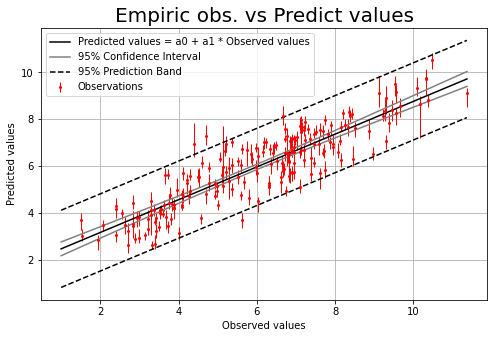

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 1.146, median - 1.147, CI - [1.113-1.195]

SHAP-values for: A_year: mean - 0.461, median - 0.463, CI - [0.415-0.503]

SHAP-values for: D_cm: mean - 0.23, median - 0.232, CI - [0.201-0.263]

SHAP-values for: F_Soil_ID: mean - 0.184, median - 0.183, CI - [0.155-0.219]

SHAP-values for: G_m2_ha: mean - 0.202, median - 0.202, CI - [0.171-0.233]

SHAP-values for: H_m: mean - 0.192, median - 0.192, CI - [0.162-0.222]

SHAP-values for: Species_ID: mean - 0.049, median - 0.046, CI - [0.035-0.062]



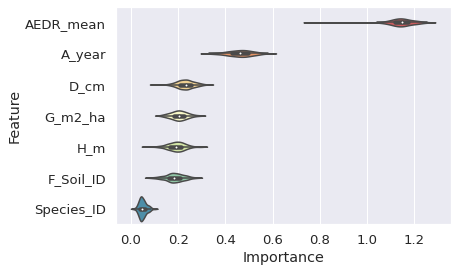

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['AEDR_mean', 'A_year', 'D_cm', 'G_m2_ha', 'H_m', 'F_Soil_ID', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 71.255, median: 66.0,
 pred. interval (P(0.025)-P(0.975)): 32.0-148.0, 
 conf. interval (p-value=0.95): 47.172-93.937 
***
Aggregate bias statistic: 
 mean: -0.027, median: -0.026,
 pred. interval (P(0.025)-P(0.975)): -0.391-0.293, 
 conf. interval (p-value=0.95): -0.177-0.139 
***
Aggregate RMSE statistic: 
 mean: 1.041, median: 1.036, pred. interval (P(0.025)-P(0.975)): 0.845-1.306, 
 conf. interval (p-value=0.95): 0.944-1.138 
***
Aggregate MSE statistic: 
 mean: 1.096, median: 1.073, pred. interval (P(0.025)-P(0.975)): 0.713-1.705, 
 conf. interval (p-value=0.95): 0.892-1.296 
***
Aggregate R^2 statistic: 
 mean: 0.736, median: 0.749, pred. interval (P(0.025)-P(0.975)): 0.574-0.835, 
 conf. interval (p-value=0.95): 0.674-0.794 
***
Aggregate bias(%) statistic: 
 mean: -0.347, median: -0.444, pred. interval (P(0.025)-P(0.975)): -6.068-5.402, 
 conf. interval (p-value=0.95): -2.89

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

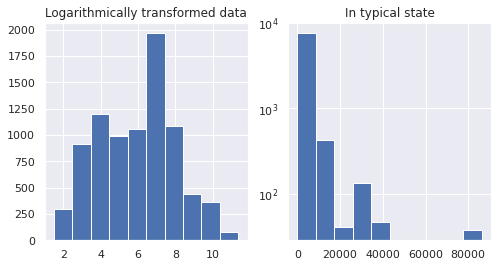

In [28]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 2, 4, 6, 8, 10])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1000, 2000, 5000, 10000, 100000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

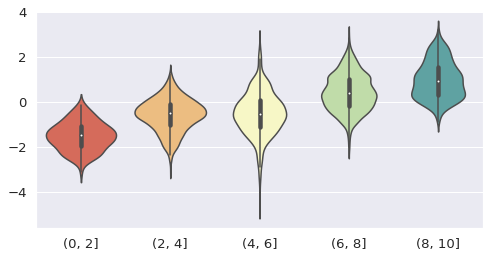

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

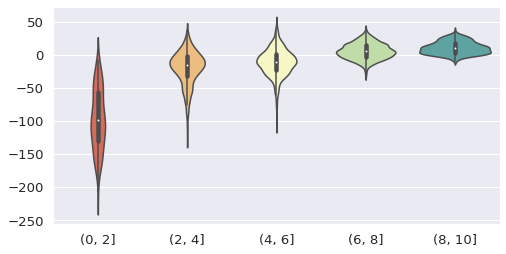

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

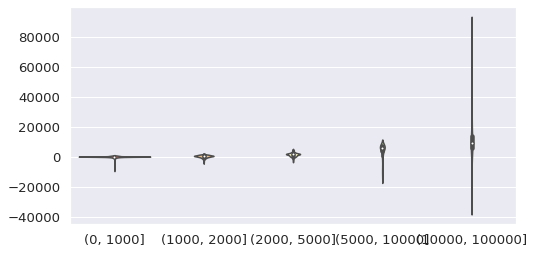

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

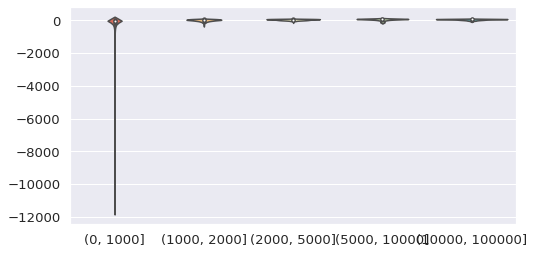

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [34]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [35]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [36]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:5.15401
[1]	validation_0-rmse:4.55860
[2]	validation_0-rmse:4.00190
[3]	validation_0-rmse:3.50652
[4]	validation_0-rmse:3.08754
[5]	validation_0-rmse:2.72554
[6]	validation_0-rmse:2.44555
[7]	validation_0-rmse:2.20903


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:2.01202
[9]	validation_0-rmse:1.79735
[10]	validation_0-rmse:1.61918
[11]	validation_0-rmse:1.46413
[12]	validation_0-rmse:1.33830
[13]	validation_0-rmse:1.24536
[14]	validation_0-rmse:1.17398
[15]	validation_0-rmse:1.09008
[16]	validation_0-rmse:1.03590
[17]	validation_0-rmse:0.97019
[18]	validation_0-rmse:0.91572
[19]	validation_0-rmse:0.88727
[20]	validation_0-rmse:0.85263
[21]	validation_0-rmse:0.81544
[22]	validation_0-rmse:0.78588
[23]	validation_0-rmse:0.76944
[24]	validation_0-rmse:0.74271
[25]	validation_0-rmse:0.72068
[26]	validation_0-rmse:0.69763
[27]	validation_0-rmse:0.68384
[28]	validation_0-rmse:0.67106
[29]	validation_0-rmse:0.66253
[30]	validation_0-rmse:0.65247
[31]	validation_0-rmse:0.64656
[32]	validation_0-rmse:0.63937
[33]	validation_0-rmse:0.62821
[34]	validation_0-rmse:0.61851
[35]	validation_0-rmse:0.61318
[36]	validation_0-rmse:0.60540
[37]	validation_0-rmse:0.59685
[38]	validation_0-rmse:0.58751
[39]	validation_0-rmse:0.58224
[40]	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 158


In [38]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

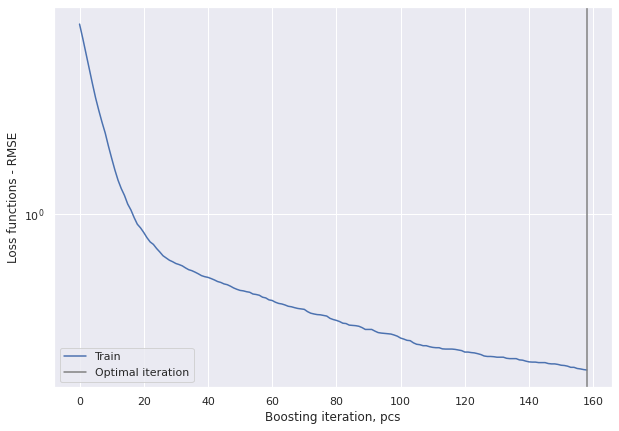

In [39]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.01
RMSE: 0.3
Relative RMSE(%):  4.362
MSE: 0.1
R square: 98.5%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.985
Uncertainty
a0: 0.24+/-0.05
a1: 0.959+/-0.008


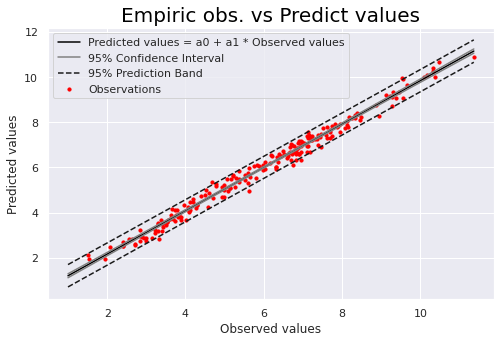

In [42]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

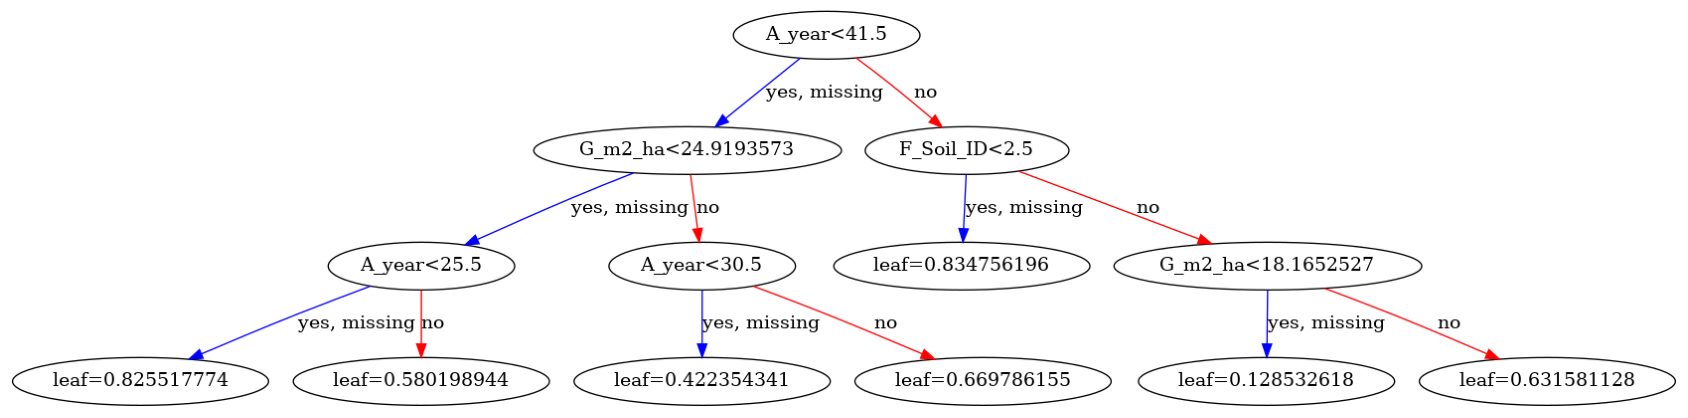

In [45]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

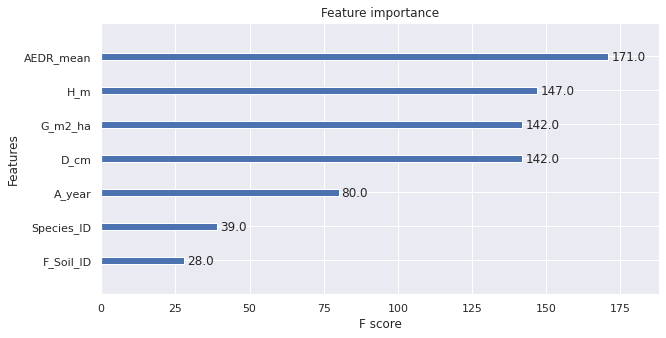

In [47]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

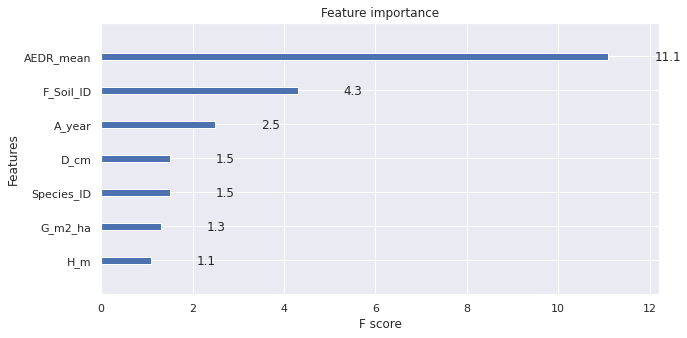

In [48]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

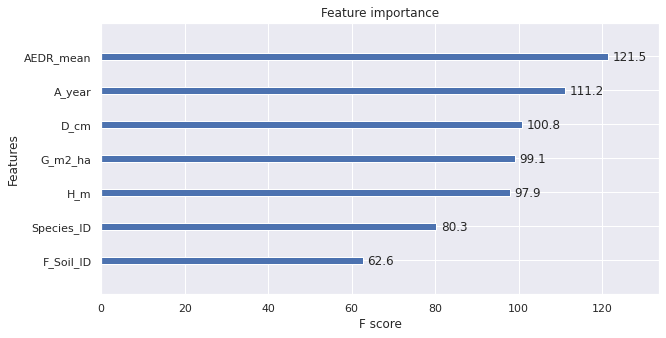

In [49]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [50]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


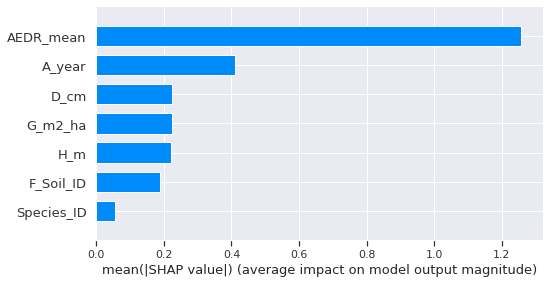

In [51]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

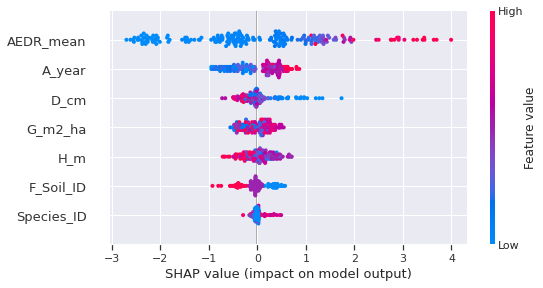

In [52]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

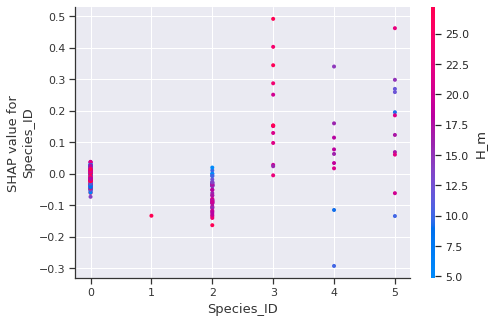

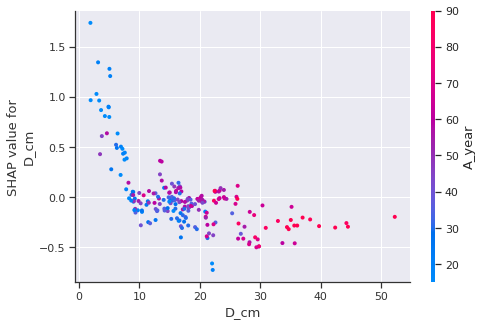

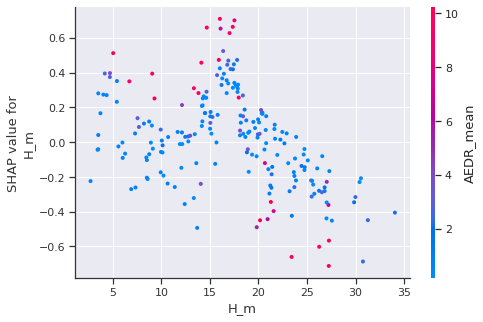

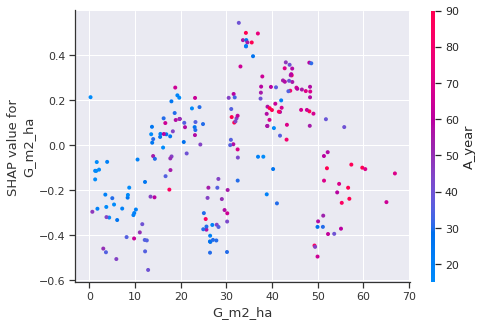

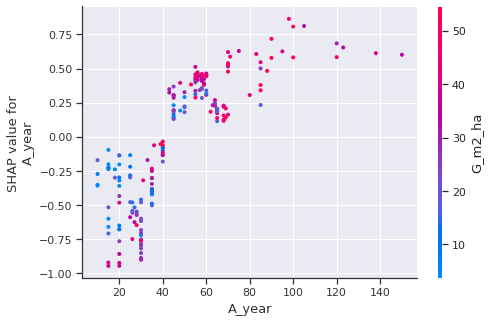

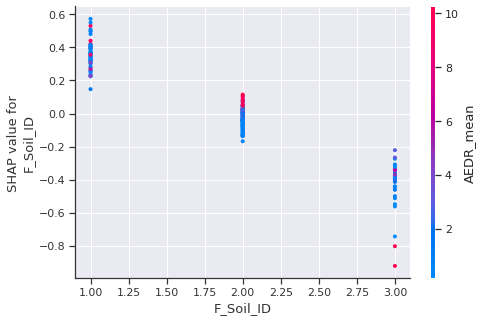

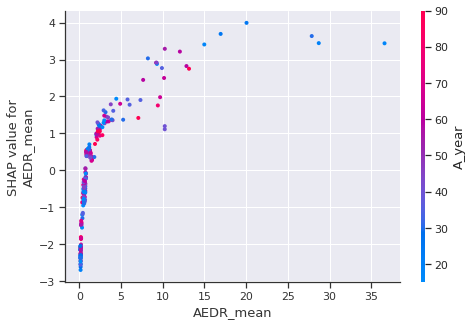

In [53]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [54]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/01_LN_Cs_content_without_geo_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/01_LN_Cs_content_without_geo_XGB_model.txt")